**Group-08**<br/>
<font style="color:red"> **Belhassen Ghoul <br/> Robin Ehrensperger <br/> Dominic Diedenhofen**</font>

In [3]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt

"""print(torch.cuda.device_count()) 
print(torch.cuda.get_device_name(0)) 
cuda0 = torch.device('cuda:0')"""

"print(torch.cuda.device_count()) \nprint(torch.cuda.get_device_name(0)) \ncuda0 = torch.device('cuda:0')"

### Loading Data

In [4]:
training_data = datasets.mnist.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.mnist.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())

In [5]:
training_data, validation_data = torch.utils.data.random_split(training_data, [50000, 10000])

In [6]:
print(len(training_data),len(validation_data),len(test_data))

50000 10000 10000


### MLP


In [7]:
def mlp(units = [28*28,250,80,10]):
    seq = [torch.nn.Flatten()]
    for i in range(len(units)-2):
        seq.append(torch.nn.Linear(units[i],units[i+1]))
        seq.append(torch.nn.Sigmoid())
    seq.append(torch.nn.Linear(units[-2],units[-1]))
    return torch.nn.Sequential(*seq)

In [8]:
model = mlp()
from torchsummary import summary
summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 250]         196,250
           Sigmoid-3                  [-1, 250]               0
            Linear-4                   [-1, 80]          20,080
           Sigmoid-5                   [-1, 80]               0
            Linear-6                   [-1, 10]             810
Total params: 217,140
Trainable params: 217,140
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.83
Estimated Total Size (MB): 0.84
----------------------------------------------------------------


### Training

Implement the training / evaluation loop

Remember training / validation cost and accuracy per epoch. 

In [9]:
def train_eval(model, optimizer, nepochs, training_loader, test_loader, scheduler=None):
    cost_hist = []
    cost_hist_test = []
    acc_hist = []
    acc_hist_test = []

    cost_ce = torch.nn.CrossEntropyLoss()
        
    for epoch in range(nepochs):
        model.train()
        size = len(training_loader.dataset)
        nbatches = len(training_loader)
        size_test = len(test_loader.dataset)
        nbatches_test = len(test_loader)
        cost, acc = 0.0, 0.0
        for batch, (X, Y) in enumerate(training_loader):
            #X,Y = X.to(cuda0),Y.to(cuda0)
            pred = model(X)
            loss = cost_ce(pred, Y)
            cost += loss.item()
            acc += (pred.argmax(dim=1) == Y).type(torch.float).sum().item()

            # gradient, parameter update
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if scheduler:
            scheduler.step()
        cost /= nbatches
        acc /= size
    
        model.eval()
        cost_test, acc_test = 0.0, 0.0        
        with torch.no_grad():
            for X, Y in test_loader:
                #X,Y = X.to(cuda0),Y.to(cuda0)
                pred = model(X)
                cost_test += cost_ce(pred, Y).item()
                acc_test += (pred.argmax(dim=1) == Y).type(torch.float).sum().item()
        cost_test /= nbatches_test
        acc_test /= size_test
        print("Epoch %i: %f, %f, %f, %f"%(epoch, cost, acc, cost_test, acc_test))
        cost_hist.append(cost)
        cost_hist_test.append(cost_test)
        acc_hist.append(acc)
        acc_hist_test.append(acc_test)
    return cost_hist, cost_hist_test, acc_hist, acc_hist_test

### Analyse Different Optimisers with different Settings 

Use the code above to explore different settings for the different optimizers. Use batchsize 64.

1. SGD: Revisit plain SGD (without momentum) and try different learning rates (lr). Create suitable comparison plots (learning curves with the train and validate cost and accuracy) for (~3) different learning rates. Describe in words what you see. What is a reasonable number of epochs (nepochs)? What is your recommended best choice (lr, nepochs) for the given problem?

2. Momentum: Play with different settings when using momentum: learning rate, momentum parameter, Nesterov flag. Start with momentum=0.9 without Nesterov and suitable learning rate, then vary the momentum parameter and independently the learning rate. Can you see an impact of using Nesterov? What is your recommended best choice (lr, momentum, nesterov, nepochs) for the given problem?

3. RMSprop: Same thing now for RMSprop (without momentum). Play with different settings when using RMSprop: lr, alpha. Start with the default settings of pytorch with (lr=0.01, alpha=0.99,centered=False). Then vary alpha and independently the learning rate. Can you see an impact when using centered=True? What is your recommended best choice (learning rate, alpha, centered, nepochs) for the given problem?

4. Adam: Same thing now for Adam. Play with different settings. Start with the default settings of pytorch. What is your recommended best choice for the given problem?

5. Learning rate schedule: Implement a learning rate schedule for SGD (without momentum) - by using e.g. StepLR. What are your preferred settings for the given task? Note the way how the scheduler is incorporated into the `train_eval`-method above.


<font style="color:red"><h3>**1.**</h3> </br> Learning Rate</font>

Epoch 0: 2.325782, 0.099360, 2.324961, 0.103200
Epoch 1: 2.325799, 0.099360, 2.324870, 0.103200
Epoch 2: 2.325740, 0.099360, 2.324881, 0.103200
Epoch 3: 2.325750, 0.099360, 2.324938, 0.103200
Epoch 4: 2.325714, 0.099360, 2.325028, 0.103200
Epoch 5: 2.325796, 0.099360, 2.324942, 0.103200
Epoch 6: 2.325738, 0.099360, 2.325496, 0.103200
Epoch 7: 2.325805, 0.099360, 2.324974, 0.103200
Epoch 8: 2.325729, 0.099360, 2.324991, 0.103200
Epoch 9: 2.325821, 0.099360, 2.325084, 0.103200
Epoch 10: 2.325749, 0.099360, 2.324964, 0.103200
Epoch 11: 2.325757, 0.099360, 2.325269, 0.103200
Epoch 12: 2.325782, 0.099360, 2.324909, 0.103200
Epoch 13: 2.325768, 0.099360, 2.325236, 0.103200
Epoch 14: 2.325757, 0.099360, 2.324450, 0.103200
Epoch 15: 2.325660, 0.099360, 2.325221, 0.103200
Epoch 16: 2.325748, 0.099360, 2.325333, 0.103200
Epoch 17: 2.325831, 0.099360, 2.325240, 0.103200
Epoch 18: 2.325810, 0.099360, 2.324648, 0.103200
Epoch 19: 2.325806, 0.099360, 2.325030, 0.103200


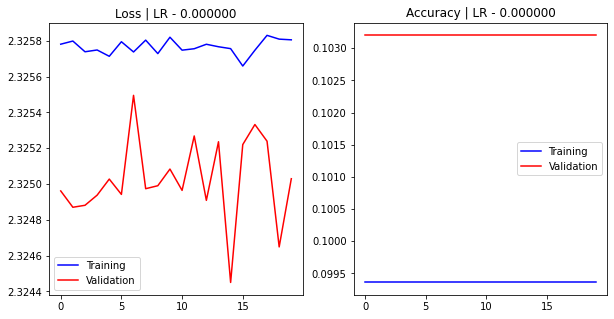

Epoch 0: 1.772806, 0.359340, 1.102474, 0.591600
Epoch 1: 0.932934, 0.651000, 0.801114, 0.713400
Epoch 2: 0.718353, 0.736600, 0.664047, 0.747500
Epoch 3: 0.614358, 0.772220, 0.605891, 0.778400
Epoch 4: 0.557694, 0.796180, 0.576373, 0.793300
Epoch 5: 0.520352, 0.812920, 0.535052, 0.804200
Epoch 6: 0.493289, 0.823900, 0.507283, 0.822700
Epoch 7: 0.473784, 0.830560, 0.571154, 0.794500
Epoch 8: 0.456831, 0.836280, 0.467429, 0.835300
Epoch 9: 0.442984, 0.841140, 0.467255, 0.837300
Epoch 10: 0.431736, 0.846060, 0.503673, 0.819700
Epoch 11: 0.422340, 0.849140, 0.488235, 0.824200
Epoch 12: 0.412947, 0.852640, 0.476077, 0.825400
Epoch 13: 0.406560, 0.854100, 0.433497, 0.844600
Epoch 14: 0.398966, 0.857600, 0.421837, 0.850100
Epoch 15: 0.392727, 0.859460, 0.491728, 0.823200
Epoch 16: 0.386497, 0.862160, 0.418998, 0.850300
Epoch 17: 0.380928, 0.863520, 0.449979, 0.832900
Epoch 18: 0.376015, 0.864400, 0.420701, 0.847700
Epoch 19: 0.371392, 0.867960, 0.413948, 0.851600


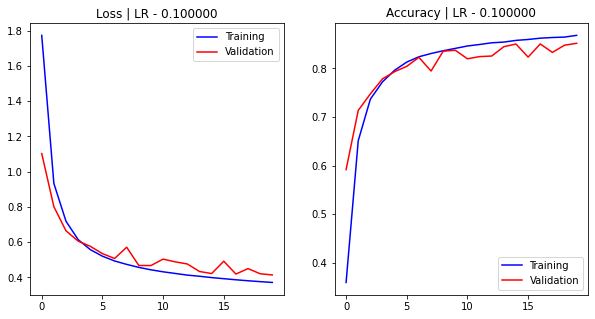

Epoch 0: 1.348520, 0.496120, 0.852285, 0.658800
Epoch 1: 0.666581, 0.747700, 0.642663, 0.762100
Epoch 2: 0.555789, 0.796840, 0.558462, 0.796400
Epoch 3: 0.505617, 0.817840, 0.557328, 0.793900
Epoch 4: 0.470391, 0.830040, 0.488226, 0.824900
Epoch 5: 0.447377, 0.839160, 0.496247, 0.816900
Epoch 6: 0.428310, 0.846280, 0.615839, 0.780100
Epoch 7: 0.414175, 0.851300, 0.736725, 0.729400
Epoch 8: 0.402115, 0.855860, 0.471681, 0.827100
Epoch 9: 0.391495, 0.859240, 0.440960, 0.839300
Epoch 10: 0.382725, 0.861360, 0.430133, 0.846600
Epoch 11: 0.374111, 0.864820, 0.480692, 0.825000
Epoch 12: 0.365761, 0.867460, 0.396803, 0.859400
Epoch 13: 0.358558, 0.870660, 0.422413, 0.848700
Epoch 14: 0.351724, 0.871940, 0.418812, 0.846300
Epoch 15: 0.344174, 0.876660, 0.380641, 0.863300
Epoch 16: 0.340167, 0.877660, 0.414815, 0.849100
Epoch 17: 0.333708, 0.878740, 0.372655, 0.865300
Epoch 18: 0.329004, 0.880280, 0.470120, 0.826500
Epoch 19: 0.322918, 0.884160, 0.380275, 0.857600


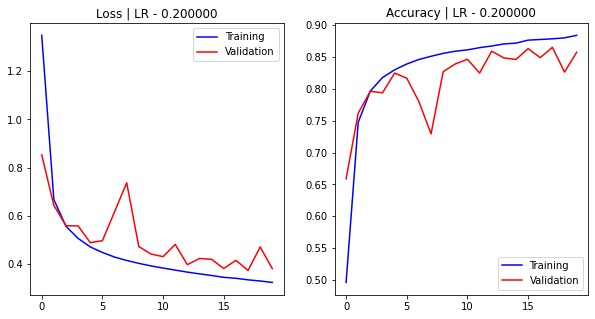

Epoch 0: 1.141262, 0.564780, 0.789252, 0.696900
Epoch 1: 0.592015, 0.778720, 0.939225, 0.687500
Epoch 2: 0.510865, 0.813640, 0.681893, 0.756800
Epoch 3: 0.466488, 0.831960, 0.477043, 0.829200
Epoch 4: 0.437496, 0.843300, 0.478426, 0.823700
Epoch 5: 0.416765, 0.848840, 0.438005, 0.840500
Epoch 6: 0.401476, 0.854320, 0.429482, 0.846000
Epoch 7: 0.386727, 0.860120, 0.409102, 0.850900
Epoch 8: 0.375631, 0.862580, 0.465765, 0.826600
Epoch 9: 0.365142, 0.866020, 0.543645, 0.807400
Epoch 10: 0.356063, 0.869500, 0.427206, 0.847400
Epoch 11: 0.347069, 0.873620, 0.417728, 0.850900
Epoch 12: 0.339523, 0.877300, 0.379121, 0.862900
Epoch 13: 0.331244, 0.878480, 0.422426, 0.848500
Epoch 14: 0.325444, 0.880560, 0.384287, 0.859200
Epoch 15: 0.318703, 0.882600, 0.398699, 0.855600
Epoch 16: 0.313089, 0.884880, 0.393667, 0.857700
Epoch 17: 0.307865, 0.886920, 0.410190, 0.844700
Epoch 18: 0.303031, 0.889460, 0.361301, 0.871400
Epoch 19: 0.297940, 0.889840, 0.401383, 0.855100


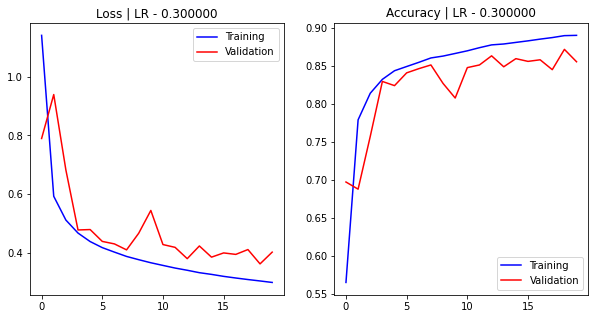

Epoch 0: 1.047040, 0.597460, 0.977499, 0.692900
Epoch 1: 0.563188, 0.791140, 0.627291, 0.770400
Epoch 2: 0.488546, 0.821700, 0.763132, 0.722100
Epoch 3: 0.446534, 0.837100, 0.462863, 0.831000
Epoch 4: 0.418025, 0.848060, 0.566215, 0.774800
Epoch 5: 0.398167, 0.856200, 0.453786, 0.835300
Epoch 6: 0.381717, 0.861300, 0.404544, 0.852500
Epoch 7: 0.368271, 0.865700, 0.411808, 0.851100
Epoch 8: 0.354806, 0.870720, 0.473608, 0.832500
Epoch 9: 0.344887, 0.874160, 0.405149, 0.849300
Epoch 10: 0.336564, 0.876900, 0.375931, 0.866000
Epoch 11: 0.327534, 0.879480, 0.393322, 0.853700
Epoch 12: 0.318454, 0.883140, 0.386804, 0.860800
Epoch 13: 0.311948, 0.885600, 0.376373, 0.860100
Epoch 14: 0.305696, 0.887980, 0.398858, 0.855500
Epoch 15: 0.299196, 0.889760, 0.452813, 0.837600
Epoch 16: 0.293915, 0.890640, 0.377038, 0.858300
Epoch 17: 0.287733, 0.893380, 0.371326, 0.862800
Epoch 18: 0.281677, 0.895360, 0.342171, 0.874400
Epoch 19: 0.276949, 0.898060, 0.490138, 0.823200


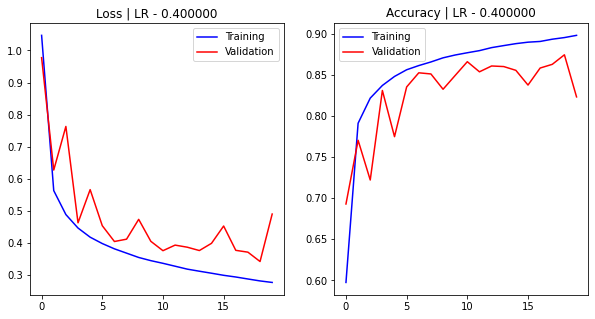

Epoch 0: 0.998225, 0.612860, 0.718051, 0.737500
Epoch 1: 0.551103, 0.796040, 0.610723, 0.780400
Epoch 2: 0.475719, 0.825620, 0.504148, 0.819900
Epoch 3: 0.436807, 0.842020, 0.716290, 0.748800
Epoch 4: 0.409915, 0.850700, 0.449752, 0.834500
Epoch 5: 0.390193, 0.857280, 0.411992, 0.852200
Epoch 6: 0.371769, 0.865420, 0.468170, 0.826000
Epoch 7: 0.356793, 0.869740, 0.676547, 0.741100
Epoch 8: 0.346046, 0.873460, 0.475123, 0.828800
Epoch 9: 0.336000, 0.877080, 0.432046, 0.836600
Epoch 10: 0.326010, 0.879740, 0.445215, 0.838200
Epoch 11: 0.317998, 0.883420, 0.400355, 0.844300
Epoch 12: 0.310949, 0.884840, 0.370067, 0.863400
Epoch 13: 0.302459, 0.888940, 0.442360, 0.845200
Epoch 14: 0.296414, 0.891580, 0.488134, 0.821300
Epoch 15: 0.290020, 0.893040, 0.382463, 0.861200
Epoch 16: 0.282564, 0.894700, 0.429346, 0.844300
Epoch 17: 0.278711, 0.895920, 0.398847, 0.861100
Epoch 18: 0.272320, 0.899480, 0.337471, 0.877900
Epoch 19: 0.267094, 0.900680, 0.444187, 0.836600


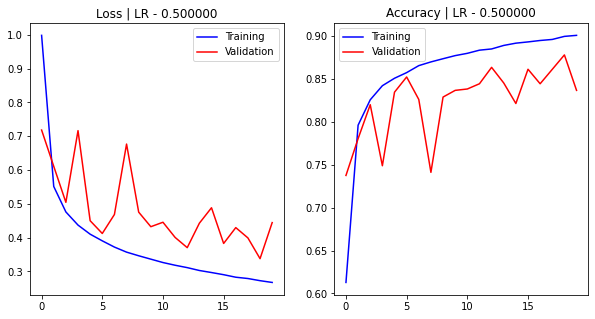

Epoch 0: 0.959651, 0.627280, 0.713613, 0.730700
Epoch 1: 0.534427, 0.803520, 0.679108, 0.719000
Epoch 2: 0.460072, 0.831920, 0.503264, 0.823600
Epoch 3: 0.420246, 0.846980, 0.708534, 0.727700
Epoch 4: 0.395337, 0.853740, 0.466700, 0.834900
Epoch 5: 0.374620, 0.862760, 0.415145, 0.852400
Epoch 6: 0.357557, 0.869100, 0.392079, 0.858600
Epoch 7: 0.343569, 0.872420, 0.385792, 0.858500
Epoch 8: 0.332361, 0.876540, 0.467809, 0.841500
Epoch 9: 0.323949, 0.880220, 0.455938, 0.837300
Epoch 10: 0.314631, 0.883300, 0.452116, 0.843700
Epoch 11: 0.302050, 0.889320, 0.348157, 0.871100
Epoch 12: 0.297114, 0.890080, 0.355035, 0.870200
Epoch 13: 0.288418, 0.893600, 0.486609, 0.819800
Epoch 14: 0.283616, 0.894160, 0.363996, 0.866700
Epoch 15: 0.278574, 0.896640, 0.357436, 0.869900
Epoch 16: 0.272594, 0.898300, 0.366286, 0.867700
Epoch 17: 0.265946, 0.901100, 0.406438, 0.838000
Epoch 18: 0.259614, 0.902500, 0.328761, 0.879700
Epoch 19: 0.255482, 0.903500, 0.485297, 0.825900


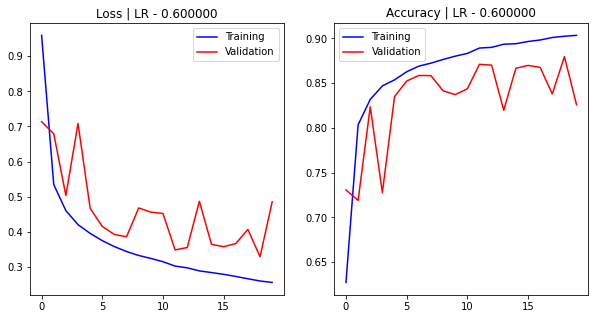

Epoch 0: 0.928656, 0.638220, 0.757440, 0.697400
Epoch 1: 0.521387, 0.808480, 0.543610, 0.793900
Epoch 2: 0.449744, 0.834720, 0.469462, 0.827500
Epoch 3: 0.413168, 0.847000, 0.433437, 0.840600
Epoch 4: 0.384041, 0.858500, 0.466510, 0.828100
Epoch 5: 0.367617, 0.864180, 0.463402, 0.836500
Epoch 6: 0.347653, 0.872320, 0.418804, 0.849300
Epoch 7: 0.336229, 0.875720, 0.604227, 0.782300
Epoch 8: 0.323560, 0.879260, 0.359946, 0.866500
Epoch 9: 0.313178, 0.883140, 0.399824, 0.854700
Epoch 10: 0.302879, 0.886640, 0.490568, 0.826100
Epoch 11: 0.297366, 0.887760, 0.502282, 0.834000
Epoch 12: 0.287622, 0.891700, 0.378521, 0.862300
Epoch 13: 0.281979, 0.894900, 0.358953, 0.870200
Epoch 14: 0.275642, 0.896860, 0.415479, 0.849900
Epoch 15: 0.269734, 0.897940, 0.474388, 0.837000
Epoch 16: 0.263462, 0.901260, 0.421849, 0.858600
Epoch 17: 0.256824, 0.904140, 0.368003, 0.867800
Epoch 18: 0.251385, 0.905320, 0.351700, 0.872400
Epoch 19: 0.247214, 0.907320, 0.346904, 0.876700


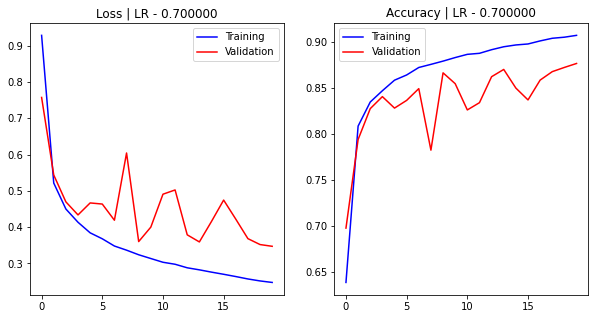

Epoch 0: 0.905934, 0.648680, 0.597249, 0.787900
Epoch 1: 0.512635, 0.810780, 0.519308, 0.809000
Epoch 2: 0.443646, 0.836580, 0.770318, 0.723000
Epoch 3: 0.404665, 0.851260, 0.453330, 0.832600
Epoch 4: 0.380622, 0.859340, 0.429194, 0.835800
Epoch 5: 0.360169, 0.866980, 0.420782, 0.850000
Epoch 6: 0.344416, 0.872480, 0.452267, 0.820700
Epoch 7: 0.331528, 0.876640, 0.415494, 0.847600
Epoch 8: 0.321870, 0.881220, 0.438467, 0.841300
Epoch 9: 0.310801, 0.883860, 0.451115, 0.823900
Epoch 10: 0.301395, 0.887200, 0.391005, 0.857900
Epoch 11: 0.292869, 0.891800, 0.398200, 0.853000
Epoch 12: 0.287354, 0.892740, 0.354703, 0.870600
Epoch 13: 0.278571, 0.894400, 0.339797, 0.878100
Epoch 14: 0.275361, 0.897340, 0.362682, 0.868300
Epoch 15: 0.265936, 0.900380, 0.358846, 0.869200
Epoch 16: 0.261108, 0.901300, 0.486038, 0.830800
Epoch 17: 0.255429, 0.903980, 0.423574, 0.858300
Epoch 18: 0.249209, 0.907100, 0.436250, 0.847200
Epoch 19: 0.243151, 0.908340, 0.429024, 0.852800


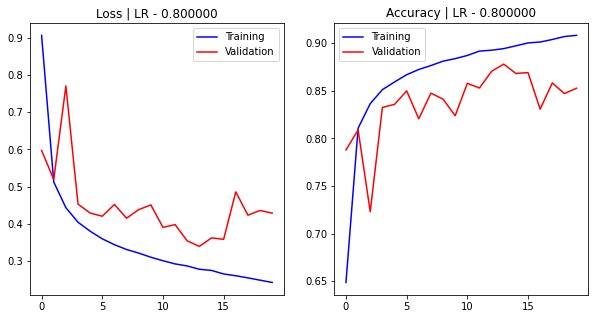

Epoch 0: 0.886486, 0.656000, 0.594934, 0.775400
Epoch 1: 0.503954, 0.813880, 0.558933, 0.807400
Epoch 2: 0.438564, 0.837280, 0.486361, 0.828500
Epoch 3: 0.395763, 0.855400, 0.417766, 0.849500
Epoch 4: 0.370959, 0.862880, 0.421381, 0.848100
Epoch 5: 0.353709, 0.869700, 0.457781, 0.834500
Epoch 6: 0.337748, 0.876660, 0.450270, 0.832100
Epoch 7: 0.325083, 0.878880, 0.448321, 0.832700
Epoch 8: 0.313975, 0.883620, 0.455926, 0.836300
Epoch 9: 0.304908, 0.886340, 0.356497, 0.867800
Epoch 10: 0.294980, 0.891400, 0.364944, 0.863700
Epoch 11: 0.287603, 0.891740, 0.416363, 0.850000
Epoch 12: 0.280495, 0.894960, 0.434195, 0.839300
Epoch 13: 0.273060, 0.898460, 0.479291, 0.829600
Epoch 14: 0.267897, 0.899400, 0.639704, 0.794000
Epoch 15: 0.259272, 0.902840, 0.334414, 0.880800
Epoch 16: 0.254155, 0.905240, 0.344269, 0.874500
Epoch 17: 0.249019, 0.907220, 0.493548, 0.821300
Epoch 18: 0.241990, 0.908580, 0.450831, 0.852100
Epoch 19: 0.237035, 0.910540, 0.457729, 0.836200


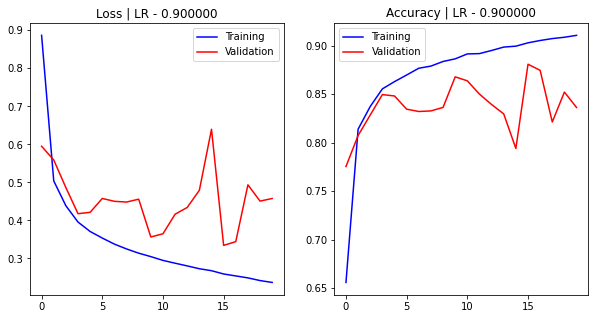

Epoch 0: 0.954053, 0.630220, 0.995790, 0.585900
Epoch 1: 0.511851, 0.811380, 0.839398, 0.701800
Epoch 2: 0.441944, 0.839460, 0.704519, 0.742600
Epoch 3: 0.408041, 0.851020, 0.492790, 0.820100
Epoch 4: 0.383069, 0.857960, 0.517393, 0.813100
Epoch 5: 0.361115, 0.867960, 0.434760, 0.835600
Epoch 6: 0.346710, 0.873140, 0.394352, 0.852900
Epoch 7: 0.330803, 0.877740, 0.374480, 0.864400
Epoch 8: 0.318745, 0.879860, 0.569278, 0.790000
Epoch 9: 0.309532, 0.884960, 0.461917, 0.844400
Epoch 10: 0.298943, 0.889020, 0.364824, 0.869300
Epoch 11: 0.290332, 0.891060, 0.351825, 0.871800
Epoch 12: 0.281617, 0.895080, 0.668214, 0.793500
Epoch 13: 0.276138, 0.896700, 0.389611, 0.855100
Epoch 14: 0.269185, 0.898000, 0.339590, 0.879700
Epoch 15: 0.260289, 0.902800, 0.372868, 0.864700
Epoch 16: 0.254954, 0.904400, 0.645604, 0.788700
Epoch 17: 0.249773, 0.905920, 0.335959, 0.877700
Epoch 18: 0.242997, 0.908880, 0.349633, 0.878200
Epoch 19: 0.237952, 0.909960, 0.429191, 0.842600


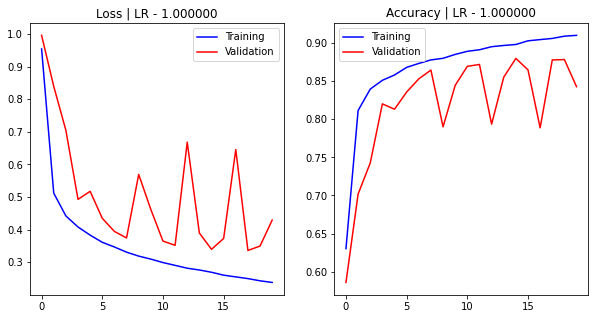

In [10]:
nbatch = 64
nepochs =20
training_loader = DataLoader(training_data, batch_size=nbatch, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=nbatch, shuffle=True) 

for lr in np.arange(0,1.1,0.1):
  model = mlp()
  #model.to(cuda0)
  optimizer = torch.optim.SGD(model.parameters(),lr=lr)
  cost_hist, cost_hist_test, acc_hist, acc_hist_test = train_eval(model, optimizer, nepochs, training_loader, validation_loader)

  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(torch.arange(nepochs), cost_hist,"b-", label="Training")
  plt.plot(torch.arange(nepochs), cost_hist_test,"r-",label="Validation")
  plt.legend()
  plt.title("Loss | LR - %f"%(lr))

  plt.subplot(1,2,2)
  plt.plot(torch.arange(nepochs), acc_hist,"b-", label="Training")
  plt.plot(torch.arange(nepochs), acc_hist_test,"r-", label="Validation")
  plt.legend()
  plt.title("Accuracy | LR - %f"%(lr))
  plt.show()

<font style="color:red"> as we see in the plots till LR = 0.8 the Validation accuracy increases/stays the same and than it drops, the LR = 0.8 needs least nepochs to reach the plateau!

Epoch 0: 0.904619, 0.645940, 0.919755, 0.677200
Epoch 1: 0.513296, 0.811260, 0.732609, 0.755100
Epoch 2: 0.442921, 0.839800, 0.672759, 0.774700
Epoch 3: 0.404750, 0.852360, 0.434430, 0.839600
Epoch 4: 0.377699, 0.861320, 0.432741, 0.838900
Epoch 5: 0.359403, 0.867920, 0.509726, 0.817500
Epoch 6: 0.345400, 0.871680, 0.390434, 0.857100
Epoch 7: 0.331497, 0.876920, 0.545891, 0.789500
Epoch 8: 0.318930, 0.881900, 0.411071, 0.837400
Epoch 9: 0.310766, 0.885240, 0.361273, 0.868500
Epoch 10: 0.302437, 0.887060, 0.403072, 0.845700
Epoch 11: 0.294275, 0.889940, 0.399044, 0.854700
Epoch 12: 0.284058, 0.893380, 0.357076, 0.870200
Epoch 13: 0.279133, 0.895040, 0.507012, 0.830900
Epoch 14: 0.273184, 0.897340, 0.542808, 0.814500
Epoch 15: 0.265694, 0.900760, 0.382705, 0.853600
Epoch 16: 0.258927, 0.903300, 0.353297, 0.871000
Epoch 17: 0.254131, 0.904940, 0.860587, 0.781100
Epoch 18: 0.250394, 0.906080, 0.344439, 0.875600
Epoch 19: 0.243469, 0.908420, 0.337670, 0.878600
Epoch 20: 0.239804, 0.909740, 

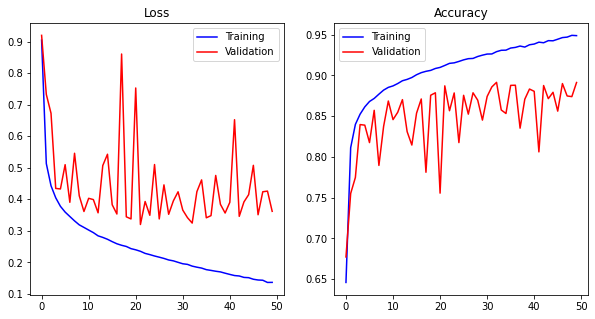

In [11]:
nbatch = 64
nepochs =50

training_loader = DataLoader(training_data, batch_size=nbatch, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=nbatch, shuffle=True)
    
model = mlp()
#model.to(cuda0)
optimizer = torch.optim.SGD(model.parameters(),lr=0.8)
cost_hist, cost_hist_test, acc_hist, acc_hist_test = train_eval(model, optimizer, nepochs, training_loader, validation_loader)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(torch.arange(nepochs), cost_hist,"b-", label="Training")
plt.plot(torch.arange(nepochs), cost_hist_test,"r-",label="Validation")
plt.legend()
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(torch.arange(nepochs), acc_hist,"b-", label="Training")
plt.plot(torch.arange(nepochs), acc_hist_test,"r-", label="Validation")
plt.legend()
plt.title("Accuracy")
plt.show()

<font style="color:red"> My choice would be **20-30 epochs and LR 0.8** because if we look at the plot we can see wher it's converge </font>

<font style="color:red"> <h3> **2.** </h2> </br> Learning Rate</font>

Epoch 0: 2.350363, 0.100140, 2.348296, 0.099300
Epoch 1: 2.350388, 0.100140, 2.347544, 0.099300
Epoch 2: 2.350424, 0.100140, 2.348356, 0.099300
Epoch 3: 2.350392, 0.100140, 2.347470, 0.099300
Epoch 4: 2.350394, 0.100140, 2.348003, 0.099300
Epoch 5: 2.350352, 0.100140, 2.347455, 0.099300
Epoch 6: 2.350344, 0.100140, 2.347852, 0.099300
Epoch 7: 2.350403, 0.100140, 2.347456, 0.099300
Epoch 8: 2.350451, 0.100140, 2.347853, 0.099300
Epoch 9: 2.350507, 0.100140, 2.347537, 0.099300
Epoch 10: 2.350394, 0.100140, 2.347738, 0.099300
Epoch 11: 2.350497, 0.100140, 2.347572, 0.099300
Epoch 12: 2.350438, 0.100140, 2.347433, 0.099300
Epoch 13: 2.350332, 0.100140, 2.347386, 0.099300
Epoch 14: 2.350493, 0.100140, 2.347899, 0.099300
Epoch 15: 2.350313, 0.100140, 2.347652, 0.099300
Epoch 16: 2.350376, 0.100140, 2.347491, 0.099300
Epoch 17: 2.350474, 0.100140, 2.347357, 0.099300
Epoch 18: 2.350310, 0.100140, 2.347422, 0.099300
Epoch 19: 2.350310, 0.100140, 2.347335, 0.099300


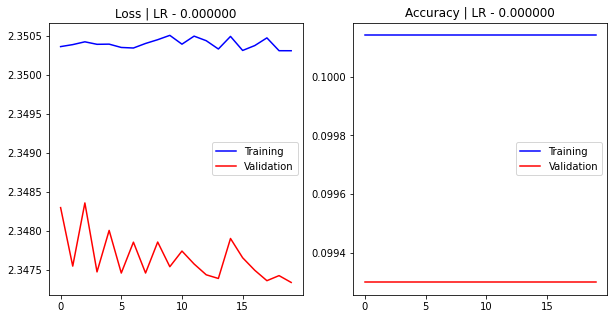

Epoch 0: 0.834085, 0.681640, 0.519414, 0.814200
Epoch 1: 0.464625, 0.831420, 0.471395, 0.824800
Epoch 2: 0.411385, 0.850760, 0.402801, 0.854300
Epoch 3: 0.374638, 0.863260, 0.395434, 0.853000
Epoch 4: 0.353871, 0.870940, 0.394529, 0.858300
Epoch 5: 0.337274, 0.876680, 0.393202, 0.850100
Epoch 6: 0.321951, 0.880520, 0.361194, 0.866800
Epoch 7: 0.310205, 0.886420, 0.390686, 0.857100
Epoch 8: 0.298076, 0.889520, 0.342037, 0.874300
Epoch 9: 0.291458, 0.892640, 0.354865, 0.867600
Epoch 10: 0.284201, 0.893560, 0.332341, 0.877200
Epoch 11: 0.272736, 0.899220, 0.334940, 0.877800
Epoch 12: 0.267031, 0.900840, 0.336723, 0.873900
Epoch 13: 0.256014, 0.904900, 0.332311, 0.878200
Epoch 14: 0.252784, 0.904780, 0.312491, 0.883000
Epoch 15: 0.244906, 0.908280, 0.324458, 0.881800
Epoch 16: 0.239642, 0.910140, 0.315896, 0.886600
Epoch 17: 0.233144, 0.912900, 0.321845, 0.883300
Epoch 18: 0.227917, 0.914560, 0.331603, 0.883800
Epoch 19: 0.222052, 0.915920, 0.333546, 0.881100


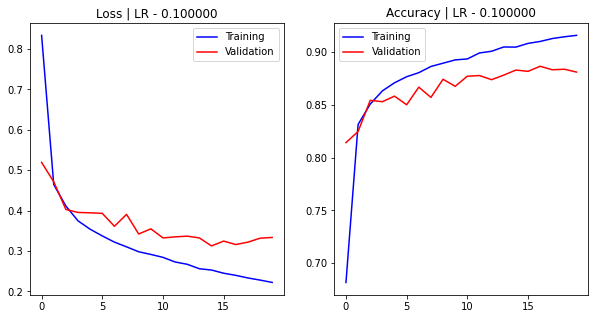

Epoch 0: 0.753936, 0.712900, 0.484717, 0.823800
Epoch 1: 0.433234, 0.840800, 0.443873, 0.828800
Epoch 2: 0.387448, 0.856160, 0.420141, 0.845600
Epoch 3: 0.357120, 0.866800, 0.392714, 0.855700
Epoch 4: 0.335311, 0.875560, 0.389694, 0.857200
Epoch 5: 0.318370, 0.881720, 0.354089, 0.870600
Epoch 6: 0.310401, 0.882740, 0.380015, 0.858500
Epoch 7: 0.299110, 0.887840, 0.356430, 0.868700
Epoch 8: 0.285899, 0.892300, 0.331827, 0.876800
Epoch 9: 0.276411, 0.895540, 0.355209, 0.871700
Epoch 10: 0.267751, 0.899060, 0.349003, 0.875500
Epoch 11: 0.257292, 0.903600, 0.328069, 0.884400
Epoch 12: 0.248851, 0.907120, 0.339695, 0.879200
Epoch 13: 0.245004, 0.907280, 0.344772, 0.876300
Epoch 14: 0.241589, 0.908840, 0.337307, 0.883500
Epoch 15: 0.232831, 0.912220, 0.317478, 0.887900
Epoch 16: 0.229605, 0.913080, 0.349860, 0.878300
Epoch 17: 0.220567, 0.916580, 0.329646, 0.884600
Epoch 18: 0.215915, 0.917540, 0.337176, 0.885700
Epoch 19: 0.211634, 0.920020, 0.330927, 0.885400


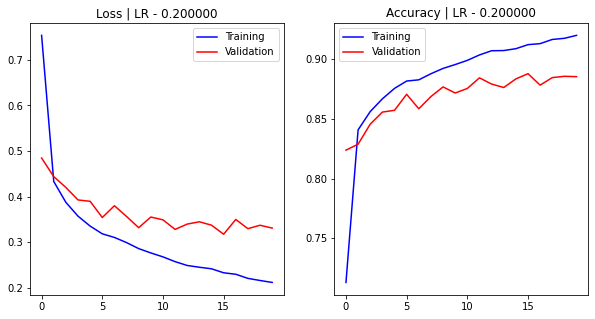

Epoch 0: 0.735481, 0.718480, 0.521233, 0.812000
Epoch 1: 0.433946, 0.840560, 0.415611, 0.842000
Epoch 2: 0.383743, 0.858200, 0.482578, 0.816500
Epoch 3: 0.353741, 0.867460, 0.406040, 0.853900
Epoch 4: 0.338459, 0.874920, 0.450581, 0.836500
Epoch 5: 0.326935, 0.877880, 0.341898, 0.871500
Epoch 6: 0.312661, 0.883400, 0.381840, 0.864300
Epoch 7: 0.297927, 0.888700, 0.366011, 0.865400
Epoch 8: 0.293431, 0.890040, 0.358916, 0.869900
Epoch 9: 0.286632, 0.892180, 0.344096, 0.877300
Epoch 10: 0.278799, 0.895480, 0.357650, 0.868000
Epoch 11: 0.275318, 0.895380, 0.355528, 0.871900
Epoch 12: 0.264098, 0.901180, 0.336379, 0.877100
Epoch 13: 0.261936, 0.900920, 0.370849, 0.871000
Epoch 14: 0.252738, 0.905220, 0.348481, 0.877000
Epoch 15: 0.248298, 0.906320, 0.356309, 0.865500
Epoch 16: 0.250290, 0.906880, 0.343286, 0.878300
Epoch 17: 0.248168, 0.905680, 0.358616, 0.873200
Epoch 18: 0.244206, 0.908140, 0.423833, 0.855800
Epoch 19: 0.242024, 0.907900, 0.382379, 0.859200


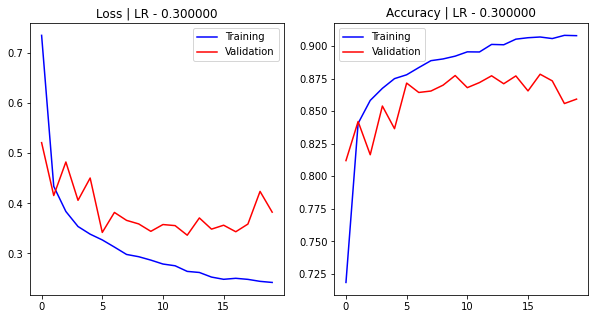

Epoch 0: 0.766883, 0.707720, 0.492644, 0.824400
Epoch 1: 0.448911, 0.836400, 0.465390, 0.832400
Epoch 2: 0.405936, 0.851740, 0.456978, 0.838300
Epoch 3: 0.377422, 0.862160, 0.459361, 0.841000
Epoch 4: 0.360649, 0.867560, 0.389248, 0.862500
Epoch 5: 0.355496, 0.869760, 0.439412, 0.842400
Epoch 6: 0.340619, 0.872700, 0.374850, 0.863900
Epoch 7: 0.325457, 0.879320, 0.371092, 0.864600
Epoch 8: 0.327393, 0.878860, 0.400750, 0.857700
Epoch 9: 0.313323, 0.883520, 0.376388, 0.861400
Epoch 10: 0.315049, 0.882860, 0.359157, 0.871400
Epoch 11: 0.306378, 0.887400, 0.356260, 0.871700
Epoch 12: 0.302868, 0.886380, 0.365197, 0.865900
Epoch 13: 0.307889, 0.884200, 0.390552, 0.861400
Epoch 14: 0.303458, 0.886260, 0.360873, 0.871500
Epoch 15: 0.296620, 0.889480, 0.395786, 0.860300
Epoch 16: 0.300097, 0.888020, 0.426339, 0.850800
Epoch 17: 0.296084, 0.890060, 0.358821, 0.875000
Epoch 18: 0.298479, 0.888700, 0.474107, 0.834600
Epoch 19: 0.287934, 0.891140, 0.384082, 0.866700


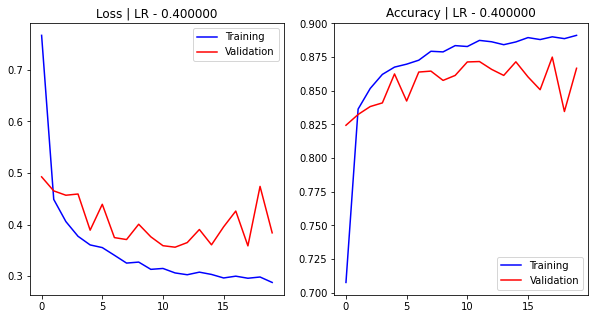

Epoch 0: 0.811385, 0.696280, 0.499578, 0.819300
Epoch 1: 0.467735, 0.830740, 0.521475, 0.799300
Epoch 2: 0.428729, 0.844540, 0.451286, 0.838800
Epoch 3: 0.404620, 0.853820, 0.446443, 0.837700
Epoch 4: 0.393940, 0.856800, 0.472008, 0.830400
Epoch 5: 0.386847, 0.859700, 0.407235, 0.856700
Epoch 6: 0.379550, 0.862000, 0.422259, 0.849800
Epoch 7: 0.385646, 0.858560, 0.413512, 0.852000
Epoch 8: 0.383706, 0.860460, 0.436831, 0.843000
Epoch 9: 0.387531, 0.861500, 0.434038, 0.852500
Epoch 10: 0.369916, 0.867160, 0.452051, 0.841100
Epoch 11: 0.370468, 0.865320, 0.455130, 0.835900
Epoch 12: 0.371702, 0.864380, 0.419941, 0.855600
Epoch 13: 0.366518, 0.866740, 0.474103, 0.837300
Epoch 14: 0.367500, 0.867680, 0.406539, 0.861500
Epoch 15: 0.379245, 0.863620, 0.432985, 0.846400
Epoch 16: 0.376686, 0.863880, 0.439277, 0.848300
Epoch 17: 0.383461, 0.861200, 0.438921, 0.854800
Epoch 18: 0.390652, 0.860680, 0.475029, 0.828500
Epoch 19: 0.396474, 0.859280, 0.530625, 0.819400


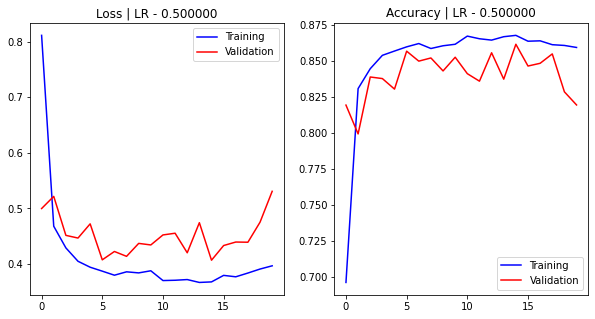

Epoch 0: 0.777761, 0.706260, 0.533473, 0.807800
Epoch 1: 0.506480, 0.819000, 0.500708, 0.823200
Epoch 2: 0.468324, 0.833180, 0.493941, 0.828900
Epoch 3: 0.438758, 0.844000, 0.491924, 0.817200
Epoch 4: 0.430068, 0.846580, 0.506526, 0.827600
Epoch 5: 0.431073, 0.845260, 0.445647, 0.844400
Epoch 6: 0.415060, 0.852260, 0.458110, 0.843200
Epoch 7: 0.398281, 0.858000, 0.466614, 0.844300
Epoch 8: 0.395654, 0.858020, 0.437219, 0.847500
Epoch 9: 0.407704, 0.853620, 0.441635, 0.848000
Epoch 10: 0.393725, 0.858740, 0.449728, 0.843600
Epoch 11: 0.401961, 0.855700, 0.438555, 0.845900
Epoch 12: 0.408427, 0.853660, 0.488477, 0.815500
Epoch 13: 0.407333, 0.854940, 0.447979, 0.841700
Epoch 14: 0.412360, 0.856200, 0.473975, 0.843400
Epoch 15: 0.441047, 0.845600, 0.461266, 0.843500
Epoch 16: 0.449968, 0.843220, 0.512689, 0.837100
Epoch 17: 0.459469, 0.838340, 0.552487, 0.824400
Epoch 18: 0.507006, 0.822720, 0.567912, 0.818500
Epoch 19: 0.494943, 0.830520, 0.518293, 0.824800


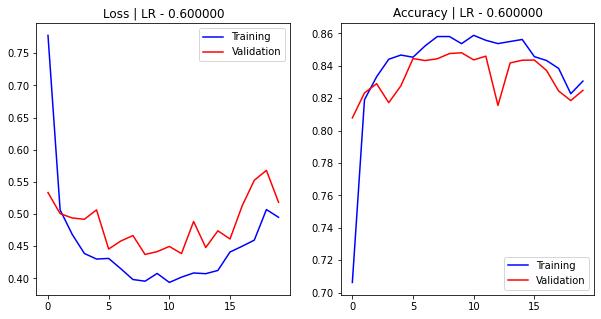

Epoch 0: 0.897267, 0.655900, 0.612989, 0.791200
Epoch 1: 0.574138, 0.796120, 0.550250, 0.804900
Epoch 2: 0.544859, 0.811300, 0.543653, 0.801400
Epoch 3: 0.558924, 0.807260, 0.573849, 0.806200
Epoch 4: 0.574976, 0.801500, 0.654824, 0.773800
Epoch 5: 0.577770, 0.803940, 0.649332, 0.792200
Epoch 6: 0.631292, 0.783000, 0.648195, 0.771400
Epoch 7: 0.691715, 0.767120, 0.677585, 0.781200
Epoch 8: 0.716381, 0.755160, 0.731815, 0.761900
Epoch 9: 0.716326, 0.754220, 0.825405, 0.705500
Epoch 10: 0.802661, 0.718880, 0.849353, 0.703800
Epoch 11: 0.821498, 0.714780, 0.903917, 0.729100
Epoch 12: 0.807419, 0.717080, 0.747315, 0.744300
Epoch 13: 0.797325, 0.719500, 0.722387, 0.730900
Epoch 14: 0.787230, 0.717360, 0.788716, 0.710000
Epoch 15: 0.784259, 0.721800, 0.745210, 0.744000
Epoch 16: 0.782161, 0.721340, 0.769162, 0.731400
Epoch 17: 0.858647, 0.690420, 1.050812, 0.586600
Epoch 18: 0.845988, 0.697340, 0.742524, 0.732800
Epoch 19: 0.787765, 0.724160, 0.784170, 0.726300


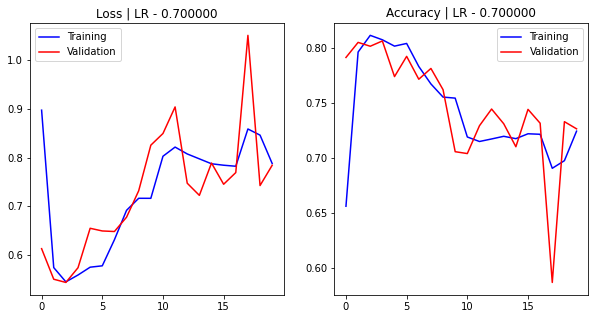

Epoch 0: 1.127293, 0.558480, 0.526267, 0.813800
Epoch 1: 0.639083, 0.777340, 0.629896, 0.803000
Epoch 2: 0.673229, 0.767740, 0.713678, 0.768600
Epoch 3: 0.784476, 0.718080, 0.764450, 0.738800
Epoch 4: 0.793468, 0.713860, 0.735754, 0.742700
Epoch 5: 0.797049, 0.711560, 0.926861, 0.622300
Epoch 6: 0.829231, 0.705040, 0.801879, 0.708300
Epoch 7: 0.836833, 0.692800, 0.838603, 0.674100
Epoch 8: 0.833453, 0.697020, 0.769978, 0.715900
Epoch 9: 0.812042, 0.701800, 0.987007, 0.683600
Epoch 10: 0.795231, 0.712920, 0.706164, 0.746300
Epoch 11: 0.779414, 0.717360, 0.765081, 0.719700
Epoch 12: 0.805282, 0.704080, 0.832835, 0.691300
Epoch 13: 0.816941, 0.701420, 0.842836, 0.679600
Epoch 14: 0.756191, 0.722140, 0.775566, 0.710200
Epoch 15: 0.762724, 0.719140, 0.792902, 0.688200
Epoch 16: 0.755081, 0.723460, 0.769137, 0.732600
Epoch 17: 0.761745, 0.722380, 0.834232, 0.700200
Epoch 18: 0.741411, 0.728520, 0.704769, 0.747800
Epoch 19: 0.744434, 0.729400, 0.772589, 0.722400


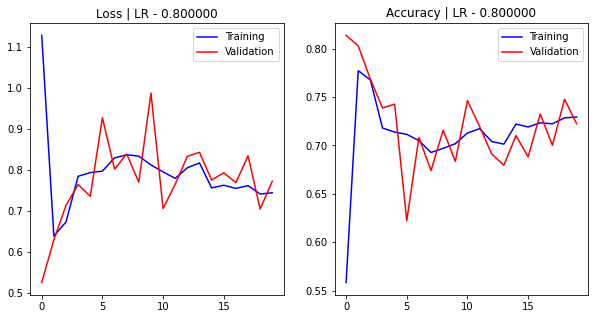

Epoch 0: 1.419480, 0.431080, 0.875879, 0.705400
Epoch 1: 0.857151, 0.703140, 1.112172, 0.691100
Epoch 2: 1.235654, 0.607940, 1.458968, 0.591500
Epoch 3: 1.831386, 0.412960, 2.849854, 0.195800
Epoch 4: 2.295449, 0.260420, 2.150314, 0.367400
Epoch 5: 2.417237, 0.225420, 4.494859, 0.098200
Epoch 6: 2.789023, 0.142760, 2.888023, 0.153500
Epoch 7: 2.554370, 0.205280, 2.525825, 0.139500
Epoch 8: 6.276027, 0.137600, 10.896330, 0.099300
Epoch 9: 10.208568, 0.100160, 7.706475, 0.098200
Epoch 10: 11.535464, 0.101000, 7.675403, 0.099300
Epoch 11: 10.449573, 0.099860, 6.108167, 0.099300
Epoch 12: 10.317259, 0.099780, 11.866218, 0.103200
Epoch 13: 3.234754, 0.191500, 2.793160, 0.198300
Epoch 14: 3.628781, 0.189800, 2.624900, 0.202200
Epoch 15: 2.646737, 0.209180, 1.953653, 0.267600
Epoch 16: 2.187664, 0.255680, 2.312057, 0.217300
Epoch 17: 2.093470, 0.263780, 2.660300, 0.202900
Epoch 18: 2.157383, 0.268980, 2.399518, 0.261200
Epoch 19: 2.768390, 0.199140, 5.941599, 0.097100


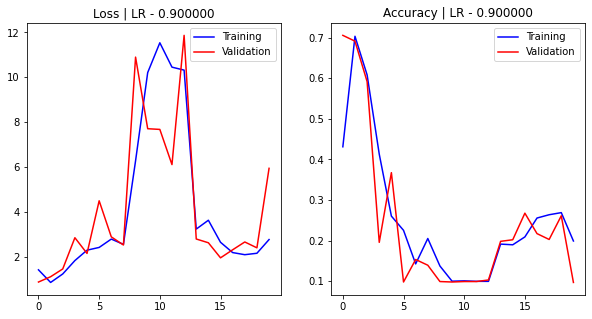

Epoch 0: 2.340300, 0.099600, 2.346515, 0.095700
Epoch 1: 2.339922, 0.100080, 2.339132, 0.097100
Epoch 2: 2.340151, 0.099540, 2.341552, 0.100400
Epoch 3: 2.338782, 0.098900, 2.328454, 0.098200
Epoch 4: 2.338870, 0.100500, 2.354944, 0.097100
Epoch 5: 2.342466, 0.097460, 2.335308, 0.098200
Epoch 6: 2.343265, 0.099860, 2.326408, 0.101900
Epoch 7: 2.338903, 0.100340, 2.321716, 0.102200
Epoch 8: 2.338176, 0.099500, 2.329623, 0.101900
Epoch 9: 2.342136, 0.101340, 2.359715, 0.103800
Epoch 10: 2.336780, 0.100120, 2.384376, 0.100400
Epoch 11: 2.339412, 0.098840, 2.344611, 0.098200
Epoch 12: 2.340017, 0.100300, 2.315530, 0.101900
Epoch 13: 2.337087, 0.098380, 2.340742, 0.102200
Epoch 14: 2.338361, 0.100760, 2.358692, 0.101900
Epoch 15: 2.339457, 0.100260, 2.385072, 0.100400
Epoch 16: 2.340542, 0.097280, 2.322909, 0.097100
Epoch 17: 2.339805, 0.099540, 2.316397, 0.097100
Epoch 18: 2.337035, 0.100740, 2.341484, 0.101900
Epoch 19: 2.338926, 0.099420, 2.341627, 0.101900


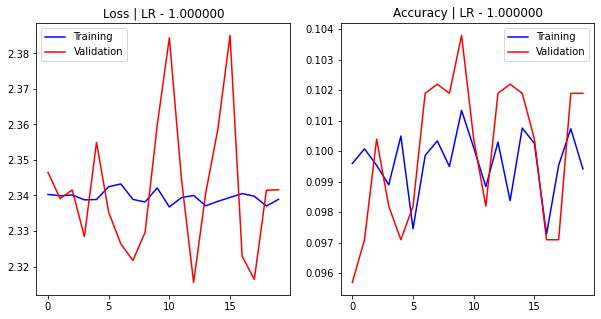

In [12]:
nbatch = 64
nepochs =20

training_loader = DataLoader(training_data, batch_size=nbatch, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=nbatch, shuffle=True)
    
for lr in np.arange(0,1.1,0.1):
  model = mlp()
  #model.to(cuda0)
  optimizer = torch.optim.SGD(model.parameters(),lr=lr, momentum=0.9)
  cost_hist, cost_hist_test, acc_hist, acc_hist_test = train_eval(model, optimizer, nepochs, training_loader, validation_loader)

  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(torch.arange(nepochs), cost_hist,"b-", label="Training")
  plt.plot(torch.arange(nepochs), cost_hist_test,"r-",label="Validation")
  plt.legend()
  plt.title("Loss | LR - %f"%(lr))

  plt.subplot(1,2,2)
  plt.plot(torch.arange(nepochs), acc_hist,"b-", label="Training")
  plt.plot(torch.arange(nepochs), acc_hist_test,"r-", label="Validation")
  plt.legend()
  plt.title("Accuracy | LR - %f"%(lr))
  plt.show()

Epoch 0: 1.353764, 0.491860, 0.813299, 0.680600
Epoch 1: 0.664370, 0.749620, 0.624563, 0.757700
Epoch 2: 0.554028, 0.799860, 0.542995, 0.810100
Epoch 3: 0.502770, 0.820400, 0.510632, 0.814900
Epoch 4: 0.470585, 0.831680, 0.483174, 0.828200
Epoch 5: 0.445069, 0.841120, 0.501788, 0.819300
Epoch 6: 0.428077, 0.847360, 0.459612, 0.835900
Epoch 7: 0.413386, 0.851020, 0.447470, 0.842900
Epoch 8: 0.402112, 0.855480, 0.456161, 0.836000
Epoch 9: 0.392520, 0.857980, 0.416723, 0.851900
Epoch 10: 0.381057, 0.861920, 0.426232, 0.845600
Epoch 11: 0.373909, 0.864680, 0.612152, 0.774400
Epoch 12: 0.366362, 0.867700, 0.497480, 0.824400
Epoch 13: 0.359799, 0.870220, 0.431786, 0.842200
Epoch 14: 0.352395, 0.872520, 0.428539, 0.841700
Epoch 15: 0.344290, 0.875080, 0.436713, 0.843700
Epoch 16: 0.338603, 0.877900, 0.410432, 0.850600
Epoch 17: 0.334141, 0.878800, 0.380260, 0.863000
Epoch 18: 0.329663, 0.880920, 0.482087, 0.814400
Epoch 19: 0.322643, 0.881920, 0.422693, 0.841700


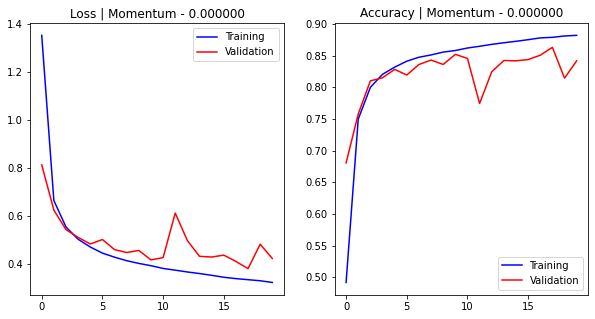

Epoch 0: 1.276817, 0.518880, 0.779657, 0.695500
Epoch 1: 0.644103, 0.757540, 0.632533, 0.757500
Epoch 2: 0.537505, 0.804580, 0.540834, 0.801500
Epoch 3: 0.488349, 0.822240, 0.507438, 0.820300
Epoch 4: 0.459024, 0.833300, 0.493252, 0.821300
Epoch 5: 0.438938, 0.841840, 0.596166, 0.792400
Epoch 6: 0.421425, 0.848640, 0.473253, 0.832900
Epoch 7: 0.407461, 0.854060, 0.501131, 0.825400
Epoch 8: 0.394093, 0.858800, 0.470830, 0.836700
Epoch 9: 0.383292, 0.861100, 0.399097, 0.857500
Epoch 10: 0.374248, 0.866280, 0.422626, 0.848300
Epoch 11: 0.365028, 0.867680, 0.395922, 0.859900
Epoch 12: 0.357069, 0.871940, 0.470852, 0.834900
Epoch 13: 0.350112, 0.872700, 0.392341, 0.858000
Epoch 14: 0.343727, 0.874740, 0.440870, 0.836500
Epoch 15: 0.335143, 0.877640, 0.447213, 0.835000
Epoch 16: 0.329181, 0.880040, 0.392350, 0.860800
Epoch 17: 0.324124, 0.882860, 0.375169, 0.863400
Epoch 18: 0.317857, 0.885160, 0.417354, 0.856000
Epoch 19: 0.312478, 0.885320, 0.407049, 0.853800


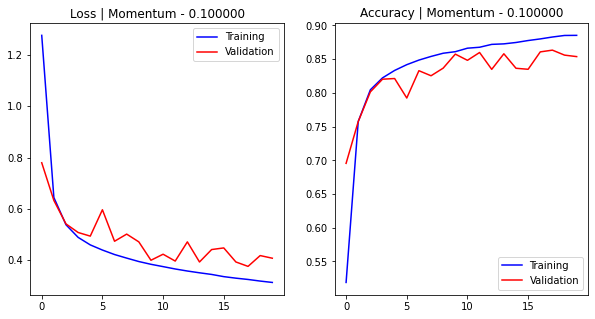

Epoch 0: 1.232203, 0.534680, 0.747494, 0.683700
Epoch 1: 0.630658, 0.762480, 0.599308, 0.773300
Epoch 2: 0.531340, 0.805060, 0.581730, 0.783800
Epoch 3: 0.482484, 0.826020, 0.498399, 0.817400
Epoch 4: 0.449749, 0.836640, 0.569641, 0.781000
Epoch 5: 0.427278, 0.844120, 0.476414, 0.823500
Epoch 6: 0.411182, 0.851520, 0.574086, 0.796500
Epoch 7: 0.395462, 0.856540, 0.572770, 0.798600
Epoch 8: 0.382584, 0.861280, 0.431832, 0.843200
Epoch 9: 0.370784, 0.865640, 0.423049, 0.847600
Epoch 10: 0.360818, 0.869360, 0.492596, 0.811800
Epoch 11: 0.353236, 0.871840, 0.474217, 0.828000
Epoch 12: 0.344401, 0.874520, 0.417133, 0.851900
Epoch 13: 0.338652, 0.876840, 0.369533, 0.861600
Epoch 14: 0.331035, 0.879340, 0.369030, 0.867000
Epoch 15: 0.326141, 0.881460, 0.388093, 0.855500
Epoch 16: 0.320029, 0.882840, 0.444998, 0.833200
Epoch 17: 0.313853, 0.885140, 0.366280, 0.865600
Epoch 18: 0.308392, 0.887220, 0.361390, 0.869000
Epoch 19: 0.304414, 0.887500, 0.372379, 0.863300


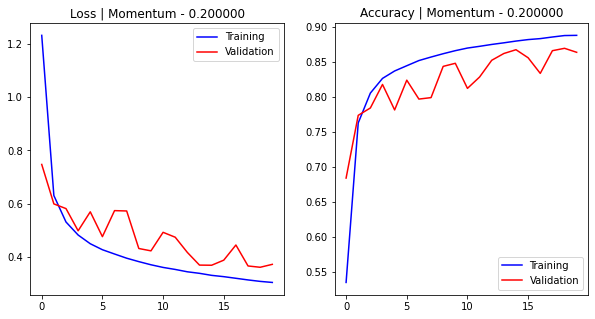

Epoch 0: 1.170199, 0.562040, 0.684207, 0.728600
Epoch 1: 0.586199, 0.782400, 0.612470, 0.783500
Epoch 2: 0.507799, 0.815060, 0.495621, 0.821400
Epoch 3: 0.466454, 0.831560, 0.496170, 0.819100
Epoch 4: 0.436024, 0.842140, 0.467928, 0.833100
Epoch 5: 0.416618, 0.849380, 0.603750, 0.789000
Epoch 6: 0.399870, 0.856160, 0.439128, 0.838000
Epoch 7: 0.384389, 0.861300, 0.401688, 0.856300
Epoch 8: 0.373315, 0.864240, 0.427758, 0.847200
Epoch 9: 0.363637, 0.869060, 0.437666, 0.845000
Epoch 10: 0.352544, 0.872700, 0.415413, 0.847000
Epoch 11: 0.345248, 0.875000, 0.384722, 0.860800
Epoch 12: 0.336124, 0.878120, 0.426425, 0.843900
Epoch 13: 0.330107, 0.880600, 0.410281, 0.843100
Epoch 14: 0.321703, 0.882160, 0.387554, 0.860500
Epoch 15: 0.316360, 0.883660, 0.368311, 0.867400
Epoch 16: 0.311184, 0.886080, 0.377224, 0.860400
Epoch 17: 0.305188, 0.888120, 0.370609, 0.866500
Epoch 18: 0.299767, 0.890700, 0.364561, 0.862400
Epoch 19: 0.294017, 0.893000, 0.337360, 0.876400


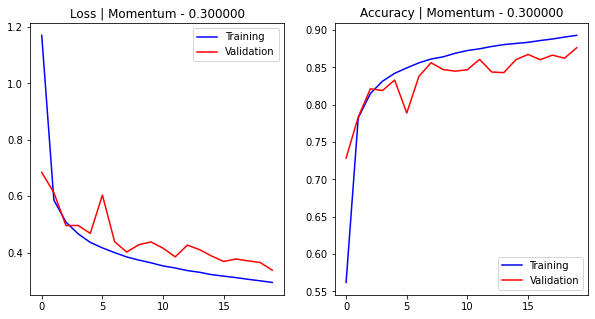

Epoch 0: 1.116135, 0.573880, 0.688986, 0.744000
Epoch 1: 0.569727, 0.791300, 0.568257, 0.795000
Epoch 2: 0.488731, 0.825040, 0.554283, 0.802700
Epoch 3: 0.449590, 0.837480, 0.550114, 0.799600
Epoch 4: 0.425425, 0.845400, 0.448372, 0.837900
Epoch 5: 0.401779, 0.854460, 0.460096, 0.832300
Epoch 6: 0.386205, 0.859980, 0.479983, 0.831000
Epoch 7: 0.373975, 0.866380, 0.426825, 0.843200
Epoch 8: 0.363216, 0.866640, 0.402581, 0.847200
Epoch 9: 0.351429, 0.872320, 0.447100, 0.832600
Epoch 10: 0.342591, 0.876100, 0.405893, 0.851400
Epoch 11: 0.334701, 0.878440, 0.411969, 0.849800
Epoch 12: 0.328078, 0.880640, 0.414622, 0.847400
Epoch 13: 0.320227, 0.883240, 0.382573, 0.866000
Epoch 14: 0.313094, 0.885880, 0.388874, 0.857500
Epoch 15: 0.306575, 0.887200, 0.364365, 0.867000
Epoch 16: 0.302552, 0.888740, 0.465440, 0.830700
Epoch 17: 0.297083, 0.890780, 0.355609, 0.869700
Epoch 18: 0.290530, 0.892720, 0.362036, 0.868800
Epoch 19: 0.285868, 0.895400, 0.355456, 0.873200


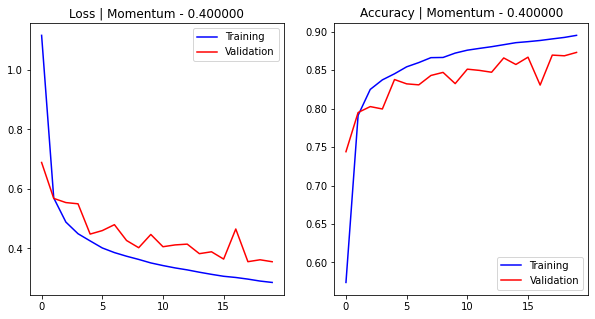

Epoch 0: 1.035528, 0.606420, 0.651504, 0.755600
Epoch 1: 0.541547, 0.801760, 0.500093, 0.818700
Epoch 2: 0.469251, 0.829940, 0.472166, 0.834900
Epoch 3: 0.434692, 0.843200, 0.555728, 0.791800
Epoch 4: 0.410719, 0.851680, 0.459481, 0.835400
Epoch 5: 0.389848, 0.859600, 0.424616, 0.845500
Epoch 6: 0.376072, 0.864320, 0.407209, 0.849800
Epoch 7: 0.361614, 0.868840, 0.401271, 0.849100
Epoch 8: 0.350947, 0.872960, 0.388712, 0.860200
Epoch 9: 0.340041, 0.875160, 0.376675, 0.863000
Epoch 10: 0.330530, 0.879320, 0.365347, 0.863300
Epoch 11: 0.322500, 0.882980, 0.390570, 0.854100
Epoch 12: 0.314076, 0.886520, 0.383864, 0.863100
Epoch 13: 0.307073, 0.886980, 0.351414, 0.873700
Epoch 14: 0.301396, 0.888840, 0.363370, 0.869000
Epoch 15: 0.294834, 0.890540, 0.373449, 0.865100
Epoch 16: 0.288230, 0.894400, 0.353890, 0.869300
Epoch 17: 0.281750, 0.895820, 0.354341, 0.870500
Epoch 18: 0.276571, 0.897680, 0.352734, 0.872700
Epoch 19: 0.273112, 0.899140, 0.366711, 0.864900


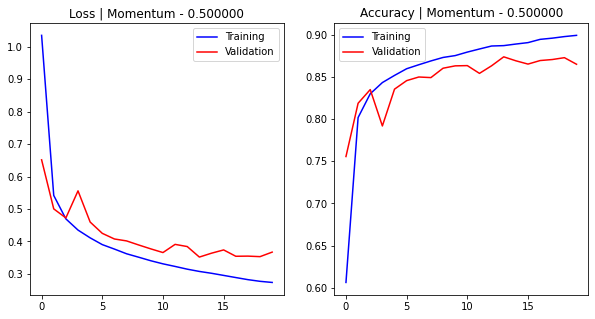

Epoch 0: 0.966130, 0.631560, 0.676482, 0.749100
Epoch 1: 0.518154, 0.810920, 0.504734, 0.815500
Epoch 2: 0.454325, 0.835560, 0.508349, 0.810500
Epoch 3: 0.419691, 0.848200, 0.444581, 0.840600
Epoch 4: 0.395906, 0.856720, 0.401860, 0.855200
Epoch 5: 0.377028, 0.863840, 0.497670, 0.809000
Epoch 6: 0.362847, 0.868220, 0.417155, 0.848300
Epoch 7: 0.348679, 0.872220, 0.397973, 0.854400
Epoch 8: 0.337188, 0.877340, 0.381620, 0.860000
Epoch 9: 0.326813, 0.879820, 0.378554, 0.859000
Epoch 10: 0.318828, 0.883860, 0.361794, 0.867800
Epoch 11: 0.309432, 0.885800, 0.354532, 0.871000
Epoch 12: 0.302712, 0.887560, 0.367106, 0.865100
Epoch 13: 0.295428, 0.891600, 0.344933, 0.873300
Epoch 14: 0.289568, 0.892100, 0.346705, 0.869900
Epoch 15: 0.283898, 0.894700, 0.329506, 0.878700
Epoch 16: 0.276328, 0.897040, 0.349390, 0.868900
Epoch 17: 0.269783, 0.900000, 0.397888, 0.862300
Epoch 18: 0.265182, 0.900820, 0.337657, 0.879200
Epoch 19: 0.258929, 0.903460, 0.328493, 0.880200


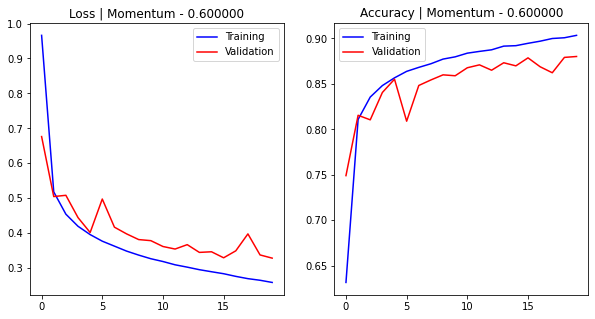

Epoch 0: 0.884785, 0.663000, 0.603395, 0.768700
Epoch 1: 0.495181, 0.821520, 0.514463, 0.813900
Epoch 2: 0.434654, 0.843040, 0.463557, 0.836800
Epoch 3: 0.400400, 0.855540, 0.405266, 0.854800
Epoch 4: 0.376178, 0.863280, 0.418123, 0.847200
Epoch 5: 0.359734, 0.868620, 0.403421, 0.848300
Epoch 6: 0.343359, 0.873260, 0.371325, 0.865000
Epoch 7: 0.333506, 0.877060, 0.399821, 0.847500
Epoch 8: 0.320624, 0.882260, 0.366816, 0.867900
Epoch 9: 0.312951, 0.885460, 0.359451, 0.866100
Epoch 10: 0.303198, 0.886800, 0.366679, 0.863500
Epoch 11: 0.293533, 0.891260, 0.348747, 0.874000
Epoch 12: 0.287196, 0.892640, 0.343326, 0.873900
Epoch 13: 0.279105, 0.895520, 0.344581, 0.876400
Epoch 14: 0.273641, 0.898460, 0.348376, 0.871400
Epoch 15: 0.267052, 0.899700, 0.322505, 0.884300
Epoch 16: 0.261250, 0.901560, 0.335426, 0.877400
Epoch 17: 0.255585, 0.904860, 0.376158, 0.863000
Epoch 18: 0.249630, 0.906260, 0.353966, 0.873800
Epoch 19: 0.246139, 0.908500, 0.372880, 0.869300


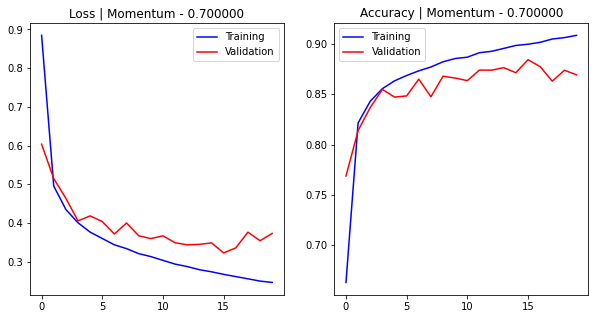

Epoch 0: 0.805864, 0.693980, 0.505424, 0.814500
Epoch 1: 0.463090, 0.830760, 0.443695, 0.838800
Epoch 2: 0.411292, 0.849600, 0.404598, 0.851000
Epoch 3: 0.377195, 0.861600, 0.387568, 0.857900
Epoch 4: 0.356007, 0.868340, 0.372806, 0.862400
Epoch 5: 0.339589, 0.873660, 0.373316, 0.863300
Epoch 6: 0.322502, 0.880720, 0.362549, 0.864700
Epoch 7: 0.312973, 0.882760, 0.368596, 0.863000
Epoch 8: 0.301265, 0.888180, 0.338908, 0.874100
Epoch 9: 0.293723, 0.890020, 0.351521, 0.867200
Epoch 10: 0.283727, 0.893640, 0.350160, 0.870400
Epoch 11: 0.275814, 0.896640, 0.322912, 0.882900
Epoch 12: 0.268531, 0.899740, 0.330876, 0.879000
Epoch 13: 0.262442, 0.901620, 0.336685, 0.877600
Epoch 14: 0.255521, 0.904240, 0.340212, 0.877200
Epoch 15: 0.250047, 0.906280, 0.327896, 0.877900
Epoch 16: 0.242675, 0.909160, 0.333984, 0.877000
Epoch 17: 0.237369, 0.911600, 0.326153, 0.880100
Epoch 18: 0.229723, 0.913960, 0.333499, 0.877700
Epoch 19: 0.227654, 0.914100, 0.328084, 0.884600


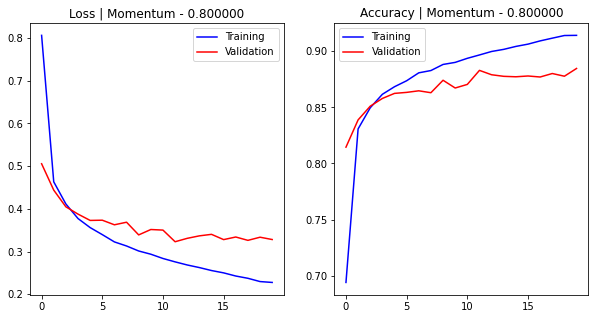

Epoch 0: 0.738623, 0.717000, 0.500579, 0.816300
Epoch 1: 0.427182, 0.843100, 0.461499, 0.832800
Epoch 2: 0.383696, 0.857440, 0.431087, 0.836600
Epoch 3: 0.353636, 0.868080, 0.403284, 0.848800
Epoch 4: 0.332616, 0.875600, 0.368593, 0.863800
Epoch 5: 0.317711, 0.880340, 0.365887, 0.867400
Epoch 6: 0.307665, 0.884380, 0.372967, 0.860300
Epoch 7: 0.294208, 0.890080, 0.355980, 0.869300
Epoch 8: 0.282047, 0.894640, 0.339951, 0.876600
Epoch 9: 0.276217, 0.896220, 0.337916, 0.873200
Epoch 10: 0.264130, 0.899660, 0.368039, 0.871800
Epoch 11: 0.255716, 0.904200, 0.335688, 0.875200
Epoch 12: 0.249157, 0.904980, 0.342350, 0.872600
Epoch 13: 0.243533, 0.907220, 0.331141, 0.880800
Epoch 14: 0.237413, 0.909860, 0.350183, 0.876100
Epoch 15: 0.227412, 0.914280, 0.348788, 0.879400
Epoch 16: 0.226953, 0.913760, 0.344998, 0.878300
Epoch 17: 0.218580, 0.916480, 0.355236, 0.878000
Epoch 18: 0.212684, 0.918360, 0.362689, 0.868200
Epoch 19: 0.212883, 0.918920, 0.337627, 0.881600


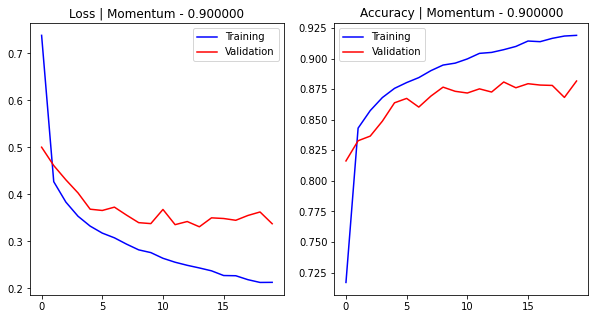

Epoch 0: 2.489321, 0.100720, 2.555008, 0.102200
Epoch 1: 2.805962, 0.097240, 3.044859, 0.098200
Epoch 2: 3.492496, 0.099200, 3.618052, 0.100400
Epoch 3: 4.512532, 0.099260, 3.711180, 0.098200
Epoch 4: 4.796553, 0.101740, 5.760774, 0.100400
Epoch 5: 5.810447, 0.100540, 6.271420, 0.101900
Epoch 6: 6.933909, 0.097500, 7.059705, 0.101900
Epoch 7: 7.663989, 0.100840, 7.878099, 0.098200
Epoch 8: 7.977903, 0.100000, 6.957516, 0.100400
Epoch 9: 8.795382, 0.099540, 9.296613, 0.103200
Epoch 10: 9.861198, 0.101720, 13.826611, 0.102200
Epoch 11: 11.245854, 0.099380, 12.965769, 0.103200
Epoch 12: 11.171431, 0.098920, 9.852584, 0.097100
Epoch 13: 11.935782, 0.099680, 13.877709, 0.098200
Epoch 14: 13.466347, 0.100260, 13.393382, 0.102200
Epoch 15: 14.520347, 0.099340, 11.421367, 0.102200
Epoch 16: 14.043469, 0.102560, 16.308670, 0.097100
Epoch 17: 13.723839, 0.099660, 7.642615, 0.095700
Epoch 18: 13.547803, 0.099680, 15.012169, 0.098200
Epoch 19: 14.389114, 0.101340, 14.760575, 0.099300


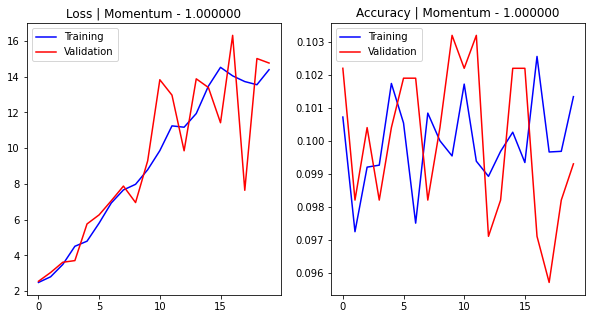

In [13]:
nbatch = 64
nepochs =20

training_loader = DataLoader(training_data, batch_size=nbatch, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=nbatch, shuffle=True)
    
for m in np.arange(0,1.1,0.1):
  model = mlp()
  #model.to(cuda0)
  optimizer = torch.optim.SGD(model.parameters(),lr=0.2, momentum=m)
  cost_hist, cost_hist_test, acc_hist, acc_hist_test = train_eval(model, optimizer, nepochs, training_loader, validation_loader)

  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(torch.arange(nepochs), cost_hist,"b-", label="Training")
  plt.plot(torch.arange(nepochs), cost_hist_test,"r-",label="Validation")
  plt.legend()
  plt.title("Loss | Momentum - %f"%(m))

  plt.subplot(1,2,2)
  plt.plot(torch.arange(nepochs), acc_hist,"b-", label="Training")
  plt.plot(torch.arange(nepochs), acc_hist_test,"r-", label="Validation")
  plt.legend()
  plt.title("Accuracy | Momentum - %f"%(m))
  plt.show()

<font style="color:red"> **Nesterov** </font>

Epoch 0: 0.676962, 0.746560, 0.455520, 0.838000
Epoch 1: 0.411990, 0.849820, 0.450823, 0.835800
Epoch 2: 0.368386, 0.866360, 0.381510, 0.859600
Epoch 3: 0.340833, 0.874000, 0.381776, 0.858800
Epoch 4: 0.320977, 0.880320, 0.373162, 0.863400
Epoch 5: 0.306097, 0.886220, 0.378986, 0.866900
Epoch 6: 0.292644, 0.891600, 0.382112, 0.863600
Epoch 7: 0.280481, 0.895080, 0.353261, 0.870100
Epoch 8: 0.273222, 0.897980, 0.348950, 0.874000
Epoch 9: 0.263095, 0.900660, 0.327458, 0.883400
Epoch 10: 0.254312, 0.904320, 0.329371, 0.881100
Epoch 11: 0.249165, 0.906720, 0.333906, 0.882500
Epoch 12: 0.240587, 0.909820, 0.324505, 0.880600
Epoch 13: 0.234747, 0.911760, 0.357378, 0.875800
Epoch 14: 0.228177, 0.913940, 0.344800, 0.880100
Epoch 15: 0.223521, 0.916160, 0.334858, 0.883300
Epoch 16: 0.219245, 0.916500, 0.346453, 0.883400
Epoch 17: 0.216595, 0.918660, 0.353561, 0.882000
Epoch 18: 0.207648, 0.922040, 0.346402, 0.884800
Epoch 19: 0.204379, 0.921600, 0.350846, 0.881300


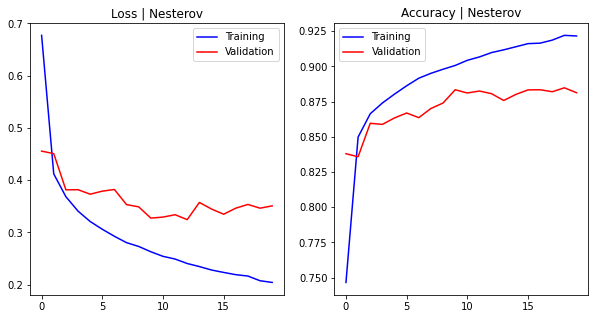

In [16]:
nbatch = 64
nepochs =20

training_loader = DataLoader(training_data, batch_size=nbatch, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=nbatch, shuffle=True)
    
model = mlp()
#model.to(cuda0)
optimizer = torch.optim.SGD(model.parameters(),lr=0.2, momentum=0.9, nesterov=True)
cost_hist, cost_hist_test, acc_hist, acc_hist_test = train_eval(model, optimizer, nepochs, training_loader, validation_loader)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(torch.arange(nepochs), cost_hist,"b-", label="Training")
plt.plot(torch.arange(nepochs), cost_hist_test,"r-",label="Validation")
plt.legend()
plt.title("Loss | Nesterov")

plt.subplot(1,2,2)
plt.plot(torch.arange(nepochs), acc_hist,"b-", label="Training")
plt.plot(torch.arange(nepochs), acc_hist_test,"r-", label="Validation")
plt.legend()
plt.title("Accuracy | Nesterov")
plt.show()

<font style="color:red">If we compare it with the plot from above with the same parameters, than we see a little that the plot with nesterov is smoother but we have to look very detailed... </br> final choise **LR = 0.2, momentum = 0.9, nesterov = False and epoch = 20**</font>



3. RMSprop: Same thing now for RMSprop (without momentum). Play with different settings when using RMSprop: lr, alpha. Start with the default settings of pytorch with (lr=0.01, alpha=0.99,centered=False). Then vary alpha and independently the learning rate. Can you see an impact when using centered=True? What is your recommended best choice (learning rate, alpha, centered, nepochs) for the given problem?

<font style="color:red"> default </font>

Epoch 0: 0.967960, 0.628320, 0.765140, 0.627900
Epoch 1: 0.530801, 0.802660, 0.718192, 0.713500
Epoch 2: 0.465614, 0.833220, 0.611801, 0.799600
Epoch 3: 0.443241, 0.839520, 0.507009, 0.826600
Epoch 4: 0.418624, 0.848840, 0.586058, 0.804500
Epoch 5: 0.411059, 0.850880, 0.461391, 0.837300
Epoch 6: 0.399690, 0.854620, 0.451485, 0.840600
Epoch 7: 0.392265, 0.859100, 0.410041, 0.852900
Epoch 8: 0.387921, 0.861660, 0.433530, 0.848200
Epoch 9: 0.381276, 0.863000, 0.408472, 0.857200
Epoch 10: 0.383928, 0.861820, 0.435367, 0.843700
Epoch 11: 0.376961, 0.864940, 0.443823, 0.834500
Epoch 12: 0.378027, 0.863780, 0.535057, 0.812500
Epoch 13: 0.371321, 0.868100, 0.435056, 0.850900
Epoch 14: 0.365757, 0.868940, 0.468861, 0.841500
Epoch 15: 0.362037, 0.870120, 0.410698, 0.853600
Epoch 16: 0.362072, 0.870560, 0.497757, 0.830900
Epoch 17: 0.362409, 0.870600, 0.506568, 0.823800
Epoch 18: 0.358288, 0.872340, 0.458785, 0.848000
Epoch 19: 0.352990, 0.875240, 0.433123, 0.856500


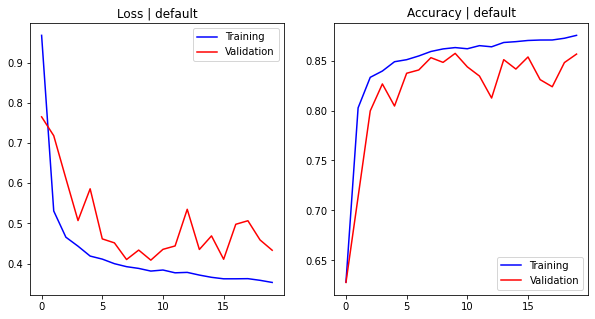

In [19]:
nbatch = 64
nepochs =20

training_loader = DataLoader(training_data, batch_size=nbatch, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=nbatch, shuffle=True)
    
model = mlp()
#model.to(cuda0)
optimizer = torch.optim.RMSprop(model.parameters(),lr=0.01, alpha=0.99, centered=False)
cost_hist, cost_hist_test, acc_hist, acc_hist_test = train_eval(model, optimizer, nepochs, training_loader, validation_loader)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(torch.arange(nepochs), cost_hist,"b-", label="Training")
plt.plot(torch.arange(nepochs), cost_hist_test,"r-",label="Validation")
plt.legend()
plt.title("Loss | default")

plt.subplot(1,2,2)
plt.plot(torch.arange(nepochs), acc_hist,"b-", label="Training")
plt.plot(torch.arange(nepochs), acc_hist_test,"r-", label="Validation")
plt.legend()
plt.title("Accuracy | default")
plt.show()

<font style="color:red"> Learning Rate </font>

Epoch 0: 0.561347, 0.791020, 0.480777, 0.824800
Epoch 1: 0.382920, 0.858820, 0.430238, 0.838500
Epoch 2: 0.348672, 0.870480, 0.435819, 0.843300
Epoch 3: 0.328080, 0.878260, 0.631571, 0.782700
Epoch 4: 0.316404, 0.881740, 0.772638, 0.759700
Epoch 5: 0.302437, 0.885720, 0.396730, 0.853100
Epoch 6: 0.291885, 0.890020, 0.452893, 0.828000
Epoch 7: 0.285309, 0.893000, 0.340831, 0.879300
Epoch 8: 0.279393, 0.894480, 0.396324, 0.862000
Epoch 9: 0.273783, 0.895920, 0.336083, 0.878400
Epoch 10: 0.270258, 0.897980, 0.352633, 0.879700
Epoch 11: 0.264530, 0.900020, 0.372424, 0.873200
Epoch 12: 0.262472, 0.899900, 0.358937, 0.870500
Epoch 13: 0.256419, 0.904300, 0.380303, 0.869200
Epoch 14: 0.255605, 0.903600, 0.353763, 0.873600
Epoch 15: 0.253177, 0.903840, 0.373014, 0.867500
Epoch 16: 0.248459, 0.905960, 0.359598, 0.878500
Epoch 17: 0.245049, 0.907380, 0.362261, 0.876800
Epoch 18: 0.245124, 0.907020, 0.370192, 0.875900
Epoch 19: 0.241080, 0.909400, 0.368327, 0.870700


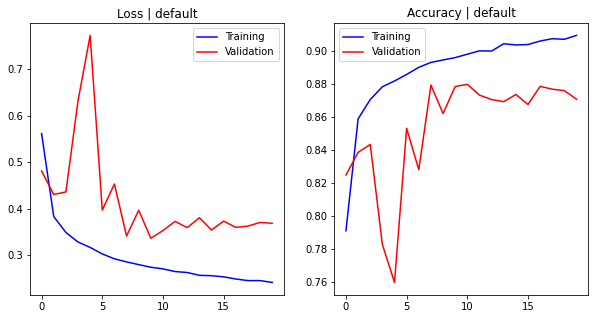

Epoch 0: 0.591005, 0.779540, 0.435263, 0.838800
Epoch 1: 0.398145, 0.852620, 0.409159, 0.853300
Epoch 2: 0.364339, 0.866740, 0.502731, 0.811300
Epoch 3: 0.345728, 0.871320, 0.469369, 0.824400
Epoch 4: 0.329939, 0.878400, 0.393013, 0.862300
Epoch 5: 0.318213, 0.881440, 0.404933, 0.849000
Epoch 6: 0.309506, 0.884800, 0.372359, 0.864000
Epoch 7: 0.303744, 0.886140, 0.398623, 0.854800
Epoch 8: 0.294137, 0.889880, 0.386554, 0.864800
Epoch 9: 0.290873, 0.892060, 0.370822, 0.868700
Epoch 10: 0.282219, 0.895240, 0.381903, 0.869900
Epoch 11: 0.282958, 0.893820, 0.369649, 0.867200
Epoch 12: 0.272028, 0.897900, 0.386469, 0.865700
Epoch 13: 0.275795, 0.897620, 0.407387, 0.861600
Epoch 14: 0.272549, 0.898860, 0.355324, 0.877200
Epoch 15: 0.267749, 0.900000, 0.414452, 0.867900
Epoch 16: 0.267233, 0.901460, 0.360753, 0.877500
Epoch 17: 0.261895, 0.902460, 0.440565, 0.848800
Epoch 18: 0.260984, 0.902440, 0.399849, 0.866700
Epoch 19: 0.256036, 0.903960, 0.384856, 0.871300


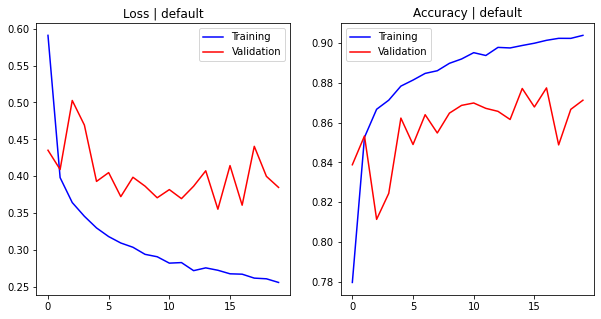

Epoch 0: 0.652287, 0.755780, 0.664220, 0.730800
Epoch 1: 0.414876, 0.846220, 0.405168, 0.849900
Epoch 2: 0.378973, 0.858840, 0.561216, 0.799500
Epoch 3: 0.357025, 0.867960, 0.401859, 0.857100
Epoch 4: 0.344399, 0.873020, 0.390062, 0.853600
Epoch 5: 0.336731, 0.873000, 0.386008, 0.852100
Epoch 6: 0.325966, 0.879420, 0.397688, 0.854800
Epoch 7: 0.322091, 0.879000, 0.383262, 0.858000
Epoch 8: 0.313368, 0.884300, 0.521218, 0.815900
Epoch 9: 0.309804, 0.884980, 0.376282, 0.868400
Epoch 10: 0.306744, 0.886040, 0.360313, 0.867300
Epoch 11: 0.306687, 0.885180, 0.413951, 0.856200
Epoch 12: 0.303854, 0.887040, 0.407764, 0.854000
Epoch 13: 0.298504, 0.889260, 0.364084, 0.872500
Epoch 14: 0.294814, 0.891860, 0.479499, 0.829400
Epoch 15: 0.300285, 0.889040, 0.413042, 0.853800
Epoch 16: 0.297156, 0.890760, 0.463407, 0.830700
Epoch 17: 0.295494, 0.890640, 0.450700, 0.844000
Epoch 18: 0.289499, 0.893740, 0.385064, 0.863600
Epoch 19: 0.290942, 0.893680, 0.488079, 0.818700


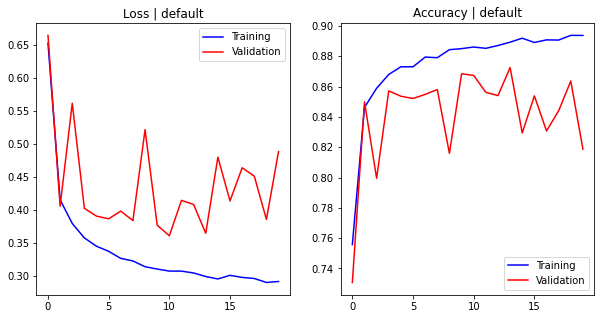

Epoch 0: 0.666689, 0.747800, 0.465889, 0.828900
Epoch 1: 0.429627, 0.841600, 0.593680, 0.786900
Epoch 2: 0.398350, 0.852220, 0.577424, 0.786200
Epoch 3: 0.378333, 0.860020, 0.390904, 0.857100
Epoch 4: 0.361846, 0.866060, 0.504333, 0.810500
Epoch 5: 0.351827, 0.870420, 0.787885, 0.727300
Epoch 6: 0.347470, 0.870160, 0.471894, 0.829000
Epoch 7: 0.341329, 0.873280, 0.396452, 0.860600
Epoch 8: 0.340281, 0.875000, 0.473759, 0.828400
Epoch 9: 0.331855, 0.878080, 0.392352, 0.858900
Epoch 10: 0.330597, 0.877560, 0.408427, 0.851100
Epoch 11: 0.321866, 0.882760, 0.417338, 0.851600
Epoch 12: 0.321706, 0.880900, 0.409755, 0.853400
Epoch 13: 0.321976, 0.881020, 0.396967, 0.861000
Epoch 14: 0.314677, 0.884340, 0.385056, 0.862100
Epoch 15: 0.313703, 0.885000, 0.387977, 0.867900
Epoch 16: 0.310303, 0.886160, 0.417789, 0.853000
Epoch 17: 0.309546, 0.886300, 0.384749, 0.865600
Epoch 18: 0.314033, 0.885940, 0.446810, 0.841800
Epoch 19: 0.309654, 0.886660, 0.404914, 0.857300


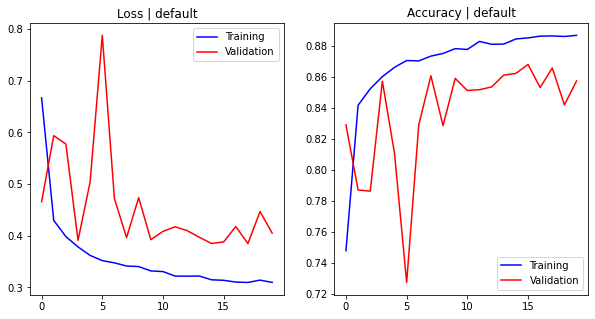

Epoch 0: 0.776034, 0.706060, 0.627810, 0.788900
Epoch 1: 0.467920, 0.830540, 0.515184, 0.809100
Epoch 2: 0.426156, 0.845380, 0.543374, 0.793900
Epoch 3: 0.406795, 0.851940, 0.447638, 0.841500
Epoch 4: 0.396070, 0.856480, 0.397968, 0.855400
Epoch 5: 0.378359, 0.862840, 0.549162, 0.799800
Epoch 6: 0.369470, 0.865120, 0.482786, 0.838400
Epoch 7: 0.370452, 0.865180, 0.422119, 0.846700
Epoch 8: 0.364310, 0.868240, 0.420672, 0.854000
Epoch 9: 0.359838, 0.869540, 0.430787, 0.841300
Epoch 10: 0.354504, 0.872260, 0.459478, 0.842500
Epoch 11: 0.354313, 0.870040, 0.428015, 0.853000
Epoch 12: 0.352240, 0.870340, 0.398503, 0.858900
Epoch 13: 0.353014, 0.870320, 0.456599, 0.831400
Epoch 14: 0.354722, 0.871660, 0.509447, 0.799200
Epoch 15: 0.349237, 0.872860, 0.418947, 0.852400
Epoch 16: 0.345511, 0.874500, 0.434991, 0.856300
Epoch 17: 0.338130, 0.876840, 0.428013, 0.851900
Epoch 18: 0.339313, 0.875180, 0.450467, 0.842600
Epoch 19: 0.336573, 0.876180, 0.431545, 0.844100


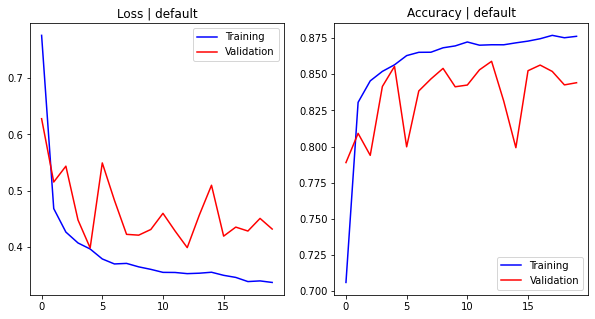

Epoch 0: 0.790470, 0.702280, 0.564689, 0.789300
Epoch 1: 0.479947, 0.827700, 0.547474, 0.801900
Epoch 2: 0.437903, 0.842660, 0.436410, 0.840300
Epoch 3: 0.415613, 0.851080, 0.458035, 0.834700
Epoch 4: 0.404377, 0.851840, 0.445152, 0.846700
Epoch 5: 0.397788, 0.856180, 0.535766, 0.817200
Epoch 6: 0.390006, 0.859200, 0.508202, 0.828700
Epoch 7: 0.385031, 0.860620, 0.440026, 0.847700
Epoch 8: 0.377850, 0.864360, 0.440146, 0.846400
Epoch 9: 0.376995, 0.865240, 0.446288, 0.842400
Epoch 10: 0.369627, 0.868240, 0.497239, 0.843500
Epoch 11: 0.364919, 0.867520, 0.530947, 0.794800
Epoch 12: 0.361994, 0.870200, 0.418026, 0.854600
Epoch 13: 0.358307, 0.869880, 0.444987, 0.840000
Epoch 14: 0.359246, 0.871020, 0.414074, 0.861600
Epoch 15: 0.354463, 0.872900, 0.487102, 0.837300
Epoch 16: 0.357546, 0.870620, 0.414302, 0.857400
Epoch 17: 0.353748, 0.872520, 0.425964, 0.852500
Epoch 18: 0.355378, 0.871260, 0.428578, 0.850200
Epoch 19: 0.356120, 0.870880, 0.463307, 0.842800


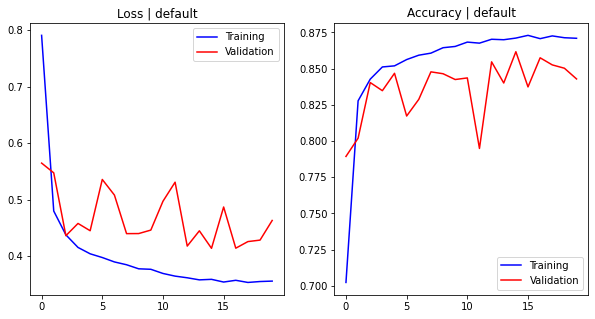

Epoch 0: 0.931592, 0.638620, 0.842925, 0.731000
Epoch 1: 0.525872, 0.812600, 0.530535, 0.814200
Epoch 2: 0.475155, 0.829440, 0.611819, 0.789100
Epoch 3: 0.449211, 0.838980, 0.623366, 0.780300
Epoch 4: 0.439973, 0.842560, 0.481816, 0.811400
Epoch 5: 0.433762, 0.844740, 0.521627, 0.819300
Epoch 6: 0.426654, 0.846200, 0.515978, 0.809400
Epoch 7: 0.423468, 0.849660, 0.509539, 0.817900
Epoch 8: 0.413661, 0.851720, 0.490975, 0.820400
Epoch 9: 0.410633, 0.853440, 0.458282, 0.841100
Epoch 10: 0.403336, 0.855980, 0.445850, 0.850400
Epoch 11: 0.398328, 0.858240, 0.511752, 0.820800
Epoch 12: 0.396570, 0.860320, 0.436154, 0.852500
Epoch 13: 0.390406, 0.860120, 0.460950, 0.838900
Epoch 14: 0.389465, 0.861720, 0.458887, 0.850100
Epoch 15: 0.387652, 0.863540, 0.494662, 0.823300
Epoch 16: 0.388600, 0.859180, 0.488464, 0.831000
Epoch 17: 0.383505, 0.862720, 0.511176, 0.817500
Epoch 18: 0.380181, 0.863060, 0.459855, 0.844000
Epoch 19: 0.375772, 0.865320, 0.476142, 0.836400


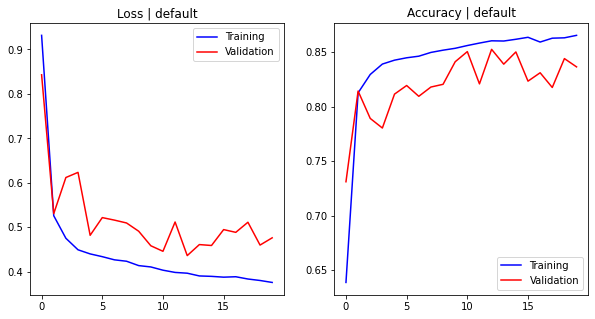

Epoch 0: 1.298932, 0.480420, 0.887672, 0.682400
Epoch 1: 0.666268, 0.738800, 0.612506, 0.776800
Epoch 2: 0.567077, 0.787620, 0.665809, 0.771700
Epoch 3: 0.507919, 0.814940, 0.609260, 0.791200
Epoch 4: 0.478334, 0.828540, 0.611694, 0.793200
Epoch 5: 0.452843, 0.838820, 0.589393, 0.795400
Epoch 6: 0.440341, 0.844560, 0.468096, 0.841900
Epoch 7: 0.431827, 0.843220, 0.560836, 0.791800
Epoch 8: 0.428894, 0.847420, 0.604025, 0.775800
Epoch 9: 0.421612, 0.850440, 0.438467, 0.849000
Epoch 10: 0.420502, 0.849140, 0.435059, 0.853600
Epoch 11: 0.407159, 0.852640, 0.519653, 0.796100
Epoch 12: 0.408359, 0.854020, 0.443353, 0.842500
Epoch 13: 0.400962, 0.855540, 0.433852, 0.846600
Epoch 14: 0.403827, 0.855400, 0.521197, 0.815400
Epoch 15: 0.399970, 0.857580, 0.435291, 0.841800
Epoch 16: 0.398761, 0.856780, 0.435603, 0.850800
Epoch 17: 0.397309, 0.858480, 0.800650, 0.727800
Epoch 18: 0.389066, 0.860140, 0.460775, 0.845600
Epoch 19: 0.384238, 0.861440, 0.433688, 0.846800


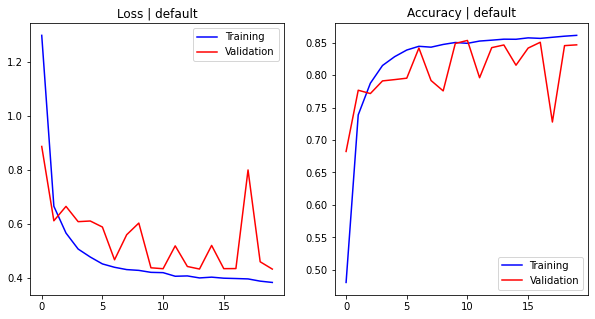

Epoch 0: 1.235803, 0.502940, 1.113988, 0.592700
Epoch 1: 0.615545, 0.776180, 0.670344, 0.777800
Epoch 2: 0.547520, 0.805640, 0.773533, 0.708400
Epoch 3: 0.516986, 0.816600, 0.495905, 0.831600
Epoch 4: 0.490585, 0.826100, 0.593337, 0.775100
Epoch 5: 0.479885, 0.831840, 0.501696, 0.822800
Epoch 6: 0.472870, 0.831480, 0.804456, 0.715600
Epoch 7: 0.462660, 0.835700, 0.650673, 0.782500
Epoch 8: 0.449262, 0.840900, 0.544860, 0.805700
Epoch 9: 0.439710, 0.843480, 0.693710, 0.779500
Epoch 10: 0.430535, 0.848300, 0.469770, 0.838500
Epoch 11: 0.429550, 0.845880, 0.914918, 0.712500
Epoch 12: 0.427086, 0.848740, 0.522838, 0.814100
Epoch 13: 0.416471, 0.851720, 0.509253, 0.832600
Epoch 14: 0.408005, 0.854060, 0.490284, 0.827300
Epoch 15: 0.407783, 0.852640, 0.448114, 0.849500
Epoch 16: 0.401911, 0.854540, 0.548374, 0.807200
Epoch 17: 0.409313, 0.855520, 0.450785, 0.840200
Epoch 18: 0.411841, 0.852880, 0.523414, 0.816500
Epoch 19: 0.409748, 0.853000, 0.522558, 0.800100


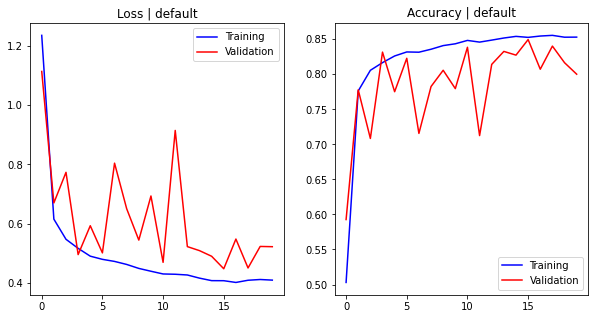

Epoch 0: 2.378090, 0.103860, 2.178584, 0.101900
Epoch 1: 1.024341, 0.597620, 0.878596, 0.669100
Epoch 2: 0.585435, 0.783120, 0.699223, 0.781300
Epoch 3: 0.524358, 0.813640, 0.737379, 0.703800
Epoch 4: 0.496008, 0.823980, 0.558780, 0.789400
Epoch 5: 0.491975, 0.828300, 0.538845, 0.812800
Epoch 6: 0.477029, 0.831100, 0.536161, 0.808000
Epoch 7: 0.469932, 0.837000, 0.513880, 0.807600
Epoch 8: 0.456206, 0.840700, 0.474975, 0.836400
Epoch 9: 0.452211, 0.840180, 0.507919, 0.808300
Epoch 10: 0.448105, 0.841600, 0.525326, 0.826600
Epoch 11: 0.440626, 0.845700, 0.640612, 0.787300
Epoch 12: 0.439993, 0.844700, 0.477592, 0.836500
Epoch 13: 0.439088, 0.845000, 0.823580, 0.721800
Epoch 14: 0.442547, 0.845500, 0.508973, 0.825200
Epoch 15: 0.430555, 0.848460, 0.537617, 0.822100
Epoch 16: 0.435428, 0.845160, 0.460760, 0.838900
Epoch 17: 0.432116, 0.847080, 0.527276, 0.824700
Epoch 18: 0.429250, 0.848920, 0.491963, 0.822600
Epoch 19: 0.420312, 0.851060, 0.516387, 0.828300


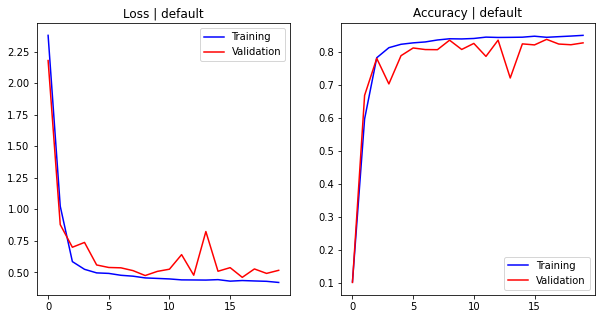

Epoch 0: 1.392363, 0.445620, 0.721616, 0.731300
Epoch 1: 0.658324, 0.762660, 0.809109, 0.692500
Epoch 2: 0.565658, 0.804220, 0.738909, 0.761600
Epoch 3: 0.548099, 0.808940, 0.575366, 0.798900
Epoch 4: 0.526400, 0.816640, 0.671833, 0.773100
Epoch 5: 0.514070, 0.819980, 0.516705, 0.821600
Epoch 6: 0.503424, 0.823320, 0.581466, 0.799000
Epoch 7: 0.500688, 0.825120, 0.662445, 0.784600
Epoch 8: 0.500664, 0.825100, 0.517527, 0.822900
Epoch 9: 0.490813, 0.830120, 0.578983, 0.804000
Epoch 10: 0.491464, 0.828880, 0.578742, 0.793600
Epoch 11: 0.481786, 0.831760, 0.790618, 0.731800
Epoch 12: 0.484153, 0.830060, 0.572231, 0.803100
Epoch 13: 0.476061, 0.835400, 0.548414, 0.823000
Epoch 14: 0.475681, 0.834120, 0.648004, 0.784000
Epoch 15: 0.478472, 0.833940, 0.601756, 0.787600
Epoch 16: 0.468961, 0.834780, 0.531452, 0.825400
Epoch 17: 0.469160, 0.833800, 0.682016, 0.733000
Epoch 18: 0.459903, 0.837060, 0.595513, 0.807100
Epoch 19: 0.458916, 0.838860, 0.646023, 0.774600


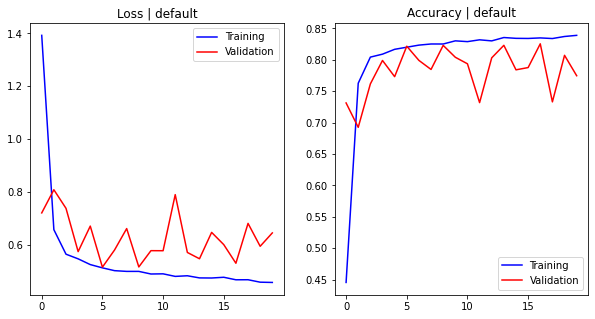

In [23]:
nbatch = 64
nepochs =20

training_loader = DataLoader(training_data, batch_size=nbatch, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=nbatch, shuffle=True)

for lr in np.arange(0.005,0.016,0.001): 
    model = mlp()
    #model.to(cuda0)
    optimizer = torch.optim.RMSprop(model.parameters(),lr=lr, alpha=0.99, centered=False)
    cost_hist, cost_hist_test, acc_hist, acc_hist_test = train_eval(model, optimizer, nepochs, training_loader, validation_loader)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(torch.arange(nepochs), cost_hist,"b-", label="Training")
    plt.plot(torch.arange(nepochs), cost_hist_test,"r-",label="Validation")
    plt.legend()
    plt.title("Loss | Learning Rate - %f"%(lr))

    plt.subplot(1,2,2)
    plt.plot(torch.arange(nepochs), acc_hist,"b-", label="Training")
    plt.plot(torch.arange(nepochs), acc_hist_test,"r-", label="Validation")
    plt.legend()
    plt.title("Accuracy | Learning Rate - %f"%(lr))
    plt.show()

<font style="color:red"> alpha </font>

Epoch 0: 0.562092, 0.790260, 0.435459, 0.839200
Epoch 1: 0.395200, 0.855080, 0.436628, 0.841400
Epoch 2: 0.364789, 0.866400, 0.393765, 0.852400
Epoch 3: 0.345804, 0.874140, 0.419251, 0.858400
Epoch 4: 0.331569, 0.881000, 0.516945, 0.822200
Epoch 5: 0.323644, 0.883140, 0.397827, 0.863100
Epoch 6: 0.314991, 0.885840, 0.386021, 0.871600
Epoch 7: 0.313586, 0.887780, 0.394491, 0.867500
Epoch 8: 0.308796, 0.890260, 0.466658, 0.846700
Epoch 9: 0.305611, 0.891440, 0.394060, 0.875900
Epoch 10: 0.301975, 0.893960, 0.404069, 0.869600
Epoch 11: 0.298284, 0.894860, 0.397538, 0.867800
Epoch 12: 0.294262, 0.897020, 0.401345, 0.875300
Epoch 13: 0.286768, 0.897800, 0.432631, 0.873800
Epoch 14: 0.286817, 0.897600, 0.437658, 0.872400
Epoch 15: 0.286067, 0.900640, 0.451804, 0.857800
Epoch 16: 0.285839, 0.899440, 0.420803, 0.877000
Epoch 17: 0.283791, 0.900620, 0.400038, 0.879600
Epoch 18: 0.282524, 0.901920, 0.432025, 0.875300
Epoch 19: 0.277951, 0.902800, 0.454769, 0.869100


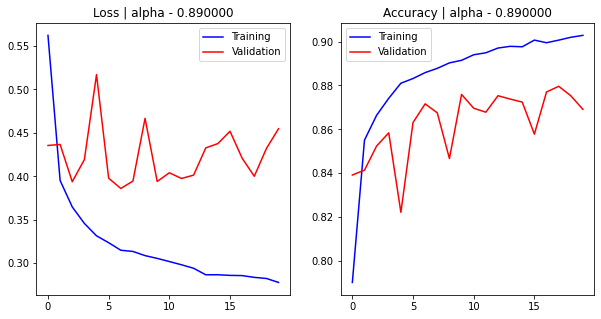

Epoch 0: 0.573640, 0.785920, 0.528105, 0.812800
Epoch 1: 0.396278, 0.854100, 0.734289, 0.747700
Epoch 2: 0.362350, 0.867940, 0.416232, 0.847200
Epoch 3: 0.344738, 0.873960, 0.552371, 0.801400
Epoch 4: 0.331780, 0.880180, 0.414688, 0.860900
Epoch 5: 0.320174, 0.883760, 0.395164, 0.866300
Epoch 6: 0.316367, 0.887380, 0.374438, 0.873500
Epoch 7: 0.309026, 0.888620, 0.407678, 0.866900
Epoch 8: 0.303876, 0.890240, 0.482078, 0.845800
Epoch 9: 0.302483, 0.891980, 0.428970, 0.859700
Epoch 10: 0.299401, 0.893060, 0.456951, 0.851600
Epoch 11: 0.294126, 0.895200, 0.466635, 0.862000
Epoch 12: 0.288977, 0.899180, 0.426460, 0.862800
Epoch 13: 0.287242, 0.898160, 0.463668, 0.853200
Epoch 14: 0.285978, 0.899260, 0.444847, 0.862700
Epoch 15: 0.280316, 0.899120, 0.413664, 0.872100
Epoch 16: 0.281409, 0.900480, 0.428238, 0.869400
Epoch 17: 0.285959, 0.899720, 0.470829, 0.863500
Epoch 18: 0.284491, 0.900220, 0.446013, 0.870200
Epoch 19: 0.277173, 0.902020, 0.450228, 0.863800


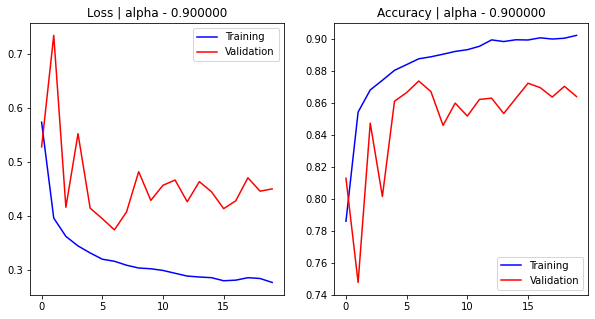

Epoch 0: 0.567573, 0.789300, 0.440054, 0.838500
Epoch 1: 0.396303, 0.853580, 0.462242, 0.841000
Epoch 2: 0.360846, 0.868160, 0.422975, 0.847800
Epoch 3: 0.342908, 0.875800, 0.411388, 0.852700
Epoch 4: 0.326764, 0.881340, 0.393333, 0.861600
Epoch 5: 0.318336, 0.883500, 0.465400, 0.833400
Epoch 6: 0.312527, 0.886260, 0.382702, 0.868800
Epoch 7: 0.304477, 0.889720, 0.377509, 0.874300
Epoch 8: 0.299428, 0.892360, 0.381160, 0.876700
Epoch 9: 0.291763, 0.894860, 0.397519, 0.870300
Epoch 10: 0.291594, 0.894900, 0.382386, 0.876500
Epoch 11: 0.287927, 0.896480, 0.384803, 0.878200
Epoch 12: 0.285397, 0.896840, 0.420041, 0.865600
Epoch 13: 0.287205, 0.898500, 0.408226, 0.872200
Epoch 14: 0.279891, 0.901000, 0.420796, 0.869700
Epoch 15: 0.273038, 0.901900, 0.429787, 0.877900
Epoch 16: 0.273877, 0.902860, 0.431012, 0.876500
Epoch 17: 0.273693, 0.902580, 0.446504, 0.867100
Epoch 18: 0.275756, 0.903900, 0.449953, 0.870200
Epoch 19: 0.275364, 0.903580, 0.417831, 0.875200


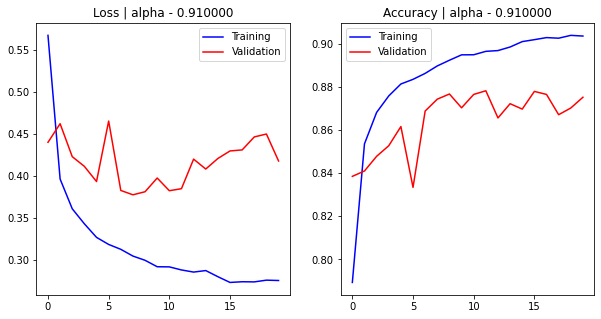

Epoch 0: 0.563576, 0.788900, 0.494364, 0.807000
Epoch 1: 0.396787, 0.854460, 0.490779, 0.819900
Epoch 2: 0.360369, 0.867020, 0.453555, 0.836600
Epoch 3: 0.340521, 0.875220, 0.410015, 0.853400
Epoch 4: 0.330377, 0.880480, 0.394700, 0.862900
Epoch 5: 0.320878, 0.882740, 0.393593, 0.855200
Epoch 6: 0.312033, 0.886200, 0.432051, 0.855000
Epoch 7: 0.306120, 0.890340, 0.377860, 0.876200
Epoch 8: 0.303223, 0.890040, 0.378070, 0.868900
Epoch 9: 0.298925, 0.892680, 0.406592, 0.870000
Epoch 10: 0.297707, 0.894020, 0.421788, 0.875900
Epoch 11: 0.292447, 0.895660, 0.448882, 0.844300
Epoch 12: 0.288181, 0.895480, 0.409288, 0.870800
Epoch 13: 0.284089, 0.898380, 0.401582, 0.868600
Epoch 14: 0.283173, 0.898120, 0.377843, 0.875300
Epoch 15: 0.279258, 0.900260, 0.412927, 0.870600
Epoch 16: 0.276452, 0.902020, 0.441684, 0.862400
Epoch 17: 0.271399, 0.902860, 0.411059, 0.874600
Epoch 18: 0.274514, 0.901520, 0.400870, 0.873500
Epoch 19: 0.274154, 0.903920, 0.429010, 0.871700


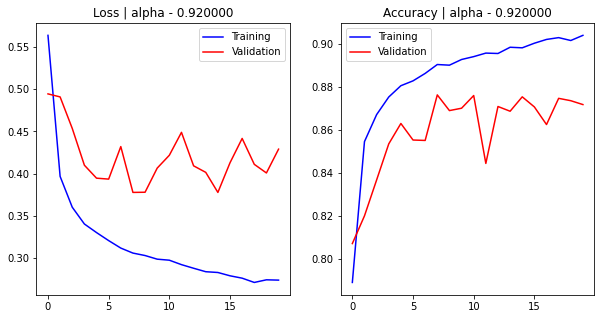

Epoch 0: 0.562939, 0.790760, 0.424328, 0.846400
Epoch 1: 0.392415, 0.853880, 0.420243, 0.845200
Epoch 2: 0.358089, 0.868660, 0.404830, 0.851400
Epoch 3: 0.337075, 0.874900, 0.386534, 0.863600
Epoch 4: 0.323607, 0.880580, 0.398935, 0.851500
Epoch 5: 0.315936, 0.883680, 0.459409, 0.851300
Epoch 6: 0.305578, 0.887920, 0.416921, 0.853400
Epoch 7: 0.297587, 0.889800, 0.401180, 0.866600
Epoch 8: 0.288276, 0.893540, 0.362014, 0.879900
Epoch 9: 0.289139, 0.894220, 0.409913, 0.861800
Epoch 10: 0.282661, 0.895960, 0.476094, 0.847800
Epoch 11: 0.281710, 0.897900, 0.435185, 0.865300
Epoch 12: 0.279554, 0.898020, 0.406506, 0.865700
Epoch 13: 0.276606, 0.900360, 0.386536, 0.876500
Epoch 14: 0.274572, 0.900660, 0.386580, 0.874100
Epoch 15: 0.271227, 0.901640, 0.407588, 0.869800
Epoch 16: 0.269651, 0.902440, 0.398312, 0.872900
Epoch 17: 0.264888, 0.904780, 0.401421, 0.876000
Epoch 18: 0.267397, 0.903520, 0.439765, 0.866100
Epoch 19: 0.262792, 0.904460, 0.445565, 0.872300


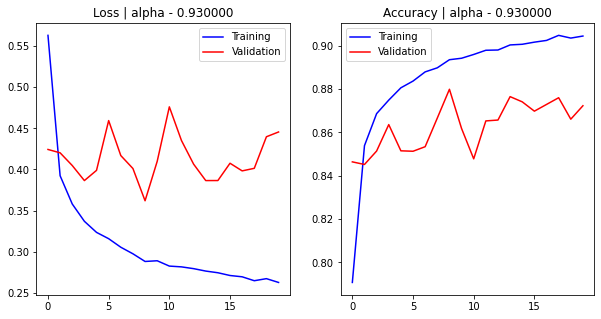

Epoch 0: 0.561979, 0.791180, 0.528709, 0.809000
Epoch 1: 0.394973, 0.854340, 0.459685, 0.820500
Epoch 2: 0.359829, 0.867240, 0.537342, 0.807100
Epoch 3: 0.341287, 0.875140, 0.375916, 0.867000
Epoch 4: 0.327749, 0.879820, 0.422518, 0.849600
Epoch 5: 0.318280, 0.883600, 0.394706, 0.861800
Epoch 6: 0.309656, 0.886520, 0.406134, 0.859700
Epoch 7: 0.304168, 0.888460, 0.388681, 0.866700
Epoch 8: 0.298544, 0.890600, 0.415612, 0.851000
Epoch 9: 0.295492, 0.891560, 0.409157, 0.865400
Epoch 10: 0.293792, 0.892880, 0.370354, 0.873100
Epoch 11: 0.290595, 0.893060, 0.379308, 0.872500
Epoch 12: 0.286914, 0.895720, 0.422243, 0.865700
Epoch 13: 0.283824, 0.895700, 0.382081, 0.877300
Epoch 14: 0.280468, 0.897640, 0.434642, 0.861400
Epoch 15: 0.280254, 0.898440, 0.379971, 0.875500
Epoch 16: 0.274147, 0.900000, 0.444551, 0.860800
Epoch 17: 0.273049, 0.900960, 0.439661, 0.855700
Epoch 18: 0.271883, 0.902120, 0.415000, 0.871000
Epoch 19: 0.270210, 0.902540, 0.408883, 0.869000


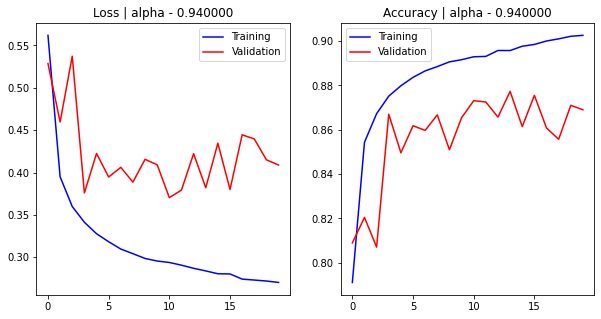

Epoch 0: 0.570829, 0.788700, 0.617647, 0.762500
Epoch 1: 0.398416, 0.853480, 0.441197, 0.846000
Epoch 2: 0.360095, 0.867760, 0.412824, 0.851000
Epoch 3: 0.340845, 0.875480, 0.388651, 0.862900
Epoch 4: 0.328661, 0.879260, 0.411299, 0.857900
Epoch 5: 0.317688, 0.884320, 0.464419, 0.832400
Epoch 6: 0.308832, 0.885260, 0.430145, 0.852400
Epoch 7: 0.301872, 0.889720, 0.405185, 0.860500
Epoch 8: 0.299199, 0.891380, 0.374473, 0.872000
Epoch 9: 0.292856, 0.891100, 0.367772, 0.880400
Epoch 10: 0.289987, 0.893780, 0.383718, 0.872100
Epoch 11: 0.284631, 0.895660, 0.401115, 0.868500
Epoch 12: 0.279619, 0.897780, 0.373675, 0.875000
Epoch 13: 0.277255, 0.899100, 0.365238, 0.878000
Epoch 14: 0.273966, 0.899520, 0.387213, 0.873300
Epoch 15: 0.273459, 0.900360, 0.389413, 0.877000
Epoch 16: 0.270068, 0.902100, 0.368881, 0.880600
Epoch 17: 0.268856, 0.902560, 0.441603, 0.862800
Epoch 18: 0.265994, 0.904720, 0.384099, 0.873300
Epoch 19: 0.261440, 0.904600, 0.401324, 0.874400


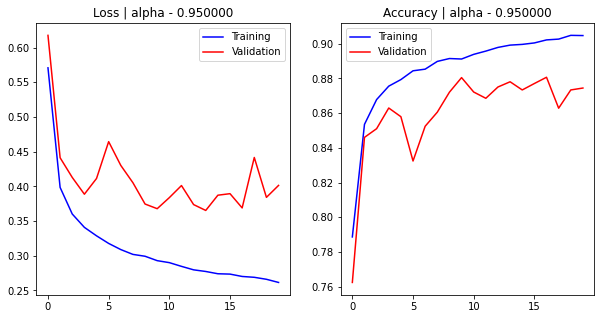

Epoch 0: 0.569003, 0.788260, 0.452867, 0.836800
Epoch 1: 0.393360, 0.854640, 0.515107, 0.814700
Epoch 2: 0.357292, 0.869140, 0.586424, 0.771000
Epoch 3: 0.337501, 0.875320, 0.391387, 0.857100
Epoch 4: 0.323538, 0.881420, 0.394950, 0.859800
Epoch 5: 0.314237, 0.883920, 0.379308, 0.870100
Epoch 6: 0.305929, 0.886400, 0.372560, 0.867000
Epoch 7: 0.297438, 0.890580, 0.380211, 0.874300
Epoch 8: 0.292359, 0.893480, 0.394616, 0.863900
Epoch 9: 0.289946, 0.893420, 0.383512, 0.869100
Epoch 10: 0.286509, 0.894660, 0.400224, 0.873400
Epoch 11: 0.283504, 0.895380, 0.409616, 0.872800
Epoch 12: 0.280602, 0.897620, 0.387975, 0.875400
Epoch 13: 0.277313, 0.898140, 0.378338, 0.875600
Epoch 14: 0.271701, 0.899860, 0.371621, 0.876100
Epoch 15: 0.267455, 0.900880, 0.421795, 0.872600
Epoch 16: 0.267656, 0.902360, 0.396752, 0.878100
Epoch 17: 0.268182, 0.901180, 0.439126, 0.860200
Epoch 18: 0.260754, 0.903080, 0.445207, 0.866300
Epoch 19: 0.261498, 0.904020, 0.408890, 0.872100


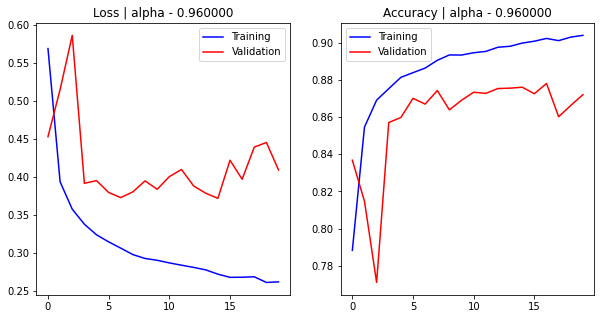

Epoch 0: 0.561634, 0.791600, 0.472433, 0.830800
Epoch 1: 0.392058, 0.853000, 0.481850, 0.823000
Epoch 2: 0.359219, 0.866580, 0.409160, 0.855700
Epoch 3: 0.338934, 0.875420, 0.438164, 0.842700
Epoch 4: 0.324859, 0.879700, 0.507420, 0.820200
Epoch 5: 0.316464, 0.882120, 0.373320, 0.862700
Epoch 6: 0.309762, 0.884800, 0.400078, 0.856300
Epoch 7: 0.301236, 0.889980, 0.376798, 0.865300
Epoch 8: 0.294153, 0.889860, 0.455857, 0.853200
Epoch 9: 0.289751, 0.893180, 0.374024, 0.873700
Epoch 10: 0.284062, 0.895680, 0.397675, 0.862700
Epoch 11: 0.283643, 0.895620, 0.394372, 0.864000
Epoch 12: 0.275363, 0.898380, 0.381787, 0.873200
Epoch 13: 0.272547, 0.900100, 0.426874, 0.845200
Epoch 14: 0.269676, 0.900960, 0.360542, 0.881800
Epoch 15: 0.262506, 0.901840, 0.428112, 0.864700
Epoch 16: 0.268218, 0.901400, 0.420007, 0.860900
Epoch 17: 0.263308, 0.902840, 0.367044, 0.879900
Epoch 18: 0.260778, 0.904180, 0.387596, 0.872400
Epoch 19: 0.255535, 0.906040, 0.405117, 0.871200


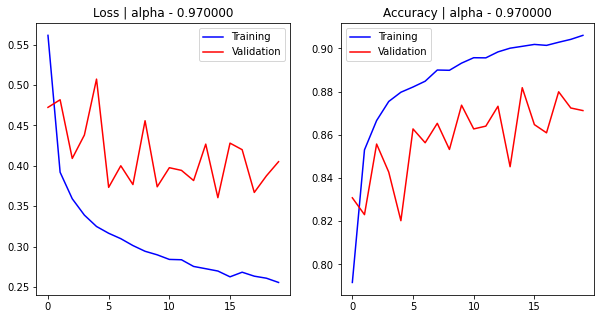

Epoch 0: 0.563305, 0.790180, 0.505256, 0.809300
Epoch 1: 0.395392, 0.855340, 0.451844, 0.824000
Epoch 2: 0.360281, 0.866840, 0.436457, 0.832400
Epoch 3: 0.339181, 0.871980, 0.399641, 0.857900
Epoch 4: 0.325350, 0.879820, 0.450350, 0.832300
Epoch 5: 0.315311, 0.883060, 0.374176, 0.866900
Epoch 6: 0.306619, 0.886100, 0.400592, 0.854600
Epoch 7: 0.299409, 0.887740, 0.378802, 0.859600
Epoch 8: 0.293769, 0.890620, 0.404098, 0.848000
Epoch 9: 0.286161, 0.893820, 0.406140, 0.860100
Epoch 10: 0.285562, 0.895300, 0.430155, 0.854900
Epoch 11: 0.285217, 0.893060, 0.453085, 0.832100
Epoch 12: 0.278774, 0.895580, 0.386443, 0.869500
Epoch 13: 0.274227, 0.897520, 0.409111, 0.852900
Epoch 14: 0.273633, 0.897860, 0.353397, 0.877500
Epoch 15: 0.270884, 0.898780, 0.397153, 0.871000
Epoch 16: 0.271056, 0.899880, 0.373572, 0.877300
Epoch 17: 0.270700, 0.899580, 0.380301, 0.870000
Epoch 18: 0.272919, 0.898480, 0.394655, 0.864900
Epoch 19: 0.264040, 0.901560, 0.397702, 0.869700


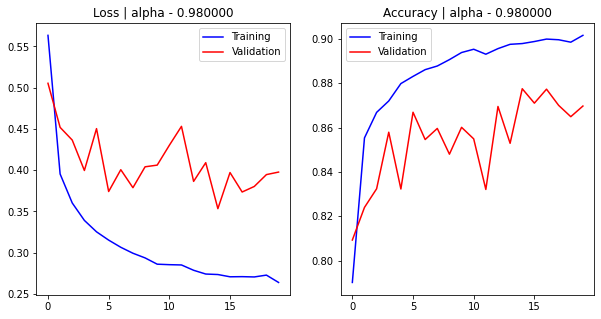

Epoch 0: 0.618283, 0.769740, 0.506613, 0.808300
Epoch 1: 0.401865, 0.851400, 0.485602, 0.820900
Epoch 2: 0.363997, 0.865860, 0.590375, 0.794500
Epoch 3: 0.343790, 0.872880, 0.460167, 0.831600
Epoch 4: 0.328711, 0.878600, 0.376239, 0.861000
Epoch 5: 0.320457, 0.881080, 0.367463, 0.867100
Epoch 6: 0.311178, 0.885440, 0.418880, 0.851600
Epoch 7: 0.306227, 0.884940, 0.376746, 0.865900
Epoch 8: 0.297264, 0.888340, 0.429481, 0.848000
Epoch 9: 0.290219, 0.892720, 0.385881, 0.859800
Epoch 10: 0.287052, 0.893960, 0.416762, 0.859400
Epoch 11: 0.285271, 0.893180, 0.384098, 0.861400
Epoch 12: 0.282384, 0.894600, 0.417333, 0.859100
Epoch 13: 0.280822, 0.894120, 0.402293, 0.867500
Epoch 14: 0.274286, 0.897880, 0.430704, 0.847500
Epoch 15: 0.268352, 0.899560, 0.361607, 0.873100
Epoch 16: 0.270734, 0.898020, 0.384712, 0.866600
Epoch 17: 0.263777, 0.900560, 0.377360, 0.868200
Epoch 18: 0.260111, 0.902760, 0.406746, 0.862000
Epoch 19: 0.257075, 0.904400, 0.377267, 0.870500


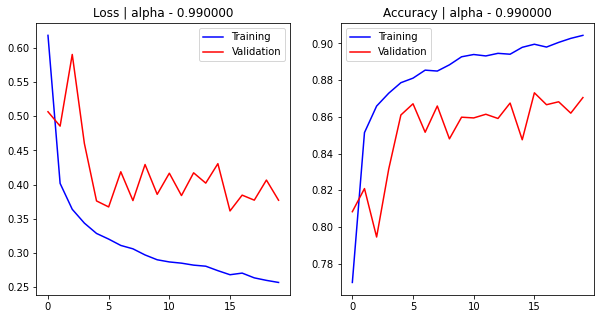

In [28]:
nbatch = 64
nepochs =20

training_loader = DataLoader(training_data, batch_size=nbatch, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=nbatch, shuffle=True)

for alpha in np.arange(0.89,1.0,0.01): 
    model = mlp()
    #model.to(cuda0)
    optimizer = torch.optim.RMSprop(model.parameters(),lr=0.006, alpha=alpha, centered=False)
    cost_hist, cost_hist_test, acc_hist, acc_hist_test = train_eval(model, optimizer, nepochs, training_loader, validation_loader)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(torch.arange(nepochs), cost_hist,"b-", label="Training")
    plt.plot(torch.arange(nepochs), cost_hist_test,"r-",label="Validation")
    plt.legend()
    plt.title("Loss | alpha - %f"%(alpha))

    plt.subplot(1,2,2)
    plt.plot(torch.arange(nepochs), acc_hist,"b-", label="Training")
    plt.plot(torch.arange(nepochs), acc_hist_test,"r-", label="Validation")
    plt.legend()
    plt.title("Accuracy | alpha - %f"%(alpha))
    plt.show()

<font style="color:red">centered=True</font>

Epoch 0: 0.550857, 0.798220, 0.483295, 0.809800
Epoch 1: 0.392001, 0.856880, 0.611359, 0.767700
Epoch 2: 0.357569, 0.868140, 0.458016, 0.825100
Epoch 3: 0.340286, 0.875660, 0.402675, 0.846800
Epoch 4: 0.326543, 0.879580, 0.404726, 0.853500
Epoch 5: 0.319120, 0.882980, 0.359573, 0.864400
Epoch 6: 0.311099, 0.886200, 0.489581, 0.826500
Epoch 7: 0.305430, 0.888640, 0.389215, 0.861900
Epoch 8: 0.298099, 0.890360, 0.399187, 0.855400
Epoch 9: 0.294745, 0.891600, 0.381797, 0.867700
Epoch 10: 0.290915, 0.893980, 0.443884, 0.852400
Epoch 11: 0.285548, 0.894660, 0.403257, 0.864700
Epoch 12: 0.284882, 0.895900, 0.434935, 0.856000
Epoch 13: 0.281481, 0.897380, 0.397370, 0.867100
Epoch 14: 0.280907, 0.899260, 0.403507, 0.862700
Epoch 15: 0.278332, 0.898780, 0.383676, 0.877100
Epoch 16: 0.277116, 0.900480, 0.406049, 0.874100
Epoch 17: 0.275092, 0.900060, 0.496177, 0.838700
Epoch 18: 0.272138, 0.902080, 0.412164, 0.866800
Epoch 19: 0.275111, 0.899960, 0.435629, 0.865000


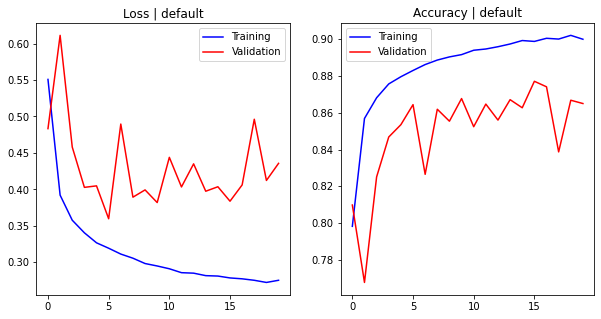

In [29]:
nbatch = 64
nepochs =20

training_loader = DataLoader(training_data, batch_size=nbatch, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=nbatch, shuffle=True)
    
model = mlp()
#model.to(cuda0)
optimizer = torch.optim.RMSprop(model.parameters(),lr=0.006, alpha=0.95, centered=True)
cost_hist, cost_hist_test, acc_hist, acc_hist_test = train_eval(model, optimizer, nepochs, training_loader, validation_loader)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(torch.arange(nepochs), cost_hist,"b-", label="Training")
plt.plot(torch.arange(nepochs), cost_hist_test,"r-",label="Validation")
plt.legend()
plt.title("Loss | centered")

plt.subplot(1,2,2)
plt.plot(torch.arange(nepochs), acc_hist,"b-", label="Training")
plt.plot(torch.arange(nepochs), acc_hist_test,"r-", label="Validation")
plt.legend()
plt.title("Accuracy | centered")
plt.show()

<font style="color:red">I think we see a little difference it smoothes a little bit... </br> **Choice: **LR = 0.006, $\alpha$ = 0.95 and centered= True**


4. Adam: Same thing now for Adam. Play with different settings. Start with the default settings of pytorch. What is your recommended best choice for the given problem?



Epoch 0: 0.787843, 0.739320, 0.484502, 0.825600
Epoch 1: 0.422011, 0.849860, 0.414475, 0.853000
Epoch 2: 0.368281, 0.866320, 0.381266, 0.861700
Epoch 3: 0.341289, 0.876600, 0.377427, 0.865300
Epoch 4: 0.324727, 0.882280, 0.361249, 0.868500
Epoch 5: 0.310765, 0.887180, 0.346630, 0.871400
Epoch 6: 0.295134, 0.892460, 0.346514, 0.873200
Epoch 7: 0.282396, 0.897760, 0.340462, 0.874000
Epoch 8: 0.272353, 0.900540, 0.334666, 0.880700
Epoch 9: 0.262861, 0.903320, 0.329525, 0.881100
Epoch 10: 0.254411, 0.906740, 0.334522, 0.878600
Epoch 11: 0.243855, 0.910400, 0.326412, 0.884400
Epoch 12: 0.237217, 0.912600, 0.323308, 0.884400
Epoch 13: 0.227436, 0.916040, 0.326781, 0.882300
Epoch 14: 0.219264, 0.919600, 0.320842, 0.885000
Epoch 15: 0.212523, 0.921000, 0.308660, 0.892200
Epoch 16: 0.206914, 0.924400, 0.312374, 0.889400
Epoch 17: 0.199499, 0.925220, 0.319403, 0.888500
Epoch 18: 0.194800, 0.927660, 0.327715, 0.884400
Epoch 19: 0.186791, 0.929940, 0.300883, 0.895800


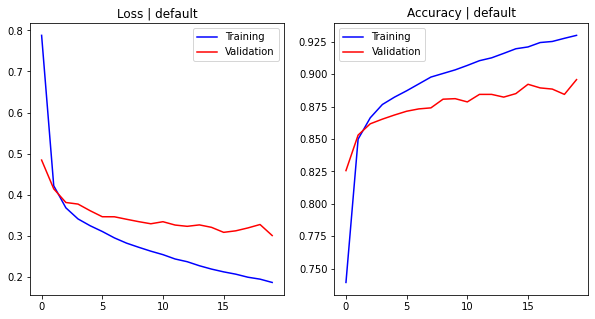

In [36]:
nbatch = 64
nepochs =20

training_loader = DataLoader(training_data, batch_size=nbatch, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=nbatch, shuffle=True)
    
model = mlp()
#model.to(cuda0)
optimizer = torch.optim.Adam(model.parameters(),lr=0.001, betas= (0.9, 0.999),eps=1e-8,weight_decay=0, amsgrad=False)
cost_hist, cost_hist_test, acc_hist, acc_hist_test = train_eval(model, optimizer, nepochs, training_loader, validation_loader)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(torch.arange(nepochs), cost_hist,"b-", label="Training")
plt.plot(torch.arange(nepochs), cost_hist_test,"r-",label="Validation")
plt.legend()
plt.title("Loss | default")

plt.subplot(1,2,2)
plt.plot(torch.arange(nepochs), acc_hist,"b-", label="Training")
plt.plot(torch.arange(nepochs), acc_hist_test,"r-", label="Validation")
plt.legend()
plt.title("Accuracy | default")
plt.show()

<font style="color:red">Learning Rate</font>

Epoch 0: 1.021254, 0.669100, 0.600078, 0.800700
Epoch 1: 0.499799, 0.828560, 0.469746, 0.832000
Epoch 2: 0.417029, 0.850940, 0.417550, 0.850000
Epoch 3: 0.381368, 0.862660, 0.397363, 0.857300
Epoch 4: 0.356587, 0.872400, 0.380595, 0.861600
Epoch 5: 0.340840, 0.876200, 0.371369, 0.866800
Epoch 6: 0.327292, 0.881760, 0.366174, 0.862700
Epoch 7: 0.315142, 0.885960, 0.358514, 0.868700
Epoch 8: 0.304661, 0.890320, 0.350963, 0.870700
Epoch 9: 0.296277, 0.893640, 0.350427, 0.869400
Epoch 10: 0.288069, 0.895160, 0.342325, 0.875400
Epoch 11: 0.279768, 0.899240, 0.343403, 0.874400
Epoch 12: 0.273489, 0.900720, 0.333752, 0.876600
Epoch 13: 0.265946, 0.902920, 0.332312, 0.876900
Epoch 14: 0.260439, 0.905780, 0.327338, 0.880800
Epoch 15: 0.254556, 0.907100, 0.326426, 0.877100
Epoch 16: 0.247831, 0.909500, 0.328000, 0.884200
Epoch 17: 0.244313, 0.910320, 0.318268, 0.884100
Epoch 18: 0.237372, 0.912940, 0.321210, 0.882900
Epoch 19: 0.231948, 0.915140, 0.316932, 0.882400


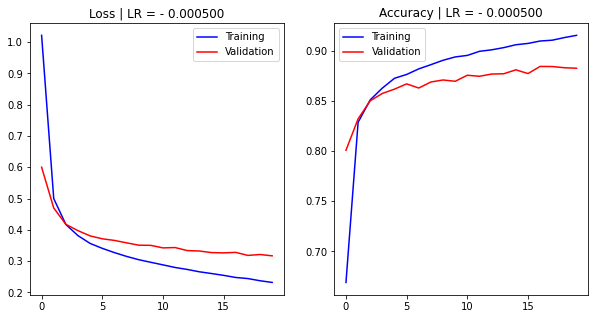

Epoch 0: 0.953848, 0.690820, 0.553194, 0.804700
Epoch 1: 0.467613, 0.836620, 0.443992, 0.840200
Epoch 2: 0.401833, 0.857640, 0.406488, 0.855300
Epoch 3: 0.369619, 0.868140, 0.385981, 0.861300
Epoch 4: 0.350524, 0.875040, 0.378146, 0.865100
Epoch 5: 0.333367, 0.879880, 0.378243, 0.865300
Epoch 6: 0.320008, 0.884340, 0.362166, 0.867300
Epoch 7: 0.308150, 0.888740, 0.353158, 0.869800
Epoch 8: 0.299060, 0.892120, 0.363506, 0.865800
Epoch 9: 0.290254, 0.894120, 0.342453, 0.878400
Epoch 10: 0.281303, 0.897920, 0.344493, 0.875800
Epoch 11: 0.273439, 0.900140, 0.336472, 0.877200
Epoch 12: 0.265953, 0.903460, 0.331623, 0.882800
Epoch 13: 0.259878, 0.904680, 0.340315, 0.877700
Epoch 14: 0.252393, 0.908640, 0.330183, 0.881700
Epoch 15: 0.246596, 0.909140, 0.328182, 0.880700
Epoch 16: 0.240056, 0.912080, 0.320034, 0.883400
Epoch 17: 0.233672, 0.914340, 0.328700, 0.884500
Epoch 18: 0.227782, 0.915700, 0.317043, 0.888200
Epoch 19: 0.222384, 0.918400, 0.329861, 0.882400


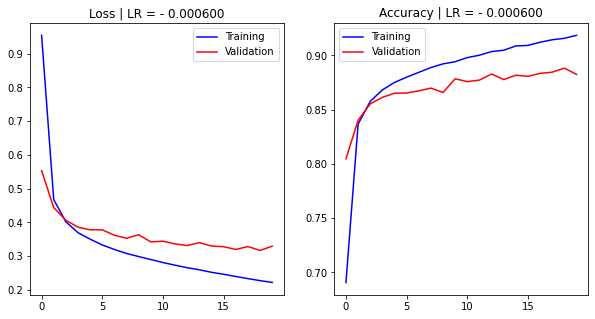

Epoch 0: 0.898469, 0.700300, 0.536138, 0.807200
Epoch 1: 0.450345, 0.843220, 0.431552, 0.846300
Epoch 2: 0.389065, 0.861060, 0.403154, 0.854000
Epoch 3: 0.357960, 0.871760, 0.383783, 0.859500
Epoch 4: 0.338089, 0.877440, 0.370497, 0.867800
Epoch 5: 0.320210, 0.883500, 0.357220, 0.871400
Epoch 6: 0.309182, 0.887620, 0.360815, 0.868000
Epoch 7: 0.297525, 0.892260, 0.358900, 0.866100
Epoch 8: 0.288036, 0.895340, 0.340138, 0.873200
Epoch 9: 0.277298, 0.899120, 0.334983, 0.880300
Epoch 10: 0.270892, 0.901260, 0.341278, 0.878600
Epoch 11: 0.262117, 0.904640, 0.329598, 0.878300
Epoch 12: 0.254174, 0.906340, 0.323131, 0.881500
Epoch 13: 0.247329, 0.909040, 0.328505, 0.879900
Epoch 14: 0.240046, 0.911380, 0.318219, 0.883000
Epoch 15: 0.231490, 0.913720, 0.320308, 0.883600
Epoch 16: 0.225963, 0.916880, 0.319856, 0.885400
Epoch 17: 0.221987, 0.918340, 0.324386, 0.886300
Epoch 18: 0.213887, 0.921120, 0.313905, 0.887100
Epoch 19: 0.209917, 0.922560, 0.316153, 0.885700


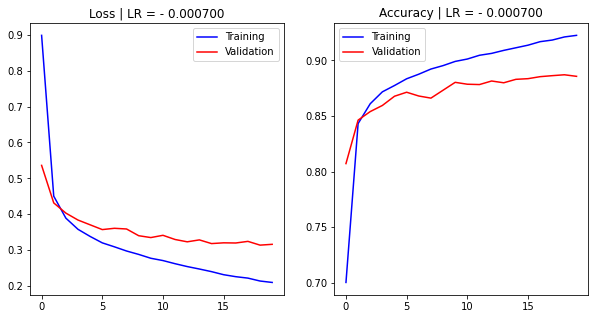

Epoch 0: 0.830828, 0.728780, 0.486786, 0.832300
Epoch 1: 0.436339, 0.844100, 0.425984, 0.845500
Epoch 2: 0.381629, 0.863180, 0.389527, 0.858500
Epoch 3: 0.352816, 0.872820, 0.370086, 0.864900
Epoch 4: 0.333719, 0.880340, 0.363990, 0.867700
Epoch 5: 0.318432, 0.885520, 0.354912, 0.871300
Epoch 6: 0.304600, 0.889480, 0.353221, 0.871900
Epoch 7: 0.293519, 0.893600, 0.355695, 0.869500
Epoch 8: 0.284241, 0.895580, 0.342893, 0.876600
Epoch 9: 0.274349, 0.899480, 0.328432, 0.881200
Epoch 10: 0.266390, 0.902260, 0.326925, 0.884400
Epoch 11: 0.258078, 0.905560, 0.322709, 0.882500
Epoch 12: 0.249667, 0.907940, 0.336027, 0.878000
Epoch 13: 0.243807, 0.910600, 0.313960, 0.888700
Epoch 14: 0.236711, 0.913360, 0.311950, 0.886300
Epoch 15: 0.228501, 0.916540, 0.319826, 0.884800
Epoch 16: 0.222403, 0.917780, 0.316132, 0.887300
Epoch 17: 0.214993, 0.921440, 0.321658, 0.885200
Epoch 18: 0.209835, 0.923500, 0.317832, 0.889800
Epoch 19: 0.204639, 0.925220, 0.312271, 0.887100


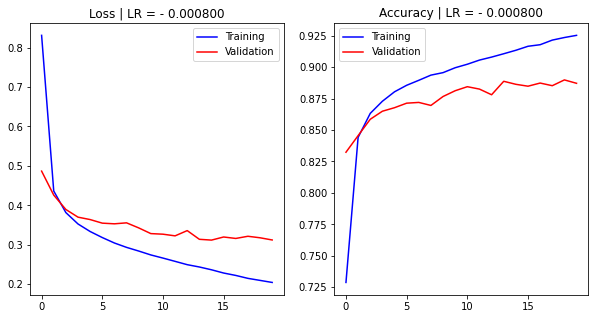

Epoch 0: 0.819440, 0.723320, 0.493968, 0.823100
Epoch 1: 0.430500, 0.846640, 0.435809, 0.841800
Epoch 2: 0.376079, 0.864760, 0.386249, 0.861700
Epoch 3: 0.344889, 0.874860, 0.379740, 0.860300
Epoch 4: 0.326536, 0.882000, 0.362937, 0.867600
Epoch 5: 0.311684, 0.887200, 0.346541, 0.872200
Epoch 6: 0.298345, 0.892100, 0.349982, 0.872800
Epoch 7: 0.287003, 0.895140, 0.335685, 0.880600
Epoch 8: 0.277230, 0.897600, 0.329528, 0.880000
Epoch 9: 0.267548, 0.902200, 0.347075, 0.873000
Epoch 10: 0.258252, 0.904740, 0.328336, 0.885500
Epoch 11: 0.247649, 0.908340, 0.326019, 0.879200
Epoch 12: 0.241512, 0.910440, 0.315782, 0.887600
Epoch 13: 0.233975, 0.913780, 0.342955, 0.875900
Epoch 14: 0.226553, 0.916900, 0.323952, 0.881900
Epoch 15: 0.218584, 0.919160, 0.307201, 0.888700
Epoch 16: 0.213347, 0.921120, 0.313696, 0.886500
Epoch 17: 0.205429, 0.924820, 0.314840, 0.889600
Epoch 18: 0.201260, 0.925440, 0.317465, 0.888300
Epoch 19: 0.195121, 0.927960, 0.310532, 0.889800


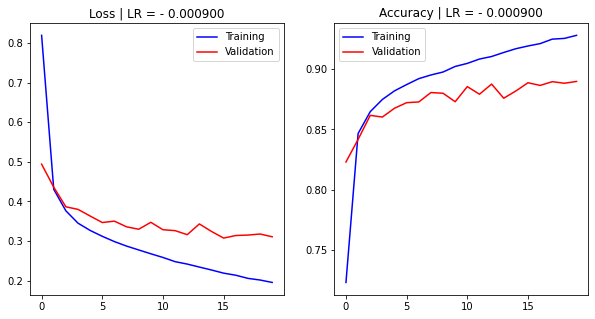

Epoch 0: 0.780279, 0.736040, 0.486359, 0.823100
Epoch 1: 0.421894, 0.848980, 0.405711, 0.853500
Epoch 2: 0.371294, 0.866020, 0.399391, 0.857200
Epoch 3: 0.341910, 0.876460, 0.372605, 0.862000
Epoch 4: 0.323321, 0.882920, 0.368785, 0.866600
Epoch 5: 0.307163, 0.888060, 0.362132, 0.866000
Epoch 6: 0.296223, 0.891700, 0.349751, 0.875200
Epoch 7: 0.281783, 0.896880, 0.329201, 0.880600
Epoch 8: 0.273249, 0.898480, 0.331860, 0.878000
Epoch 9: 0.261600, 0.903820, 0.324818, 0.878100
Epoch 10: 0.254362, 0.906900, 0.320118, 0.884300
Epoch 11: 0.245218, 0.908680, 0.321601, 0.883200
Epoch 12: 0.237770, 0.911760, 0.327598, 0.881300
Epoch 13: 0.229284, 0.914740, 0.317524, 0.886000
Epoch 14: 0.223229, 0.917060, 0.316881, 0.888600
Epoch 15: 0.214243, 0.920920, 0.332525, 0.880400
Epoch 16: 0.207914, 0.923780, 0.308453, 0.890000
Epoch 17: 0.202226, 0.924680, 0.327258, 0.890300
Epoch 18: 0.195645, 0.927260, 0.317224, 0.889100
Epoch 19: 0.190861, 0.928840, 0.313954, 0.889300


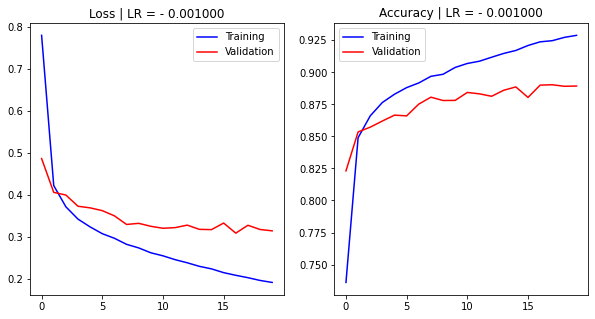

Epoch 0: 0.754641, 0.746000, 0.464437, 0.834600
Epoch 1: 0.411482, 0.853220, 0.419978, 0.849000
Epoch 2: 0.365153, 0.869380, 0.375475, 0.864100
Epoch 3: 0.339123, 0.877720, 0.372296, 0.862800
Epoch 4: 0.316740, 0.886260, 0.376629, 0.864400
Epoch 5: 0.303840, 0.888640, 0.356296, 0.867400
Epoch 6: 0.289432, 0.894260, 0.347142, 0.871300
Epoch 7: 0.276657, 0.898800, 0.337529, 0.875400
Epoch 8: 0.266767, 0.900940, 0.332528, 0.879500
Epoch 9: 0.257647, 0.905300, 0.338243, 0.880000
Epoch 10: 0.247528, 0.908920, 0.321342, 0.881400
Epoch 11: 0.236899, 0.912500, 0.317458, 0.886900
Epoch 12: 0.232623, 0.913800, 0.322461, 0.885700
Epoch 13: 0.220251, 0.919400, 0.331020, 0.881600
Epoch 14: 0.215698, 0.919660, 0.322130, 0.884200
Epoch 15: 0.207197, 0.923440, 0.309426, 0.889600
Epoch 16: 0.199993, 0.925540, 0.308009, 0.891000
Epoch 17: 0.195360, 0.928040, 0.325838, 0.885100
Epoch 18: 0.186507, 0.930940, 0.315827, 0.889700
Epoch 19: 0.182229, 0.933340, 0.352587, 0.881800


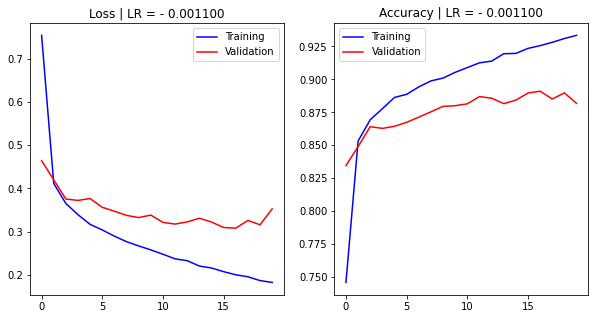

Epoch 0: 0.742951, 0.744480, 0.462459, 0.833600
Epoch 1: 0.409679, 0.854280, 0.414830, 0.849000
Epoch 2: 0.360495, 0.870000, 0.405189, 0.853700
Epoch 3: 0.334750, 0.878880, 0.362539, 0.865500
Epoch 4: 0.315264, 0.885880, 0.352406, 0.870000
Epoch 5: 0.298031, 0.891480, 0.342968, 0.875500
Epoch 6: 0.284079, 0.896000, 0.335662, 0.877400
Epoch 7: 0.274253, 0.900200, 0.335724, 0.877100
Epoch 8: 0.263993, 0.902320, 0.337160, 0.876600
Epoch 9: 0.252456, 0.907760, 0.330521, 0.877500
Epoch 10: 0.243787, 0.909100, 0.329232, 0.880700
Epoch 11: 0.235872, 0.912580, 0.332857, 0.880300
Epoch 12: 0.226107, 0.916400, 0.328168, 0.881500
Epoch 13: 0.219684, 0.918900, 0.339974, 0.883400
Epoch 14: 0.209095, 0.922920, 0.311933, 0.891500
Epoch 15: 0.202828, 0.924580, 0.314028, 0.885900
Epoch 16: 0.198073, 0.925440, 0.315567, 0.887000
Epoch 17: 0.190017, 0.929400, 0.313301, 0.885600
Epoch 18: 0.183050, 0.932600, 0.309517, 0.890700
Epoch 19: 0.178540, 0.934140, 0.317206, 0.892000


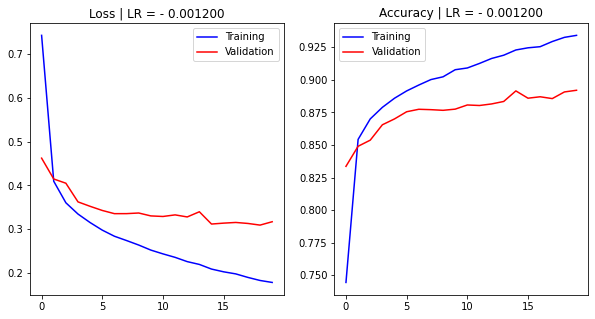

Epoch 0: 0.721256, 0.749560, 0.464527, 0.829900
Epoch 1: 0.404511, 0.854040, 0.399329, 0.855300
Epoch 2: 0.358071, 0.870640, 0.374974, 0.862300
Epoch 3: 0.331518, 0.880180, 0.355019, 0.871500
Epoch 4: 0.315166, 0.884460, 0.350827, 0.873600
Epoch 5: 0.296490, 0.891680, 0.342434, 0.873000
Epoch 6: 0.284287, 0.895800, 0.360689, 0.870700
Epoch 7: 0.273420, 0.899780, 0.351922, 0.872400
Epoch 8: 0.264567, 0.901720, 0.326991, 0.880600
Epoch 9: 0.253346, 0.906340, 0.354946, 0.874900
Epoch 10: 0.243463, 0.910600, 0.329546, 0.880600
Epoch 11: 0.233870, 0.913520, 0.320206, 0.882500
Epoch 12: 0.225684, 0.916160, 0.316983, 0.885600
Epoch 13: 0.214709, 0.920700, 0.316342, 0.889000
Epoch 14: 0.210351, 0.922320, 0.320765, 0.891300
Epoch 15: 0.202672, 0.925340, 0.313872, 0.889400
Epoch 16: 0.196033, 0.928520, 0.309644, 0.891800
Epoch 17: 0.186380, 0.930600, 0.306456, 0.892100
Epoch 18: 0.181923, 0.933560, 0.317384, 0.889700
Epoch 19: 0.176761, 0.934020, 0.314749, 0.891100


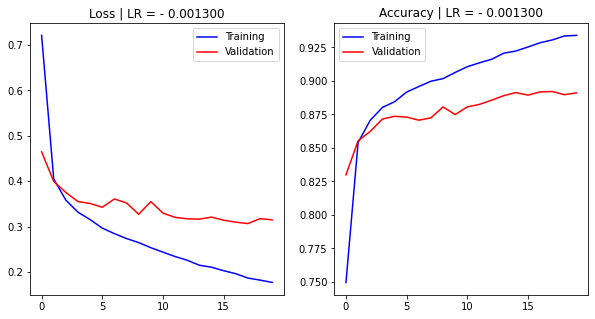

Epoch 0: 0.702054, 0.760360, 0.443231, 0.841500
Epoch 1: 0.404653, 0.853900, 0.403512, 0.856200
Epoch 2: 0.355577, 0.871360, 0.379040, 0.857800
Epoch 3: 0.332394, 0.878580, 0.363105, 0.869800
Epoch 4: 0.312108, 0.886560, 0.364960, 0.868400
Epoch 5: 0.296088, 0.890460, 0.347192, 0.873400
Epoch 6: 0.283616, 0.895380, 0.362649, 0.868000
Epoch 7: 0.272255, 0.900140, 0.332815, 0.880200
Epoch 8: 0.259453, 0.904380, 0.339230, 0.875400
Epoch 9: 0.249966, 0.908760, 0.336311, 0.882600
Epoch 10: 0.239798, 0.911360, 0.317933, 0.885700
Epoch 11: 0.232186, 0.913500, 0.338446, 0.883300
Epoch 12: 0.221750, 0.917120, 0.333289, 0.883600
Epoch 13: 0.214542, 0.920660, 0.318327, 0.884500
Epoch 14: 0.207520, 0.921200, 0.346806, 0.882700
Epoch 15: 0.199346, 0.925860, 0.318153, 0.888500
Epoch 16: 0.192705, 0.928680, 0.336019, 0.883700
Epoch 17: 0.185904, 0.930320, 0.319989, 0.890100
Epoch 18: 0.180374, 0.931840, 0.320766, 0.891100
Epoch 19: 0.172755, 0.935940, 0.325486, 0.894600


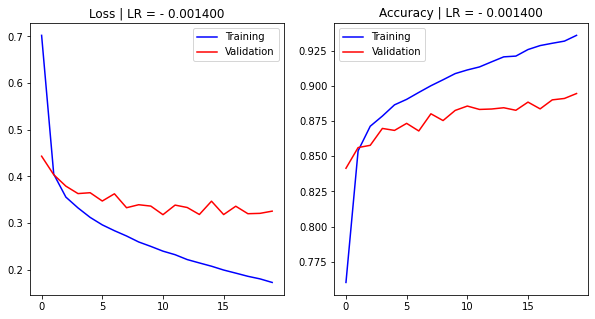

Epoch 0: 0.687525, 0.762880, 0.433806, 0.842000
Epoch 1: 0.393499, 0.858180, 0.393287, 0.857900
Epoch 2: 0.349709, 0.873080, 0.399613, 0.858100
Epoch 3: 0.325600, 0.880400, 0.371966, 0.864300
Epoch 4: 0.305748, 0.887880, 0.347156, 0.872600
Epoch 5: 0.291405, 0.892740, 0.344747, 0.875300
Epoch 6: 0.280056, 0.896820, 0.330993, 0.880000
Epoch 7: 0.265449, 0.901960, 0.335793, 0.880000
Epoch 8: 0.256793, 0.905840, 0.330451, 0.877800
Epoch 9: 0.246673, 0.908060, 0.343338, 0.876300
Epoch 10: 0.237779, 0.911940, 0.339875, 0.881400
Epoch 11: 0.227934, 0.915040, 0.332035, 0.883500
Epoch 12: 0.220970, 0.918260, 0.319271, 0.889200
Epoch 13: 0.212750, 0.919340, 0.337407, 0.884000
Epoch 14: 0.206816, 0.922600, 0.320038, 0.888800
Epoch 15: 0.197453, 0.926220, 0.317560, 0.891000
Epoch 16: 0.192249, 0.926900, 0.335568, 0.886100
Epoch 17: 0.184549, 0.930980, 0.323825, 0.889600
Epoch 18: 0.178530, 0.933020, 0.355492, 0.883200
Epoch 19: 0.173189, 0.935160, 0.345495, 0.885700


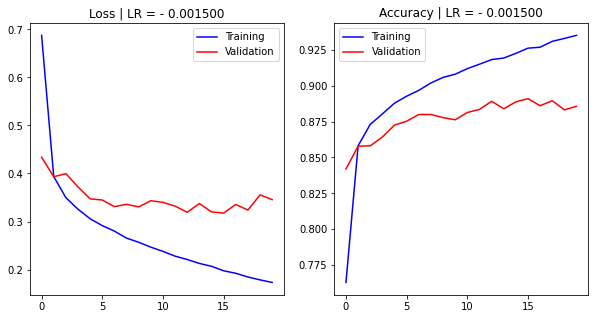

In [38]:
nbatch = 64
nepochs =20

training_loader = DataLoader(training_data, batch_size=nbatch, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=nbatch, shuffle=True)

for lr in np.arange(0.0005,0.0016,0.0001):
    model = mlp()
    #model.to(cuda0)
    optimizer = torch.optim.Adam(model.parameters(),lr=lr, betas= (0.9, 0.999),eps=1e-8,weight_decay=0, amsgrad=False)
    cost_hist, cost_hist_test, acc_hist, acc_hist_test = train_eval(model, optimizer, nepochs, training_loader, validation_loader)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(torch.arange(nepochs), cost_hist,"b-", label="Training")
    plt.plot(torch.arange(nepochs), cost_hist_test,"r-",label="Validation")
    plt.legend()
    plt.title("Loss | LR = - %f"%(lr))

    plt.subplot(1,2,2)
    plt.plot(torch.arange(nepochs), acc_hist,"b-", label="Training")
    plt.plot(torch.arange(nepochs), acc_hist_test,"r-", label="Validation")
    plt.legend()
    plt.title("Accuracy | LR = %f"%(lr))
    plt.show()

Epoch 0: 0.698673, 0.758300, 0.483447, 0.823400
Epoch 1: 0.433812, 0.845480, 0.446234, 0.841600
Epoch 2: 0.399523, 0.858720, 0.436471, 0.845800
Epoch 3: 0.377276, 0.867120, 0.407182, 0.858200
Epoch 4: 0.362382, 0.874900, 0.410455, 0.857400
Epoch 5: 0.355033, 0.875660, 0.431067, 0.852200
Epoch 6: 0.349030, 0.881140, 0.397467, 0.871300
Epoch 7: 0.343050, 0.884080, 0.396737, 0.872900
Epoch 8: 0.339574, 0.884420, 0.395411, 0.870500
Epoch 9: 0.335833, 0.886820, 0.394763, 0.874500
Epoch 10: 0.332886, 0.888360, 0.391723, 0.872200
Epoch 11: 0.331454, 0.889240, 0.426238, 0.874600
Epoch 12: 0.329856, 0.891740, 0.402183, 0.873900
Epoch 13: 0.329145, 0.892900, 0.426580, 0.871200
Epoch 14: 0.327135, 0.893780, 0.452107, 0.866100
Epoch 15: 0.325808, 0.894960, 0.461956, 0.867100
Epoch 16: 0.323628, 0.896360, 0.436156, 0.873900
Epoch 17: 0.324340, 0.897720, 0.417302, 0.878600
Epoch 18: 0.322525, 0.897100, 0.419877, 0.878100
Epoch 19: 0.322091, 0.898980, 0.424848, 0.880300


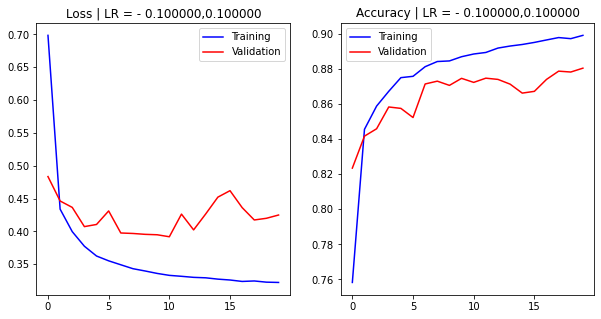

Epoch 0: 0.696885, 0.758620, 0.492717, 0.820500
Epoch 1: 0.433675, 0.844260, 0.430855, 0.848000
Epoch 2: 0.394312, 0.860380, 0.455864, 0.836800
Epoch 3: 0.372795, 0.867840, 0.416365, 0.853000
Epoch 4: 0.358980, 0.873620, 0.426970, 0.856100
Epoch 5: 0.349158, 0.877980, 0.426766, 0.852300
Epoch 6: 0.341449, 0.880740, 0.410677, 0.864500
Epoch 7: 0.334364, 0.884380, 0.405844, 0.868300
Epoch 8: 0.329853, 0.888300, 0.392391, 0.870700
Epoch 9: 0.326786, 0.890060, 0.393155, 0.872800
Epoch 10: 0.320993, 0.890620, 0.408566, 0.871100
Epoch 11: 0.318434, 0.892720, 0.386554, 0.876800
Epoch 12: 0.316195, 0.893800, 0.416929, 0.869400
Epoch 13: 0.311571, 0.894920, 0.391247, 0.876500
Epoch 14: 0.312210, 0.896500, 0.429966, 0.872700
Epoch 15: 0.307706, 0.896440, 0.438922, 0.867400
Epoch 16: 0.308047, 0.898200, 0.439205, 0.872000
Epoch 17: 0.305705, 0.898880, 0.410758, 0.877100
Epoch 18: 0.303896, 0.901660, 0.463904, 0.871900
Epoch 19: 0.302537, 0.902220, 0.423406, 0.872000


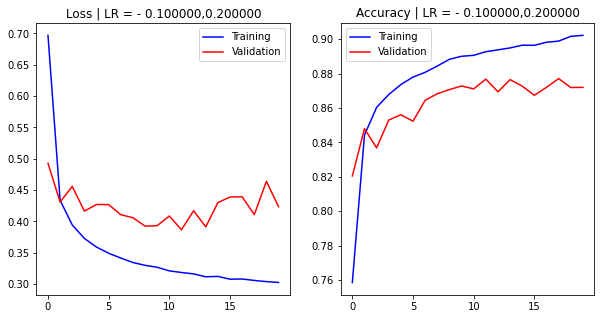

Epoch 0: 0.711317, 0.751160, 0.521931, 0.817600
Epoch 1: 0.433236, 0.844240, 0.438081, 0.846300
Epoch 2: 0.392725, 0.860180, 0.460516, 0.839600
Epoch 3: 0.370838, 0.869160, 0.393614, 0.862000
Epoch 4: 0.351901, 0.874700, 0.410111, 0.860400
Epoch 5: 0.341692, 0.879440, 0.372062, 0.871000
Epoch 6: 0.333087, 0.882700, 0.407364, 0.861700
Epoch 7: 0.324458, 0.885200, 0.422904, 0.860600
Epoch 8: 0.320484, 0.887900, 0.398071, 0.868500
Epoch 9: 0.315293, 0.891240, 0.417495, 0.858500
Epoch 10: 0.310762, 0.893520, 0.389437, 0.873000
Epoch 11: 0.305532, 0.894200, 0.375430, 0.873900
Epoch 12: 0.301555, 0.896160, 0.373446, 0.876300
Epoch 13: 0.297322, 0.897380, 0.382085, 0.877300
Epoch 14: 0.295241, 0.899000, 0.407854, 0.872700
Epoch 15: 0.290261, 0.901800, 0.401323, 0.874100
Epoch 16: 0.286134, 0.901500, 0.410959, 0.874600
Epoch 17: 0.282063, 0.904060, 0.400032, 0.875000
Epoch 18: 0.279627, 0.906440, 0.428984, 0.866600
Epoch 19: 0.278926, 0.905120, 0.405453, 0.872900


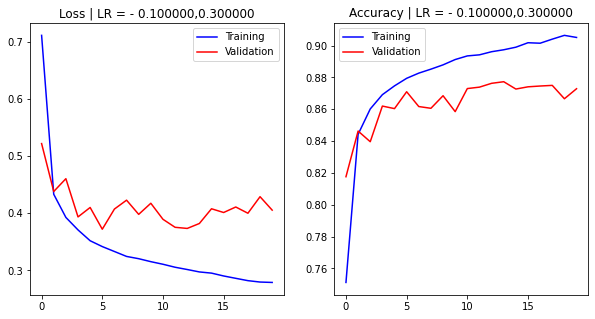

Epoch 0: 0.709567, 0.747900, 0.474567, 0.829700
Epoch 1: 0.424531, 0.846680, 0.458064, 0.838000
Epoch 2: 0.387203, 0.859760, 0.415320, 0.852600
Epoch 3: 0.363934, 0.868220, 0.443458, 0.844000
Epoch 4: 0.348165, 0.877060, 0.395997, 0.861900
Epoch 5: 0.335502, 0.880480, 0.399213, 0.861200
Epoch 6: 0.328062, 0.884440, 0.383628, 0.867600
Epoch 7: 0.318292, 0.887780, 0.374488, 0.867600
Epoch 8: 0.310997, 0.890120, 0.385361, 0.870700
Epoch 9: 0.305533, 0.892200, 0.376000, 0.873900
Epoch 10: 0.301057, 0.896240, 0.388099, 0.868900
Epoch 11: 0.296840, 0.896960, 0.365094, 0.877800
Epoch 12: 0.290814, 0.898940, 0.390302, 0.869700
Epoch 13: 0.288817, 0.899780, 0.352868, 0.881800
Epoch 14: 0.284395, 0.901000, 0.376853, 0.880600
Epoch 15: 0.281316, 0.903820, 0.373250, 0.880800
Epoch 16: 0.277489, 0.904720, 0.394509, 0.875000
Epoch 17: 0.274905, 0.906740, 0.385386, 0.879100
Epoch 18: 0.271359, 0.907300, 0.425539, 0.867400
Epoch 19: 0.267091, 0.909580, 0.380484, 0.877100


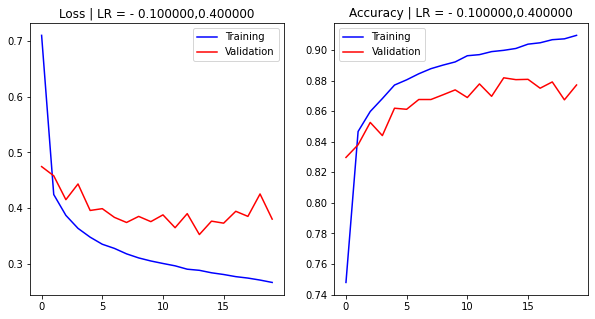

Epoch 0: 0.692874, 0.758260, 0.466162, 0.834000
Epoch 1: 0.426215, 0.844920, 0.428894, 0.847000
Epoch 2: 0.385735, 0.861080, 0.436749, 0.844800
Epoch 3: 0.361817, 0.869440, 0.397575, 0.855000
Epoch 4: 0.344509, 0.876200, 0.442626, 0.836600
Epoch 5: 0.332657, 0.880980, 0.389091, 0.864600
Epoch 6: 0.323319, 0.885120, 0.364703, 0.873000
Epoch 7: 0.312315, 0.888540, 0.353073, 0.877200
Epoch 8: 0.305975, 0.890300, 0.356173, 0.876100
Epoch 9: 0.299162, 0.893040, 0.406038, 0.866200
Epoch 10: 0.293153, 0.895580, 0.354181, 0.876700
Epoch 11: 0.288155, 0.897660, 0.343785, 0.884400
Epoch 12: 0.283533, 0.899140, 0.356148, 0.877300
Epoch 13: 0.278368, 0.900660, 0.390176, 0.865600
Epoch 14: 0.273770, 0.903920, 0.350403, 0.882400
Epoch 15: 0.270435, 0.903720, 0.382818, 0.876600
Epoch 16: 0.265427, 0.906280, 0.359637, 0.879400
Epoch 17: 0.261196, 0.908740, 0.369891, 0.881300
Epoch 18: 0.257648, 0.910500, 0.353750, 0.880900
Epoch 19: 0.254184, 0.911160, 0.357430, 0.885400


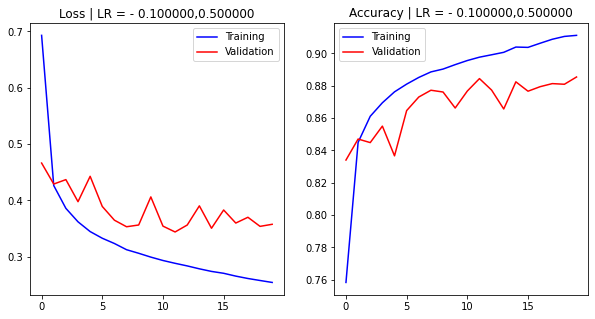

Epoch 0: 0.694892, 0.759940, 0.485632, 0.820400
Epoch 1: 0.419092, 0.848940, 0.412147, 0.854400
Epoch 2: 0.377081, 0.864840, 0.409622, 0.854500
Epoch 3: 0.353596, 0.872840, 0.394129, 0.860600
Epoch 4: 0.337086, 0.878440, 0.379186, 0.867000
Epoch 5: 0.323202, 0.882080, 0.415969, 0.860300
Epoch 6: 0.312629, 0.888220, 0.367744, 0.869300
Epoch 7: 0.303915, 0.891000, 0.361293, 0.874600
Epoch 8: 0.295505, 0.893420, 0.353152, 0.875700
Epoch 9: 0.286606, 0.896160, 0.349740, 0.875700
Epoch 10: 0.280381, 0.899060, 0.344052, 0.882200
Epoch 11: 0.274876, 0.900820, 0.370116, 0.874500
Epoch 12: 0.270130, 0.903820, 0.353532, 0.879700
Epoch 13: 0.263147, 0.905620, 0.363107, 0.878100
Epoch 14: 0.257534, 0.907880, 0.376400, 0.875500
Epoch 15: 0.252701, 0.909880, 0.371105, 0.875800
Epoch 16: 0.247616, 0.910940, 0.364366, 0.876500
Epoch 17: 0.243787, 0.913220, 0.385339, 0.873500
Epoch 18: 0.241848, 0.914520, 0.343564, 0.885700
Epoch 19: 0.235664, 0.915380, 0.346716, 0.887800


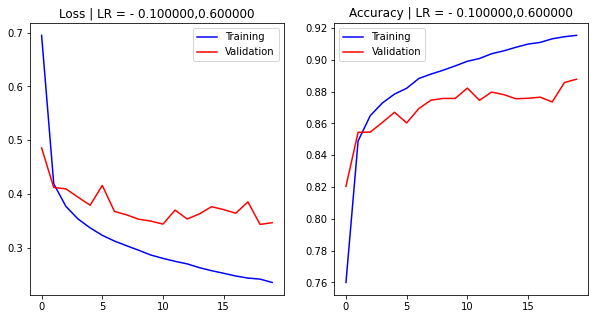

Epoch 0: 0.694185, 0.759740, 0.485413, 0.828800
Epoch 1: 0.420628, 0.847720, 0.423039, 0.849100
Epoch 2: 0.377756, 0.864060, 0.417483, 0.850000
Epoch 3: 0.353339, 0.871620, 0.403644, 0.850800
Epoch 4: 0.336340, 0.878320, 0.410647, 0.853100
Epoch 5: 0.321098, 0.884160, 0.390744, 0.860800
Epoch 6: 0.309474, 0.888240, 0.369512, 0.871700
Epoch 7: 0.298466, 0.891640, 0.385476, 0.859300
Epoch 8: 0.290973, 0.894480, 0.387166, 0.868000
Epoch 9: 0.280912, 0.898600, 0.381982, 0.872800
Epoch 10: 0.274018, 0.900760, 0.422810, 0.848900
Epoch 11: 0.267614, 0.902400, 0.364225, 0.874800
Epoch 12: 0.261320, 0.903580, 0.330359, 0.882200
Epoch 13: 0.255058, 0.907000, 0.349215, 0.881200
Epoch 14: 0.247929, 0.908920, 0.428946, 0.853000
Epoch 15: 0.243647, 0.911360, 0.359043, 0.877400
Epoch 16: 0.237797, 0.913740, 0.357073, 0.879800
Epoch 17: 0.233002, 0.915580, 0.338345, 0.889000
Epoch 18: 0.227674, 0.917000, 0.381677, 0.875900
Epoch 19: 0.223269, 0.918720, 0.380775, 0.873700


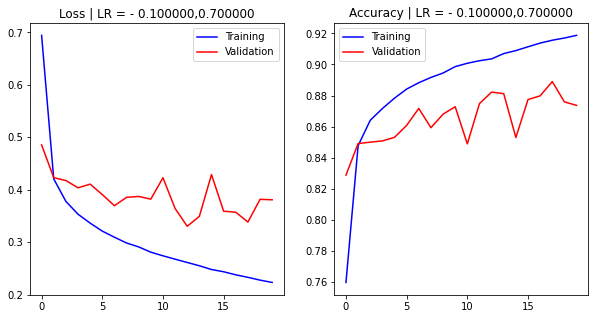

Epoch 0: 0.697645, 0.751640, 0.484866, 0.819600
Epoch 1: 0.413171, 0.850800, 0.419425, 0.845000
Epoch 2: 0.373225, 0.863980, 0.398615, 0.855800
Epoch 3: 0.346342, 0.874340, 0.422010, 0.844000
Epoch 4: 0.327878, 0.879760, 0.423490, 0.848300
Epoch 5: 0.314709, 0.884800, 0.364953, 0.871000
Epoch 6: 0.302066, 0.890100, 0.366821, 0.867000
Epoch 7: 0.289630, 0.894640, 0.345044, 0.878100
Epoch 8: 0.280786, 0.897040, 0.383424, 0.866100
Epoch 9: 0.273487, 0.899800, 0.369298, 0.873200
Epoch 10: 0.264549, 0.903240, 0.342660, 0.880800
Epoch 11: 0.256775, 0.905800, 0.334490, 0.884900
Epoch 12: 0.250045, 0.909320, 0.374379, 0.866100
Epoch 13: 0.243487, 0.910440, 0.330116, 0.882200
Epoch 14: 0.237458, 0.912520, 0.340569, 0.879500
Epoch 15: 0.230862, 0.916000, 0.366570, 0.877800
Epoch 16: 0.225260, 0.917140, 0.337172, 0.882400
Epoch 17: 0.219810, 0.920760, 0.341750, 0.881900
Epoch 18: 0.214078, 0.921840, 0.377186, 0.872600
Epoch 19: 0.208224, 0.923600, 0.342770, 0.885800


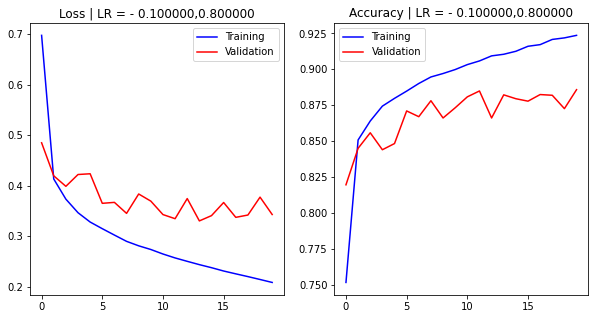

Epoch 0: 0.688572, 0.759460, 0.483335, 0.827800
Epoch 1: 0.412249, 0.851040, 0.434972, 0.839200
Epoch 2: 0.368851, 0.866460, 0.441893, 0.838100
Epoch 3: 0.342523, 0.875340, 0.437869, 0.845300
Epoch 4: 0.323629, 0.882300, 0.348036, 0.871900
Epoch 5: 0.308092, 0.887000, 0.357741, 0.871800
Epoch 6: 0.295150, 0.892220, 0.346848, 0.875800
Epoch 7: 0.283914, 0.897260, 0.368371, 0.867100
Epoch 8: 0.273528, 0.899920, 0.349759, 0.874200
Epoch 9: 0.265322, 0.900980, 0.322180, 0.880200
Epoch 10: 0.254762, 0.905360, 0.320825, 0.887600
Epoch 11: 0.248503, 0.907800, 0.327019, 0.881300
Epoch 12: 0.240080, 0.911640, 0.400873, 0.859200
Epoch 13: 0.233058, 0.913580, 0.404050, 0.859200
Epoch 14: 0.227340, 0.915980, 0.334681, 0.886400
Epoch 15: 0.219565, 0.917960, 0.349375, 0.879800
Epoch 16: 0.212938, 0.920220, 0.383846, 0.879000
Epoch 17: 0.208523, 0.921780, 0.346193, 0.878300
Epoch 18: 0.201972, 0.925960, 0.337002, 0.886800
Epoch 19: 0.196721, 0.927620, 0.338140, 0.886700


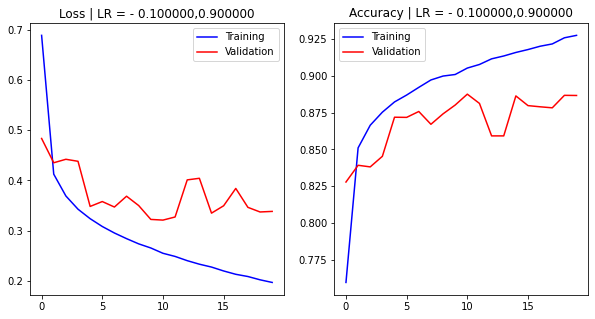

Epoch 0: 0.680725, 0.762460, 0.470484, 0.832700
Epoch 1: 0.423168, 0.850120, 0.435271, 0.846400
Epoch 2: 0.390438, 0.862600, 0.429736, 0.852300
Epoch 3: 0.371411, 0.870220, 0.441620, 0.845900
Epoch 4: 0.359760, 0.875580, 0.427626, 0.854100
Epoch 5: 0.350759, 0.880000, 0.466214, 0.846900
Epoch 6: 0.344590, 0.883720, 0.439062, 0.861600
Epoch 7: 0.337339, 0.886320, 0.413870, 0.868200
Epoch 8: 0.333928, 0.886800, 0.396398, 0.872500
Epoch 9: 0.327426, 0.890200, 0.424391, 0.869600
Epoch 10: 0.324905, 0.892180, 0.440255, 0.860000
Epoch 11: 0.321021, 0.892960, 0.419986, 0.875400
Epoch 12: 0.324750, 0.893980, 0.425169, 0.873700
Epoch 13: 0.321230, 0.895240, 0.425188, 0.871500
Epoch 14: 0.320236, 0.897460, 0.419578, 0.876200
Epoch 15: 0.318393, 0.897520, 0.459890, 0.869500
Epoch 16: 0.317905, 0.899840, 0.421825, 0.878100
Epoch 17: 0.316679, 0.900900, 0.449198, 0.875400
Epoch 18: 0.318004, 0.900960, 0.458942, 0.879100
Epoch 19: 0.314644, 0.902400, 0.465530, 0.874700


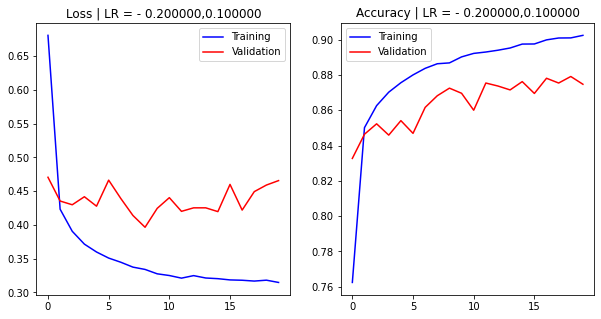

Epoch 0: 0.700067, 0.756780, 0.493031, 0.820700
Epoch 1: 0.426370, 0.846520, 0.440731, 0.841600
Epoch 2: 0.386579, 0.861700, 0.432401, 0.851500
Epoch 3: 0.364163, 0.871060, 0.391459, 0.863600
Epoch 4: 0.350893, 0.876980, 0.378849, 0.865500
Epoch 5: 0.339606, 0.881160, 0.404924, 0.861700
Epoch 6: 0.332189, 0.883720, 0.398376, 0.868000
Epoch 7: 0.327189, 0.886780, 0.380426, 0.871200
Epoch 8: 0.320915, 0.889820, 0.391369, 0.868000
Epoch 9: 0.317553, 0.891400, 0.415688, 0.862000
Epoch 10: 0.314775, 0.892340, 0.401030, 0.868900
Epoch 11: 0.309076, 0.894160, 0.420503, 0.863400
Epoch 12: 0.307275, 0.896120, 0.414703, 0.866800
Epoch 13: 0.305709, 0.897020, 0.396847, 0.875100
Epoch 14: 0.300488, 0.898180, 0.406248, 0.871000
Epoch 15: 0.301564, 0.898820, 0.397923, 0.879400
Epoch 16: 0.298851, 0.901000, 0.431356, 0.878700
Epoch 17: 0.295469, 0.902780, 0.413500, 0.874500
Epoch 18: 0.292627, 0.903660, 0.407241, 0.878900
Epoch 19: 0.293624, 0.903700, 0.410099, 0.880500


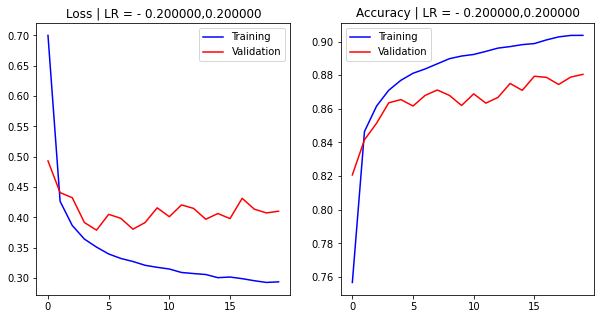

Epoch 0: 0.692940, 0.758240, 0.488106, 0.823900
Epoch 1: 0.428412, 0.845800, 0.448388, 0.834500
Epoch 2: 0.388254, 0.862240, 0.421910, 0.847000
Epoch 3: 0.366035, 0.869860, 0.405751, 0.855900
Epoch 4: 0.349351, 0.875920, 0.378346, 0.867400
Epoch 5: 0.336932, 0.880340, 0.390554, 0.868100
Epoch 6: 0.327686, 0.884020, 0.383141, 0.867800
Epoch 7: 0.321008, 0.886220, 0.382380, 0.870000
Epoch 8: 0.314338, 0.890180, 0.386999, 0.866200
Epoch 9: 0.307491, 0.891680, 0.394803, 0.865200
Epoch 10: 0.302698, 0.894160, 0.379405, 0.870400
Epoch 11: 0.299238, 0.895280, 0.382904, 0.873400
Epoch 12: 0.297459, 0.896620, 0.378928, 0.875800
Epoch 13: 0.294082, 0.899100, 0.422914, 0.863000
Epoch 14: 0.292635, 0.900280, 0.365118, 0.878700
Epoch 15: 0.288093, 0.902460, 0.389554, 0.875800
Epoch 16: 0.282801, 0.902960, 0.362090, 0.880200
Epoch 17: 0.280615, 0.905000, 0.366213, 0.884500
Epoch 18: 0.278834, 0.905400, 0.398917, 0.880700
Epoch 19: 0.276581, 0.908120, 0.397893, 0.878100


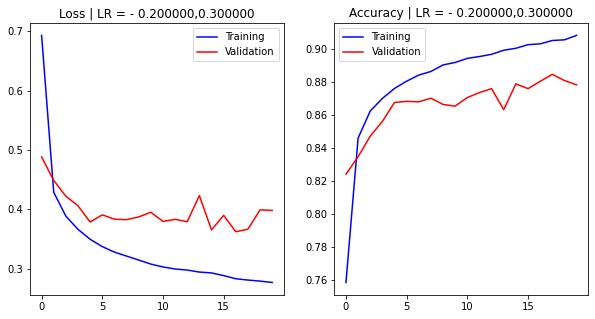

Epoch 0: 0.692782, 0.757560, 0.474733, 0.830500
Epoch 1: 0.418018, 0.848760, 0.421207, 0.848200
Epoch 2: 0.379744, 0.863780, 0.406388, 0.855800
Epoch 3: 0.357156, 0.872660, 0.411910, 0.853300
Epoch 4: 0.341758, 0.879740, 0.397593, 0.861500
Epoch 5: 0.329997, 0.883760, 0.388992, 0.867900
Epoch 6: 0.320129, 0.886160, 0.421961, 0.849200
Epoch 7: 0.310706, 0.890380, 0.375746, 0.868000
Epoch 8: 0.305256, 0.891400, 0.382841, 0.868000
Epoch 9: 0.298712, 0.894780, 0.387434, 0.871000
Epoch 10: 0.295395, 0.897740, 0.362884, 0.875900
Epoch 11: 0.289314, 0.899460, 0.385058, 0.877500
Epoch 12: 0.286576, 0.899920, 0.406719, 0.866900
Epoch 13: 0.281389, 0.901880, 0.354634, 0.880300
Epoch 14: 0.274749, 0.904140, 0.368306, 0.877000
Epoch 15: 0.273071, 0.905760, 0.373247, 0.878600
Epoch 16: 0.269421, 0.907320, 0.385202, 0.876300
Epoch 17: 0.265500, 0.908880, 0.383920, 0.875400
Epoch 18: 0.261597, 0.909600, 0.383454, 0.882000
Epoch 19: 0.259398, 0.911220, 0.381226, 0.882400


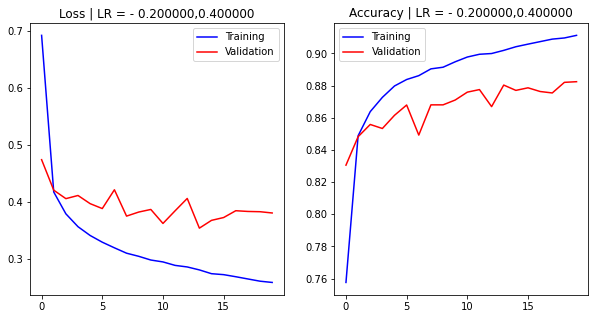

Epoch 0: 0.704461, 0.751980, 0.477453, 0.827300
Epoch 1: 0.419973, 0.847400, 0.447816, 0.841100
Epoch 2: 0.380732, 0.862340, 0.411110, 0.852000
Epoch 3: 0.358334, 0.873140, 0.378701, 0.864800
Epoch 4: 0.341317, 0.877860, 0.374274, 0.865600
Epoch 5: 0.328812, 0.881760, 0.389013, 0.864800
Epoch 6: 0.318564, 0.886860, 0.358260, 0.874200
Epoch 7: 0.311095, 0.888180, 0.403416, 0.864500
Epoch 8: 0.303599, 0.890720, 0.383244, 0.868200
Epoch 9: 0.297628, 0.894300, 0.399191, 0.864800
Epoch 10: 0.290876, 0.897020, 0.350445, 0.883900
Epoch 11: 0.285726, 0.899680, 0.367616, 0.877500
Epoch 12: 0.280364, 0.899500, 0.357498, 0.878500
Epoch 13: 0.274370, 0.903540, 0.358083, 0.880000
Epoch 14: 0.271265, 0.904680, 0.365333, 0.883600
Epoch 15: 0.266224, 0.905660, 0.395111, 0.876400
Epoch 16: 0.261571, 0.908260, 0.364405, 0.882900
Epoch 17: 0.258661, 0.910120, 0.389243, 0.875100
Epoch 18: 0.254057, 0.909780, 0.367623, 0.882900
Epoch 19: 0.250283, 0.912240, 0.374073, 0.880600


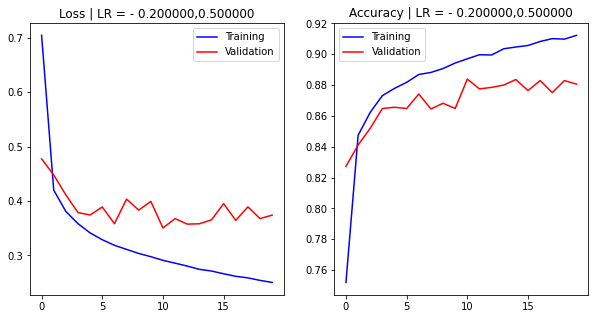

Epoch 0: 0.692253, 0.759160, 0.469650, 0.832700
Epoch 1: 0.419375, 0.849160, 0.453738, 0.838600
Epoch 2: 0.377687, 0.864300, 0.426136, 0.849700
Epoch 3: 0.353581, 0.872820, 0.397322, 0.857300
Epoch 4: 0.336971, 0.879160, 0.431644, 0.842200
Epoch 5: 0.323201, 0.884520, 0.396136, 0.862100
Epoch 6: 0.313023, 0.888620, 0.366183, 0.871300
Epoch 7: 0.301772, 0.891600, 0.380086, 0.865600
Epoch 8: 0.294101, 0.894480, 0.367414, 0.874200
Epoch 9: 0.286024, 0.897780, 0.346095, 0.881500
Epoch 10: 0.280813, 0.898860, 0.381928, 0.874600
Epoch 11: 0.273756, 0.901680, 0.355000, 0.881200
Epoch 12: 0.269030, 0.902800, 0.332247, 0.884600
Epoch 13: 0.262196, 0.905740, 0.349420, 0.885600
Epoch 14: 0.256512, 0.907640, 0.381094, 0.871300
Epoch 15: 0.253136, 0.908620, 0.360627, 0.881400
Epoch 16: 0.246676, 0.911280, 0.378261, 0.878200
Epoch 17: 0.242883, 0.912100, 0.346557, 0.883700
Epoch 18: 0.238326, 0.915140, 0.338456, 0.886600
Epoch 19: 0.232543, 0.916820, 0.366910, 0.881800


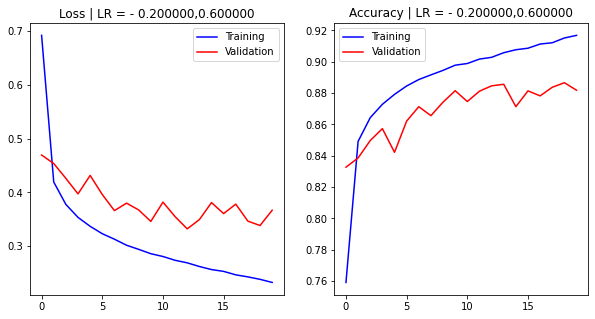

Epoch 0: 0.698145, 0.755020, 0.496708, 0.823800
Epoch 1: 0.419015, 0.849520, 0.469061, 0.824300
Epoch 2: 0.376292, 0.864020, 0.393538, 0.859500
Epoch 3: 0.350745, 0.873180, 0.422441, 0.847200
Epoch 4: 0.331901, 0.880240, 0.382627, 0.863300
Epoch 5: 0.317628, 0.885680, 0.391378, 0.855400
Epoch 6: 0.305553, 0.889740, 0.369481, 0.870300
Epoch 7: 0.296984, 0.893000, 0.383943, 0.866200
Epoch 8: 0.287728, 0.895480, 0.352112, 0.874100
Epoch 9: 0.278549, 0.898660, 0.345810, 0.879000
Epoch 10: 0.270936, 0.901440, 0.352900, 0.878000
Epoch 11: 0.264865, 0.904240, 0.336142, 0.880200
Epoch 12: 0.257362, 0.905520, 0.346489, 0.882000
Epoch 13: 0.251168, 0.908780, 0.342701, 0.880400
Epoch 14: 0.243934, 0.911340, 0.368422, 0.877600
Epoch 15: 0.240433, 0.912600, 0.355597, 0.876900
Epoch 16: 0.235016, 0.915440, 0.397790, 0.871700
Epoch 17: 0.229333, 0.916780, 0.373245, 0.873900
Epoch 18: 0.224310, 0.918640, 0.345052, 0.887200
Epoch 19: 0.220323, 0.919700, 0.351456, 0.884600


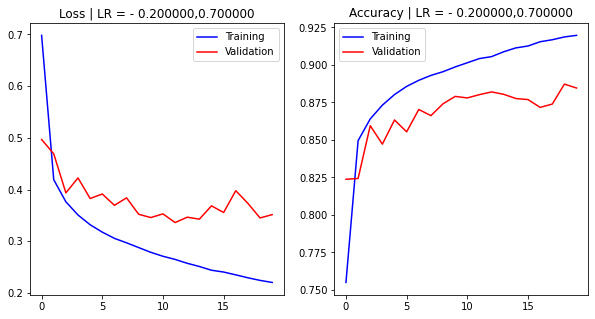

Epoch 0: 0.705464, 0.751560, 0.505713, 0.821200
Epoch 1: 0.417040, 0.849800, 0.457728, 0.837000
Epoch 2: 0.372596, 0.865020, 0.425670, 0.845900
Epoch 3: 0.345903, 0.873760, 0.385002, 0.862500
Epoch 4: 0.327316, 0.879960, 0.388657, 0.859800
Epoch 5: 0.312205, 0.885480, 0.360242, 0.870700
Epoch 6: 0.299276, 0.890920, 0.341409, 0.875500
Epoch 7: 0.290405, 0.893920, 0.355892, 0.872100
Epoch 8: 0.280771, 0.897420, 0.415277, 0.853300
Epoch 9: 0.271890, 0.900540, 0.385648, 0.865700
Epoch 10: 0.264414, 0.902860, 0.379191, 0.868100
Epoch 11: 0.255973, 0.905760, 0.354317, 0.875900
Epoch 12: 0.249078, 0.908700, 0.336001, 0.884400
Epoch 13: 0.242769, 0.910860, 0.357004, 0.879100
Epoch 14: 0.236370, 0.913820, 0.368944, 0.874400
Epoch 15: 0.230192, 0.915180, 0.349549, 0.880300
Epoch 16: 0.225212, 0.917100, 0.335918, 0.880700
Epoch 17: 0.219139, 0.919320, 0.330452, 0.888500
Epoch 18: 0.212296, 0.921920, 0.321206, 0.892800
Epoch 19: 0.208024, 0.923760, 0.346070, 0.882000


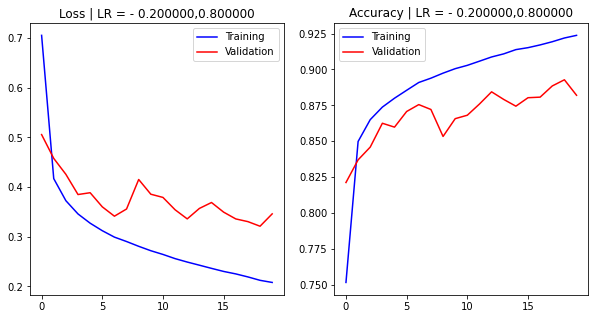

Epoch 0: 0.695319, 0.756260, 0.559181, 0.793000
Epoch 1: 0.410866, 0.851300, 0.412815, 0.849300
Epoch 2: 0.368330, 0.867520, 0.436548, 0.840500
Epoch 3: 0.340975, 0.875240, 0.397430, 0.860700
Epoch 4: 0.322543, 0.881940, 0.381230, 0.862200
Epoch 5: 0.306838, 0.886980, 0.371065, 0.866700
Epoch 6: 0.293331, 0.892620, 0.416593, 0.847100
Epoch 7: 0.282619, 0.896060, 0.386642, 0.859200
Epoch 8: 0.270485, 0.899540, 0.360598, 0.871400
Epoch 9: 0.262026, 0.903580, 0.366438, 0.859400
Epoch 10: 0.252634, 0.905500, 0.331351, 0.878600
Epoch 11: 0.244658, 0.909540, 0.321977, 0.887200
Epoch 12: 0.237432, 0.911560, 0.338397, 0.884400
Epoch 13: 0.230892, 0.913600, 0.353712, 0.871700
Epoch 14: 0.222695, 0.917400, 0.323758, 0.889600
Epoch 15: 0.215710, 0.919920, 0.334761, 0.880200
Epoch 16: 0.209622, 0.921360, 0.337237, 0.878600
Epoch 17: 0.204857, 0.923900, 0.338708, 0.885600
Epoch 18: 0.198075, 0.926900, 0.354272, 0.881000
Epoch 19: 0.193535, 0.927560, 0.342153, 0.885900


Epoch 0: 0.671974, 0.764760, 0.491129, 0.818500
Epoch 1: 0.418789, 0.849200, 0.445488, 0.840900
Epoch 2: 0.382050, 0.863960, 0.403448, 0.858000
Epoch 3: 0.361398, 0.872680, 0.419591, 0.859000
Epoch 4: 0.346352, 0.878700, 0.406487, 0.859600
Epoch 5: 0.339993, 0.882160, 0.465196, 0.847500
Epoch 6: 0.329340, 0.885560, 0.376254, 0.875500
Epoch 7: 0.322483, 0.889160, 0.375993, 0.877700
Epoch 8: 0.316971, 0.891180, 0.381356, 0.877800
Epoch 9: 0.314014, 0.893560, 0.393992, 0.873500
Epoch 10: 0.309803, 0.894200, 0.389647, 0.876300
Epoch 11: 0.309574, 0.895320, 0.398831, 0.875100
Epoch 12: 0.304142, 0.898380, 0.409129, 0.878500
Epoch 13: 0.300285, 0.900220, 0.423128, 0.878300
Epoch 14: 0.302712, 0.899920, 0.410383, 0.877300
Epoch 15: 0.297289, 0.900980, 0.418253, 0.879000
Epoch 16: 0.295667, 0.903560, 0.428283, 0.881400
Epoch 17: 0.294408, 0.904360, 0.399963, 0.882900
Epoch 18: 0.293121, 0.904580, 0.416459, 0.882500
Epoch 19: 0.293451, 0.907180, 0.427388, 0.881400


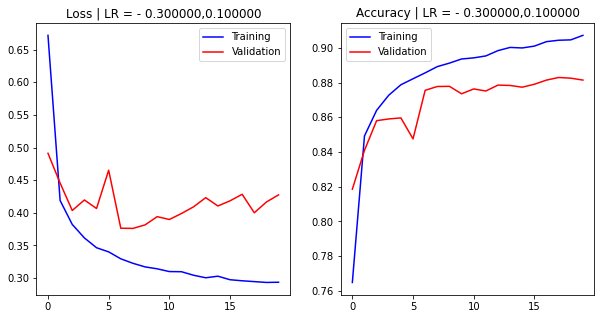

Epoch 0: 0.684804, 0.757900, 0.470033, 0.830700
Epoch 1: 0.420972, 0.848500, 0.466745, 0.835400
Epoch 2: 0.382039, 0.864120, 0.435357, 0.844100
Epoch 3: 0.362030, 0.871020, 0.460675, 0.842500
Epoch 4: 0.345793, 0.876740, 0.373230, 0.872600
Epoch 5: 0.334668, 0.883180, 0.370930, 0.874800
Epoch 6: 0.327290, 0.885780, 0.379166, 0.872100
Epoch 7: 0.322536, 0.888040, 0.366609, 0.876600
Epoch 8: 0.315255, 0.892080, 0.433414, 0.868000
Epoch 9: 0.310620, 0.894180, 0.400485, 0.872600
Epoch 10: 0.307905, 0.895700, 0.415699, 0.874900
Epoch 11: 0.303849, 0.897080, 0.426073, 0.866900
Epoch 12: 0.302438, 0.897960, 0.380970, 0.877500
Epoch 13: 0.297938, 0.899900, 0.408194, 0.874700
Epoch 14: 0.296906, 0.901480, 0.422850, 0.869900
Epoch 15: 0.295483, 0.900960, 0.383106, 0.881700
Epoch 16: 0.289455, 0.903360, 0.392621, 0.878600
Epoch 17: 0.288995, 0.904420, 0.408328, 0.873300
Epoch 18: 0.286690, 0.905160, 0.416389, 0.879200
Epoch 19: 0.285386, 0.905960, 0.414418, 0.879300


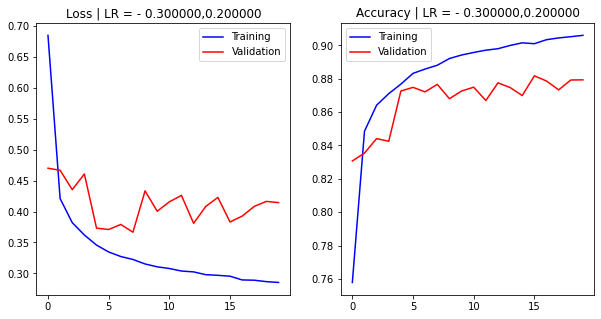

Epoch 0: 0.685827, 0.757820, 0.465473, 0.830000
Epoch 1: 0.419583, 0.849800, 0.433623, 0.845800
Epoch 2: 0.382170, 0.863920, 0.474833, 0.831400
Epoch 3: 0.360593, 0.871420, 0.391603, 0.862700
Epoch 4: 0.345352, 0.877500, 0.416234, 0.852400
Epoch 5: 0.332732, 0.883380, 0.372224, 0.873300
Epoch 6: 0.322652, 0.886940, 0.406505, 0.864100
Epoch 7: 0.316833, 0.888580, 0.410392, 0.865000
Epoch 8: 0.307592, 0.892420, 0.388271, 0.867700
Epoch 9: 0.304247, 0.894020, 0.397168, 0.863100
Epoch 10: 0.299652, 0.896540, 0.380278, 0.870100
Epoch 11: 0.294127, 0.898120, 0.390028, 0.871600
Epoch 12: 0.291019, 0.899040, 0.367290, 0.877400
Epoch 13: 0.287245, 0.901500, 0.381367, 0.875800
Epoch 14: 0.282014, 0.903420, 0.385390, 0.876800
Epoch 15: 0.276798, 0.905620, 0.396366, 0.874700
Epoch 16: 0.274576, 0.906400, 0.371560, 0.885300
Epoch 17: 0.271889, 0.907360, 0.392660, 0.881600
Epoch 18: 0.270280, 0.908060, 0.421676, 0.876500
Epoch 19: 0.268030, 0.910280, 0.411851, 0.876300


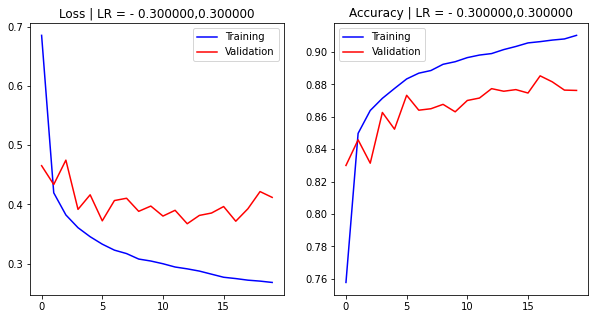

Epoch 0: 0.690211, 0.759360, 0.486250, 0.822900
Epoch 1: 0.421742, 0.849200, 0.434446, 0.843400
Epoch 2: 0.380474, 0.862920, 0.423273, 0.851500
Epoch 3: 0.358740, 0.871900, 0.396167, 0.859100
Epoch 4: 0.343245, 0.876520, 0.393005, 0.861100
Epoch 5: 0.330455, 0.881420, 0.421111, 0.852500
Epoch 6: 0.320684, 0.886100, 0.362257, 0.874900
Epoch 7: 0.313205, 0.888760, 0.386885, 0.874000
Epoch 8: 0.306322, 0.891400, 0.352698, 0.877300
Epoch 9: 0.299907, 0.893100, 0.392184, 0.865400
Epoch 10: 0.294545, 0.895620, 0.392803, 0.867000
Epoch 11: 0.290221, 0.898300, 0.375912, 0.874700
Epoch 12: 0.284381, 0.899740, 0.368557, 0.880600
Epoch 13: 0.279634, 0.901540, 0.369026, 0.877900
Epoch 14: 0.275555, 0.904060, 0.375792, 0.875700
Epoch 15: 0.273370, 0.904280, 0.360348, 0.886000
Epoch 16: 0.267850, 0.907120, 0.370268, 0.879500
Epoch 17: 0.265467, 0.908400, 0.364918, 0.882300
Epoch 18: 0.258975, 0.909220, 0.364200, 0.885700
Epoch 19: 0.255368, 0.910700, 0.381260, 0.884100


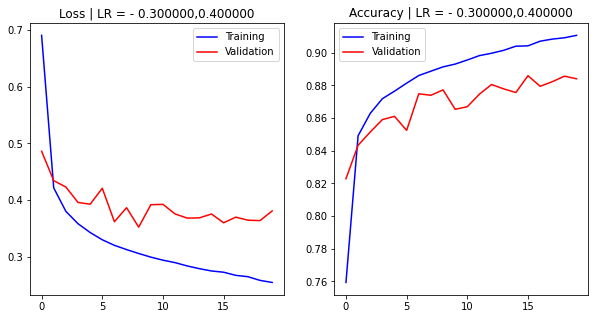

Epoch 0: 0.696431, 0.755780, 0.475224, 0.828600
Epoch 1: 0.420127, 0.848580, 0.419097, 0.849100
Epoch 2: 0.379002, 0.864520, 0.404172, 0.856200
Epoch 3: 0.356128, 0.872540, 0.377343, 0.864100
Epoch 4: 0.338641, 0.878780, 0.369745, 0.867300
Epoch 5: 0.325302, 0.883700, 0.366055, 0.869000
Epoch 6: 0.314199, 0.887920, 0.366737, 0.865400
Epoch 7: 0.305486, 0.891760, 0.358188, 0.872400
Epoch 8: 0.299028, 0.894640, 0.403722, 0.865800
Epoch 9: 0.292449, 0.896660, 0.351477, 0.876900
Epoch 10: 0.287199, 0.897240, 0.362636, 0.873500
Epoch 11: 0.280462, 0.899560, 0.348960, 0.882400
Epoch 12: 0.275077, 0.902160, 0.361938, 0.875500
Epoch 13: 0.270249, 0.904880, 0.378635, 0.876100
Epoch 14: 0.265639, 0.905560, 0.355031, 0.877200
Epoch 15: 0.263117, 0.906200, 0.340821, 0.885100
Epoch 16: 0.258428, 0.909660, 0.359534, 0.882000
Epoch 17: 0.254283, 0.910080, 0.343025, 0.881900
Epoch 18: 0.248393, 0.911600, 0.361838, 0.882500
Epoch 19: 0.246947, 0.913500, 0.356937, 0.883300


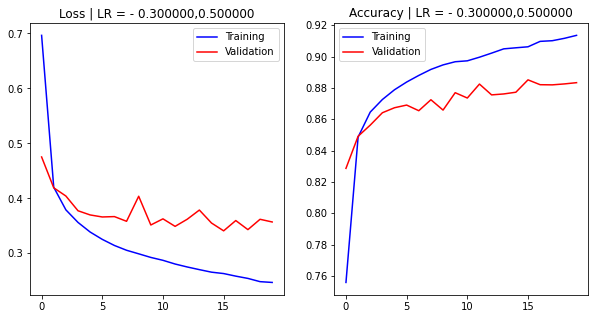

Epoch 0: 0.686424, 0.759440, 0.475646, 0.828900
Epoch 1: 0.414073, 0.850580, 0.425893, 0.850200
Epoch 2: 0.376324, 0.864480, 0.392344, 0.860200
Epoch 3: 0.350852, 0.873760, 0.386719, 0.862300
Epoch 4: 0.334997, 0.880160, 0.383455, 0.863100
Epoch 5: 0.320353, 0.885780, 0.365048, 0.875300
Epoch 6: 0.311072, 0.888080, 0.363524, 0.873700
Epoch 7: 0.300364, 0.892520, 0.365566, 0.872400
Epoch 8: 0.291615, 0.895580, 0.348229, 0.879500
Epoch 9: 0.285921, 0.896560, 0.359992, 0.874600
Epoch 10: 0.279226, 0.899480, 0.361083, 0.874000
Epoch 11: 0.273627, 0.903140, 0.353104, 0.880500
Epoch 12: 0.267981, 0.904600, 0.363513, 0.878900
Epoch 13: 0.262343, 0.906340, 0.375066, 0.871800
Epoch 14: 0.257668, 0.908900, 0.402183, 0.866600
Epoch 15: 0.251737, 0.909440, 0.371347, 0.876200
Epoch 16: 0.248368, 0.911160, 0.350811, 0.886100
Epoch 17: 0.243045, 0.913080, 0.352725, 0.883900
Epoch 18: 0.237247, 0.916840, 0.347840, 0.885300
Epoch 19: 0.233327, 0.917740, 0.355434, 0.886000


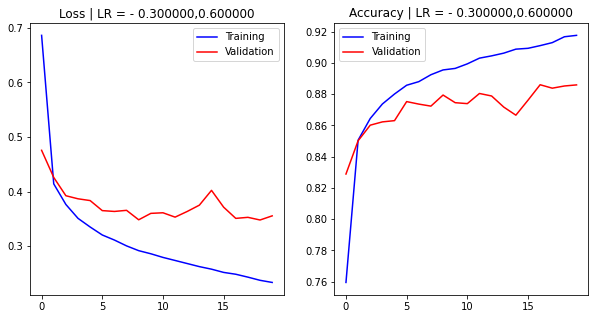

Epoch 0: 0.695222, 0.759180, 0.481088, 0.823500
Epoch 1: 0.416546, 0.850380, 0.460411, 0.832700
Epoch 2: 0.371860, 0.865240, 0.458403, 0.838100
Epoch 3: 0.347470, 0.872920, 0.377538, 0.860300
Epoch 4: 0.331571, 0.879460, 0.383538, 0.863500
Epoch 5: 0.316604, 0.884360, 0.390540, 0.857200
Epoch 6: 0.304624, 0.889340, 0.378911, 0.866600
Epoch 7: 0.295174, 0.891820, 0.343278, 0.879800
Epoch 8: 0.288067, 0.896280, 0.388054, 0.863800
Epoch 9: 0.277643, 0.898700, 0.336870, 0.876600
Epoch 10: 0.269899, 0.901760, 0.372265, 0.873000
Epoch 11: 0.262923, 0.903420, 0.371910, 0.876400
Epoch 12: 0.255350, 0.907160, 0.358806, 0.879300
Epoch 13: 0.250514, 0.909700, 0.362550, 0.875800
Epoch 14: 0.244285, 0.911720, 0.357608, 0.880700
Epoch 15: 0.238211, 0.913080, 0.351104, 0.881900
Epoch 16: 0.233656, 0.915900, 0.366533, 0.874100
Epoch 17: 0.228004, 0.916740, 0.342491, 0.886200
Epoch 18: 0.223526, 0.918400, 0.365742, 0.880300
Epoch 19: 0.216918, 0.921440, 0.365338, 0.878100


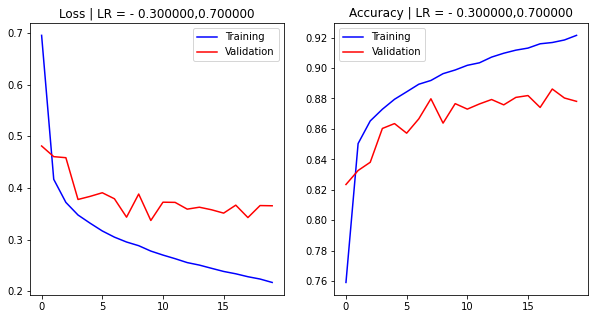

Epoch 0: 0.691924, 0.759080, 0.493916, 0.818700
Epoch 1: 0.415328, 0.850560, 0.420476, 0.845900
Epoch 2: 0.369696, 0.865240, 0.429940, 0.848700
Epoch 3: 0.345121, 0.874920, 0.371645, 0.865400
Epoch 4: 0.325785, 0.881260, 0.373094, 0.866100
Epoch 5: 0.310350, 0.885660, 0.374517, 0.862000
Epoch 6: 0.298780, 0.889420, 0.396310, 0.853200
Epoch 7: 0.287244, 0.894780, 0.370380, 0.869100
Epoch 8: 0.277440, 0.898740, 0.368271, 0.871300
Epoch 9: 0.269730, 0.900080, 0.372799, 0.871000
Epoch 10: 0.260966, 0.903720, 0.326366, 0.885300
Epoch 11: 0.252057, 0.907080, 0.334766, 0.882400
Epoch 12: 0.246562, 0.909800, 0.319395, 0.885000
Epoch 13: 0.238999, 0.911440, 0.329143, 0.885800
Epoch 14: 0.234495, 0.912480, 0.343252, 0.878300
Epoch 15: 0.225979, 0.917340, 0.362946, 0.874400
Epoch 16: 0.220419, 0.919460, 0.343360, 0.882000
Epoch 17: 0.214188, 0.921140, 0.345515, 0.887900
Epoch 18: 0.209174, 0.923240, 0.323500, 0.891000
Epoch 19: 0.203430, 0.924460, 0.342084, 0.886600


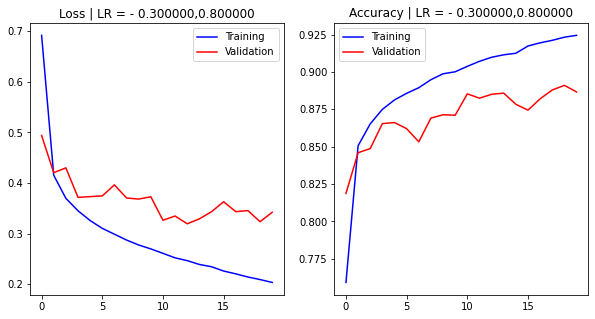

Epoch 0: 0.681272, 0.766840, 0.483287, 0.824200
Epoch 1: 0.407113, 0.852720, 0.406934, 0.850600
Epoch 2: 0.365762, 0.867020, 0.406508, 0.855900
Epoch 3: 0.340135, 0.877020, 0.437189, 0.829700
Epoch 4: 0.321971, 0.883660, 0.389357, 0.858800
Epoch 5: 0.307415, 0.887560, 0.362403, 0.866800
Epoch 6: 0.294574, 0.891940, 0.354852, 0.870300
Epoch 7: 0.283757, 0.895700, 0.344317, 0.876300
Epoch 8: 0.272079, 0.899960, 0.416982, 0.847900
Epoch 9: 0.262717, 0.903200, 0.336535, 0.882500
Epoch 10: 0.254088, 0.906100, 0.371084, 0.868900
Epoch 11: 0.245512, 0.909860, 0.351966, 0.871600
Epoch 12: 0.238439, 0.912800, 0.340922, 0.881900
Epoch 13: 0.230294, 0.914840, 0.375038, 0.870800
Epoch 14: 0.223382, 0.917260, 0.336082, 0.884900
Epoch 15: 0.217524, 0.918360, 0.356391, 0.877200
Epoch 16: 0.211472, 0.921780, 0.343284, 0.882100
Epoch 17: 0.204649, 0.924460, 0.402992, 0.866100
Epoch 18: 0.199209, 0.926640, 0.347641, 0.883900
Epoch 19: 0.192470, 0.928580, 0.360705, 0.880100


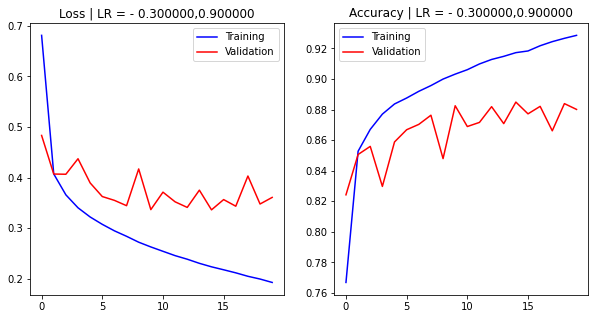

Epoch 0: 0.664450, 0.767000, 0.504156, 0.821100
Epoch 1: 0.408523, 0.851840, 0.432484, 0.847600
Epoch 2: 0.371796, 0.865680, 0.395628, 0.862400
Epoch 3: 0.350828, 0.875780, 0.370887, 0.867700
Epoch 4: 0.335378, 0.881300, 0.367408, 0.870000
Epoch 5: 0.322597, 0.886560, 0.369790, 0.871000
Epoch 6: 0.315716, 0.888920, 0.368826, 0.872600
Epoch 7: 0.311207, 0.891340, 0.368168, 0.877000
Epoch 8: 0.302733, 0.894660, 0.390983, 0.881500
Epoch 9: 0.300944, 0.896480, 0.400461, 0.868100
Epoch 10: 0.295074, 0.898940, 0.388603, 0.871700
Epoch 11: 0.291815, 0.900740, 0.408224, 0.875500
Epoch 12: 0.287650, 0.901700, 0.391170, 0.879900
Epoch 13: 0.284228, 0.903140, 0.399993, 0.877400
Epoch 14: 0.280711, 0.905040, 0.416799, 0.879500
Epoch 15: 0.275392, 0.907060, 0.423055, 0.882600
Epoch 16: 0.272047, 0.908120, 0.426671, 0.880200
Epoch 17: 0.270570, 0.908640, 0.439718, 0.875800
Epoch 18: 0.268175, 0.910100, 0.414340, 0.885000
Epoch 19: 0.266602, 0.911940, 0.418639, 0.883300


Epoch 0: 0.671896, 0.762640, 0.457932, 0.837000
Epoch 1: 0.414154, 0.852100, 0.421869, 0.852100
Epoch 2: 0.378386, 0.865580, 0.409614, 0.852500
Epoch 3: 0.358107, 0.873660, 0.394697, 0.863100
Epoch 4: 0.341984, 0.880000, 0.380026, 0.870700
Epoch 5: 0.331049, 0.883560, 0.383609, 0.874000
Epoch 6: 0.322320, 0.887620, 0.378188, 0.872800
Epoch 7: 0.314309, 0.891000, 0.402718, 0.867500
Epoch 8: 0.309722, 0.893040, 0.363985, 0.878500
Epoch 9: 0.301232, 0.895420, 0.376196, 0.874500
Epoch 10: 0.298027, 0.896200, 0.369837, 0.879000
Epoch 11: 0.295163, 0.899080, 0.407262, 0.869200
Epoch 12: 0.291241, 0.901960, 0.369410, 0.880900
Epoch 13: 0.288543, 0.901200, 0.388846, 0.879800
Epoch 14: 0.282977, 0.903920, 0.411555, 0.879000
Epoch 15: 0.282279, 0.904960, 0.416279, 0.872300
Epoch 16: 0.276527, 0.905740, 0.404570, 0.882700
Epoch 17: 0.276495, 0.907180, 0.416880, 0.881800
Epoch 18: 0.274140, 0.909100, 0.410046, 0.880000
Epoch 19: 0.271220, 0.909860, 0.401232, 0.885600


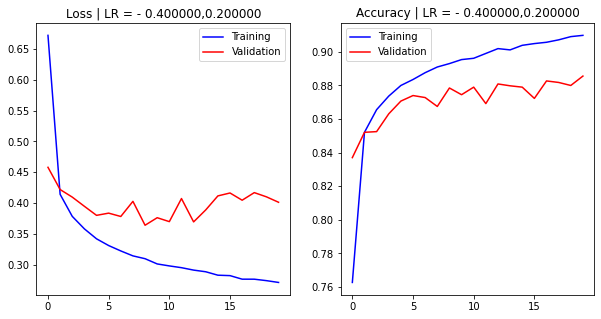

Epoch 0: 0.676993, 0.766580, 0.473178, 0.834100
Epoch 1: 0.415510, 0.850020, 0.433389, 0.846300
Epoch 2: 0.378634, 0.864440, 0.420846, 0.847600
Epoch 3: 0.354809, 0.872880, 0.382467, 0.865900
Epoch 4: 0.338503, 0.879180, 0.385778, 0.862000
Epoch 5: 0.328984, 0.883540, 0.405757, 0.860200
Epoch 6: 0.318079, 0.887720, 0.401175, 0.859000
Epoch 7: 0.311707, 0.889820, 0.386003, 0.866300
Epoch 8: 0.304249, 0.891520, 0.371753, 0.874500
Epoch 9: 0.299330, 0.894280, 0.366089, 0.873600
Epoch 10: 0.294207, 0.895020, 0.373917, 0.877400
Epoch 11: 0.289532, 0.898360, 0.407073, 0.866200
Epoch 12: 0.283595, 0.901100, 0.378036, 0.881700
Epoch 13: 0.279314, 0.901620, 0.373930, 0.879100
Epoch 14: 0.276359, 0.903620, 0.437418, 0.868000
Epoch 15: 0.273630, 0.904740, 0.361664, 0.882500
Epoch 16: 0.267627, 0.906960, 0.393895, 0.876900
Epoch 17: 0.263577, 0.908780, 0.393784, 0.877200
Epoch 18: 0.261258, 0.910580, 0.397116, 0.879600
Epoch 19: 0.256624, 0.911380, 0.376278, 0.884100


Epoch 0: 0.684490, 0.761060, 0.484811, 0.826300
Epoch 1: 0.417847, 0.850540, 0.436774, 0.846300
Epoch 2: 0.379593, 0.863920, 0.391879, 0.860000
Epoch 3: 0.354529, 0.874040, 0.385071, 0.865200
Epoch 4: 0.338480, 0.880180, 0.404974, 0.856700
Epoch 5: 0.324596, 0.884640, 0.374540, 0.865900
Epoch 6: 0.316022, 0.888220, 0.400617, 0.864600
Epoch 7: 0.307452, 0.891040, 0.380499, 0.870000
Epoch 8: 0.300426, 0.893500, 0.380343, 0.867500
Epoch 9: 0.292678, 0.897640, 0.365396, 0.870500
Epoch 10: 0.287990, 0.899220, 0.344739, 0.883500
Epoch 11: 0.282648, 0.900880, 0.370958, 0.871200
Epoch 12: 0.277135, 0.903020, 0.352623, 0.877600
Epoch 13: 0.271967, 0.904280, 0.367419, 0.878200
Epoch 14: 0.269044, 0.906420, 0.361022, 0.882100
Epoch 15: 0.264684, 0.909080, 0.354461, 0.882700
Epoch 16: 0.259181, 0.909100, 0.364139, 0.880400
Epoch 17: 0.256795, 0.911280, 0.371250, 0.884100
Epoch 18: 0.251180, 0.911580, 0.372373, 0.882300
Epoch 19: 0.246029, 0.914460, 0.379406, 0.885800


Epoch 0: 0.683974, 0.758180, 0.469226, 0.829300
Epoch 1: 0.418934, 0.849180, 0.419518, 0.850100
Epoch 2: 0.378354, 0.863880, 0.437581, 0.835700
Epoch 3: 0.353658, 0.873500, 0.388476, 0.861100
Epoch 4: 0.337781, 0.877920, 0.384643, 0.865900
Epoch 5: 0.323952, 0.883740, 0.369728, 0.868900
Epoch 6: 0.312914, 0.887900, 0.359174, 0.873400
Epoch 7: 0.304291, 0.891240, 0.358169, 0.870100
Epoch 8: 0.298161, 0.894480, 0.355871, 0.877500
Epoch 9: 0.289586, 0.895420, 0.349543, 0.879400
Epoch 10: 0.283386, 0.898380, 0.353247, 0.881700
Epoch 11: 0.278035, 0.901420, 0.362663, 0.874900
Epoch 12: 0.271887, 0.903040, 0.354954, 0.880700
Epoch 13: 0.266574, 0.906320, 0.362978, 0.877800
Epoch 14: 0.261112, 0.907360, 0.360939, 0.881900
Epoch 15: 0.256747, 0.909980, 0.338590, 0.887500
Epoch 16: 0.252867, 0.910180, 0.373587, 0.875100
Epoch 17: 0.246905, 0.912780, 0.359285, 0.883900
Epoch 18: 0.242253, 0.914940, 0.363421, 0.884600
Epoch 19: 0.238224, 0.915880, 0.356425, 0.886700


Epoch 0: 0.690381, 0.759540, 0.476992, 0.827600
Epoch 1: 0.417526, 0.848600, 0.427804, 0.847000
Epoch 2: 0.373879, 0.865540, 0.396654, 0.858500
Epoch 3: 0.350216, 0.874060, 0.389209, 0.859500
Epoch 4: 0.332247, 0.879200, 0.380774, 0.862300
Epoch 5: 0.320342, 0.884320, 0.365944, 0.868700
Epoch 6: 0.308856, 0.888880, 0.371471, 0.869100
Epoch 7: 0.299262, 0.891840, 0.359892, 0.871700
Epoch 8: 0.289911, 0.895020, 0.371151, 0.870400
Epoch 9: 0.282942, 0.897280, 0.351821, 0.879200
Epoch 10: 0.274023, 0.900860, 0.366720, 0.874000
Epoch 11: 0.270657, 0.902120, 0.343933, 0.883800
Epoch 12: 0.264923, 0.903220, 0.358652, 0.874400
Epoch 13: 0.257928, 0.907160, 0.365997, 0.875500
Epoch 14: 0.253263, 0.908920, 0.378113, 0.874300
Epoch 15: 0.250065, 0.910120, 0.345509, 0.884300
Epoch 16: 0.243574, 0.913120, 0.336148, 0.888500
Epoch 17: 0.238140, 0.914440, 0.367016, 0.882400
Epoch 18: 0.236032, 0.916460, 0.360934, 0.883100
Epoch 19: 0.230271, 0.916720, 0.360707, 0.882700


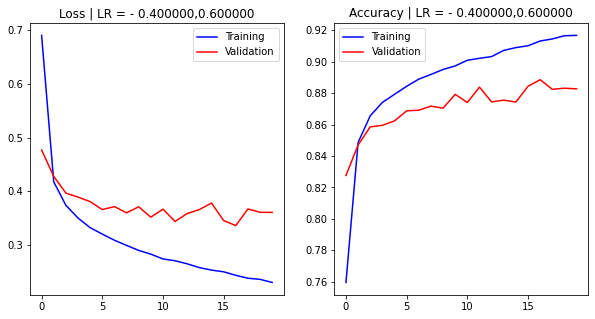

Epoch 0: 0.689438, 0.758820, 0.468254, 0.831200
Epoch 1: 0.412285, 0.851260, 0.417567, 0.847400
Epoch 2: 0.372493, 0.865160, 0.411452, 0.853700
Epoch 3: 0.347195, 0.874380, 0.402262, 0.855700
Epoch 4: 0.330622, 0.879400, 0.376268, 0.864400
Epoch 5: 0.317793, 0.885420, 0.359442, 0.872100
Epoch 6: 0.304878, 0.889200, 0.403012, 0.854500
Epoch 7: 0.294301, 0.894120, 0.348935, 0.873600
Epoch 8: 0.285043, 0.897220, 0.362446, 0.870400
Epoch 9: 0.277525, 0.898940, 0.347952, 0.880700
Epoch 10: 0.268892, 0.901700, 0.349272, 0.875600
Epoch 11: 0.262036, 0.904980, 0.342602, 0.882200
Epoch 12: 0.256008, 0.907260, 0.348996, 0.880300
Epoch 13: 0.249195, 0.908980, 0.339415, 0.885500
Epoch 14: 0.241655, 0.911860, 0.350081, 0.882200
Epoch 15: 0.238958, 0.913520, 0.346141, 0.883000
Epoch 16: 0.232421, 0.915680, 0.342503, 0.886900
Epoch 17: 0.226918, 0.916600, 0.351600, 0.882500
Epoch 18: 0.221884, 0.918700, 0.365761, 0.877200
Epoch 19: 0.218175, 0.920380, 0.355699, 0.885800


Epoch 0: 0.704751, 0.748180, 0.484757, 0.825800
Epoch 1: 0.413495, 0.848260, 0.447509, 0.836400
Epoch 2: 0.372520, 0.865560, 0.381570, 0.863600
Epoch 3: 0.346833, 0.873500, 0.371934, 0.867200
Epoch 4: 0.328456, 0.880260, 0.364352, 0.867200
Epoch 5: 0.313531, 0.886020, 0.361730, 0.868600
Epoch 6: 0.301951, 0.890500, 0.361061, 0.872500
Epoch 7: 0.292279, 0.893480, 0.368064, 0.869000
Epoch 8: 0.281531, 0.897880, 0.336299, 0.880300
Epoch 9: 0.273756, 0.899580, 0.333065, 0.879100
Epoch 10: 0.265518, 0.902120, 0.333884, 0.882500
Epoch 11: 0.257409, 0.905700, 0.345636, 0.880500
Epoch 12: 0.250972, 0.907560, 0.340736, 0.883500
Epoch 13: 0.244500, 0.910140, 0.335557, 0.882000
Epoch 14: 0.238468, 0.913080, 0.345265, 0.881700
Epoch 15: 0.231471, 0.914140, 0.326533, 0.886000
Epoch 16: 0.226407, 0.917960, 0.340669, 0.882000
Epoch 17: 0.219733, 0.919040, 0.360649, 0.882600
Epoch 18: 0.214738, 0.922020, 0.358136, 0.876500
Epoch 19: 0.209372, 0.922940, 0.371203, 0.879800


Epoch 0: 0.680231, 0.765380, 0.472055, 0.828500
Epoch 1: 0.408684, 0.852360, 0.463991, 0.826300
Epoch 2: 0.368350, 0.866220, 0.381836, 0.863300
Epoch 3: 0.341211, 0.876900, 0.363649, 0.867500
Epoch 4: 0.322475, 0.881320, 0.365740, 0.866900
Epoch 5: 0.306981, 0.887520, 0.366298, 0.866300
Epoch 6: 0.292389, 0.892780, 0.364958, 0.866000
Epoch 7: 0.280558, 0.895700, 0.347777, 0.869000
Epoch 8: 0.271699, 0.899100, 0.344545, 0.876000
Epoch 9: 0.261276, 0.903900, 0.336989, 0.879500
Epoch 10: 0.252193, 0.907500, 0.317426, 0.886700
Epoch 11: 0.243313, 0.909440, 0.334340, 0.883800
Epoch 12: 0.235843, 0.911960, 0.344711, 0.883300
Epoch 13: 0.230176, 0.914080, 0.361717, 0.866000
Epoch 14: 0.221403, 0.918240, 0.327133, 0.885200
Epoch 15: 0.215727, 0.919860, 0.324080, 0.885700
Epoch 16: 0.208474, 0.923140, 0.336038, 0.887300
Epoch 17: 0.202457, 0.924560, 0.322707, 0.892600
Epoch 18: 0.196643, 0.927440, 0.348981, 0.883800
Epoch 19: 0.191863, 0.927500, 0.335104, 0.885400


Epoch 0: 0.647051, 0.772760, 0.452095, 0.839100
Epoch 1: 0.405439, 0.853880, 0.428839, 0.840600
Epoch 2: 0.365380, 0.867820, 0.383902, 0.863300
Epoch 3: 0.341962, 0.878020, 0.402048, 0.861200
Epoch 4: 0.326560, 0.884600, 0.384014, 0.867100
Epoch 5: 0.315164, 0.888700, 0.367333, 0.878900
Epoch 6: 0.305424, 0.892720, 0.415844, 0.866500
Epoch 7: 0.298808, 0.895000, 0.362450, 0.880200
Epoch 8: 0.294748, 0.896820, 0.386204, 0.874100
Epoch 9: 0.290071, 0.899960, 0.362957, 0.881200
Epoch 10: 0.288172, 0.900400, 0.382642, 0.879400
Epoch 11: 0.284592, 0.901440, 0.374002, 0.881800
Epoch 12: 0.278367, 0.903060, 0.398999, 0.876700
Epoch 13: 0.277272, 0.905000, 0.397314, 0.883300
Epoch 14: 0.277233, 0.905260, 0.396089, 0.882500
Epoch 15: 0.274122, 0.906380, 0.396146, 0.878600
Epoch 16: 0.272768, 0.906660, 0.462205, 0.870700
Epoch 17: 0.271778, 0.909460, 0.417286, 0.875700
Epoch 18: 0.267500, 0.909980, 0.414351, 0.882200
Epoch 19: 0.268809, 0.910800, 0.441035, 0.877700


Epoch 0: 0.668813, 0.762080, 0.457028, 0.838100
Epoch 1: 0.412508, 0.850420, 0.418065, 0.848500
Epoch 2: 0.372384, 0.865620, 0.407533, 0.855800
Epoch 3: 0.350074, 0.875580, 0.390814, 0.862100
Epoch 4: 0.332771, 0.881960, 0.385733, 0.867000
Epoch 5: 0.320054, 0.886540, 0.370494, 0.871800
Epoch 6: 0.309848, 0.889820, 0.356680, 0.878000
Epoch 7: 0.303178, 0.891840, 0.386354, 0.868900
Epoch 8: 0.296434, 0.894480, 0.393697, 0.868500
Epoch 9: 0.290714, 0.897620, 0.355482, 0.881500
Epoch 10: 0.285751, 0.899860, 0.352459, 0.880500
Epoch 11: 0.278500, 0.901960, 0.386235, 0.877700
Epoch 12: 0.273874, 0.904780, 0.369186, 0.882100
Epoch 13: 0.270504, 0.904560, 0.364154, 0.883900
Epoch 14: 0.267664, 0.907780, 0.383934, 0.879100
Epoch 15: 0.263104, 0.909720, 0.395448, 0.886500
Epoch 16: 0.260073, 0.911200, 0.391595, 0.878600
Epoch 17: 0.256267, 0.911680, 0.381569, 0.885700
Epoch 18: 0.250375, 0.913400, 0.432556, 0.880700
Epoch 19: 0.249257, 0.915560, 0.405914, 0.881800


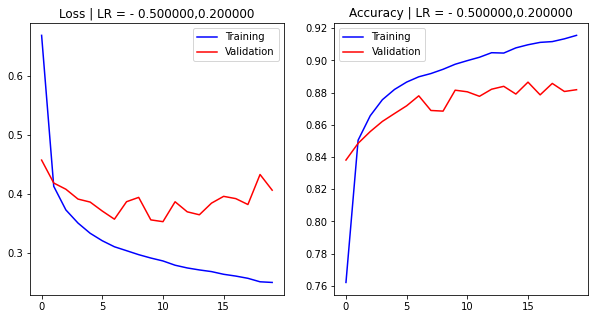

Epoch 0: 0.663737, 0.769760, 0.470710, 0.827900
Epoch 1: 0.410974, 0.852400, 0.424503, 0.846600
Epoch 2: 0.372730, 0.866780, 0.390027, 0.861800
Epoch 3: 0.349058, 0.874260, 0.370450, 0.867400
Epoch 4: 0.331904, 0.881700, 0.370393, 0.874300
Epoch 5: 0.319004, 0.885620, 0.364062, 0.872400
Epoch 6: 0.309779, 0.890280, 0.375211, 0.869800
Epoch 7: 0.303054, 0.892600, 0.367025, 0.874200
Epoch 8: 0.294499, 0.896360, 0.352235, 0.880200
Epoch 9: 0.287384, 0.898040, 0.357742, 0.878900
Epoch 10: 0.283721, 0.900640, 0.411037, 0.868400
Epoch 11: 0.277826, 0.903020, 0.364730, 0.877700
Epoch 12: 0.271477, 0.903220, 0.369733, 0.881300
Epoch 13: 0.265311, 0.906180, 0.359976, 0.882300
Epoch 14: 0.262309, 0.908320, 0.399253, 0.879000
Epoch 15: 0.256104, 0.910860, 0.367627, 0.887000
Epoch 16: 0.255296, 0.910500, 0.374154, 0.884700
Epoch 17: 0.248992, 0.914440, 0.379619, 0.883400
Epoch 18: 0.246683, 0.913600, 0.379333, 0.882700
Epoch 19: 0.243795, 0.915900, 0.380747, 0.884600


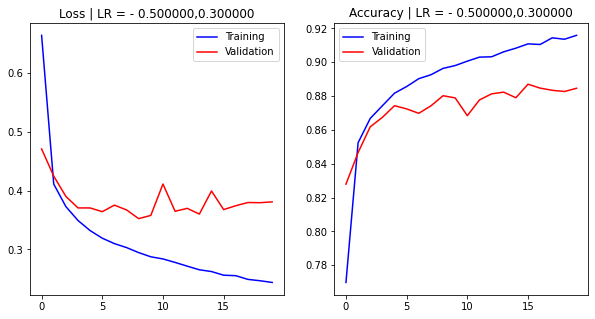

Epoch 0: 0.682997, 0.757820, 0.501875, 0.818400
Epoch 1: 0.414101, 0.850280, 0.418221, 0.848600
Epoch 2: 0.372505, 0.865360, 0.414662, 0.858500
Epoch 3: 0.349292, 0.874040, 0.376448, 0.865100
Epoch 4: 0.331440, 0.881900, 0.367998, 0.869100
Epoch 5: 0.319805, 0.885620, 0.356611, 0.875800
Epoch 6: 0.308479, 0.890140, 0.345812, 0.876100
Epoch 7: 0.299269, 0.893600, 0.352558, 0.877400
Epoch 8: 0.291226, 0.896560, 0.349107, 0.879100
Epoch 9: 0.286128, 0.897400, 0.345736, 0.880400
Epoch 10: 0.278514, 0.900160, 0.345479, 0.884300
Epoch 11: 0.272843, 0.902200, 0.370409, 0.876300
Epoch 12: 0.267419, 0.905380, 0.359775, 0.882300
Epoch 13: 0.262163, 0.906520, 0.360759, 0.883400
Epoch 14: 0.258425, 0.909080, 0.354958, 0.887600
Epoch 15: 0.252742, 0.911240, 0.369114, 0.878800
Epoch 16: 0.248440, 0.913000, 0.361538, 0.881700
Epoch 17: 0.244554, 0.913800, 0.360170, 0.887000
Epoch 18: 0.239400, 0.916240, 0.362595, 0.885800
Epoch 19: 0.234214, 0.917760, 0.389515, 0.882700


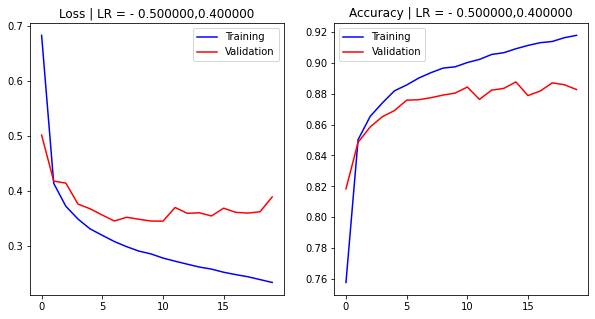

Epoch 0: 0.684362, 0.759380, 0.452147, 0.841900
Epoch 1: 0.409979, 0.853300, 0.425084, 0.850000
Epoch 2: 0.371826, 0.866200, 0.389910, 0.858100
Epoch 3: 0.346691, 0.874920, 0.384467, 0.859500
Epoch 4: 0.329507, 0.882020, 0.376596, 0.860800
Epoch 5: 0.317982, 0.886140, 0.366847, 0.870400
Epoch 6: 0.307864, 0.889140, 0.370527, 0.869500
Epoch 7: 0.299395, 0.892580, 0.388414, 0.864800
Epoch 8: 0.291005, 0.894840, 0.354407, 0.878700
Epoch 9: 0.284399, 0.897760, 0.360603, 0.879100
Epoch 10: 0.278193, 0.901640, 0.371306, 0.875100
Epoch 11: 0.272406, 0.903580, 0.361057, 0.881500
Epoch 12: 0.266783, 0.904500, 0.363502, 0.874400
Epoch 13: 0.262724, 0.906160, 0.349408, 0.881200
Epoch 14: 0.259371, 0.909540, 0.359371, 0.880000
Epoch 15: 0.251654, 0.910980, 0.354182, 0.887000
Epoch 16: 0.248929, 0.912180, 0.369713, 0.880700
Epoch 17: 0.244326, 0.914600, 0.379543, 0.879100
Epoch 18: 0.239845, 0.915140, 0.369482, 0.880400
Epoch 19: 0.236230, 0.918180, 0.373246, 0.881800


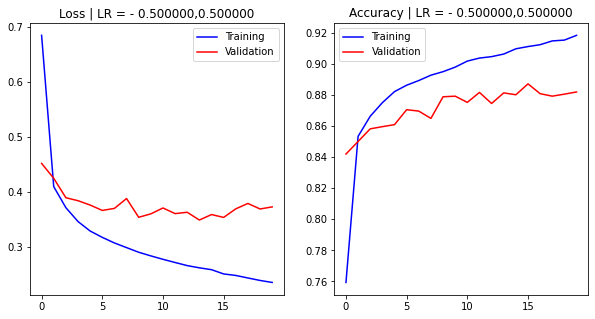

Epoch 0: 0.685751, 0.765600, 0.485094, 0.823200
Epoch 1: 0.411420, 0.852160, 0.431055, 0.845500
Epoch 2: 0.370405, 0.866920, 0.398468, 0.857600
Epoch 3: 0.346853, 0.874680, 0.371013, 0.863900
Epoch 4: 0.329562, 0.882220, 0.377688, 0.865200
Epoch 5: 0.318506, 0.884660, 0.376833, 0.866100
Epoch 6: 0.305627, 0.890540, 0.371633, 0.867900
Epoch 7: 0.295610, 0.892960, 0.357682, 0.868700
Epoch 8: 0.288563, 0.895600, 0.342873, 0.877100
Epoch 9: 0.279621, 0.899600, 0.333461, 0.879500
Epoch 10: 0.271586, 0.903420, 0.359912, 0.876500
Epoch 11: 0.267898, 0.902140, 0.335410, 0.885200
Epoch 12: 0.260253, 0.906800, 0.346161, 0.879800
Epoch 13: 0.255434, 0.907680, 0.376661, 0.874500
Epoch 14: 0.248062, 0.911300, 0.372955, 0.877100
Epoch 15: 0.243595, 0.912600, 0.341468, 0.881200
Epoch 16: 0.239696, 0.914100, 0.341186, 0.883100
Epoch 17: 0.233774, 0.915740, 0.358473, 0.883600
Epoch 18: 0.228305, 0.918760, 0.359582, 0.887100
Epoch 19: 0.225156, 0.918860, 0.367314, 0.883800


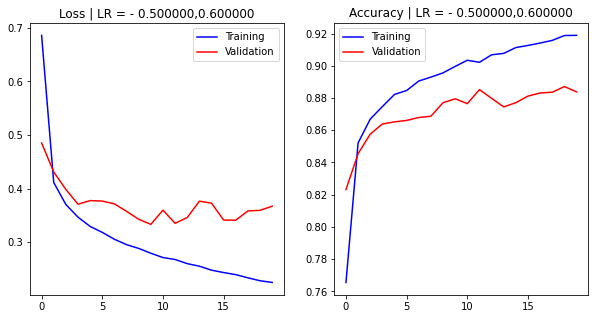

Epoch 0: 0.688753, 0.756660, 0.464650, 0.833100
Epoch 1: 0.408456, 0.852040, 0.420140, 0.845800
Epoch 2: 0.367826, 0.867200, 0.391074, 0.858500
Epoch 3: 0.343269, 0.876480, 0.396542, 0.856200
Epoch 4: 0.327850, 0.881600, 0.392451, 0.859400
Epoch 5: 0.311670, 0.886900, 0.360435, 0.870500
Epoch 6: 0.303537, 0.890000, 0.356927, 0.874800
Epoch 7: 0.293161, 0.894220, 0.340012, 0.879900
Epoch 8: 0.285049, 0.897920, 0.344432, 0.878900
Epoch 9: 0.274572, 0.901380, 0.364585, 0.873100
Epoch 10: 0.266993, 0.902440, 0.328354, 0.882400
Epoch 11: 0.260585, 0.904500, 0.335769, 0.881700
Epoch 12: 0.253633, 0.907560, 0.333446, 0.885700
Epoch 13: 0.247871, 0.909860, 0.393147, 0.863300
Epoch 14: 0.241565, 0.911660, 0.339050, 0.888000
Epoch 15: 0.234560, 0.915740, 0.350133, 0.882900
Epoch 16: 0.229656, 0.915860, 0.347491, 0.885300
Epoch 17: 0.223393, 0.919220, 0.371462, 0.876200
Epoch 18: 0.218410, 0.920720, 0.341461, 0.887700
Epoch 19: 0.213759, 0.922080, 0.350630, 0.883500


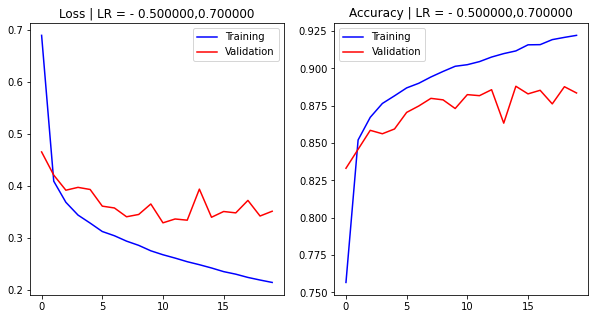

Epoch 0: 0.688397, 0.761720, 0.489177, 0.823000
Epoch 1: 0.410370, 0.851140, 0.413795, 0.853800
Epoch 2: 0.367382, 0.866820, 0.412522, 0.853700
Epoch 3: 0.344655, 0.875060, 0.398658, 0.854000
Epoch 4: 0.325398, 0.881420, 0.370400, 0.867000
Epoch 5: 0.309336, 0.888240, 0.366368, 0.861100
Epoch 6: 0.296759, 0.891620, 0.351299, 0.876900
Epoch 7: 0.287158, 0.895460, 0.345176, 0.877200
Epoch 8: 0.277595, 0.898220, 0.350304, 0.877400
Epoch 9: 0.268770, 0.901580, 0.370923, 0.863200
Epoch 10: 0.260930, 0.904800, 0.334441, 0.882500
Epoch 11: 0.253196, 0.907080, 0.341361, 0.875800
Epoch 12: 0.245317, 0.908320, 0.330735, 0.882900
Epoch 13: 0.237921, 0.912340, 0.337428, 0.883200
Epoch 14: 0.232163, 0.914280, 0.351265, 0.880900
Epoch 15: 0.225435, 0.917660, 0.351340, 0.882200
Epoch 16: 0.219382, 0.919940, 0.322961, 0.888400
Epoch 17: 0.213837, 0.922040, 0.339036, 0.884800
Epoch 18: 0.208370, 0.923980, 0.330215, 0.886100
Epoch 19: 0.203991, 0.925280, 0.375364, 0.880500


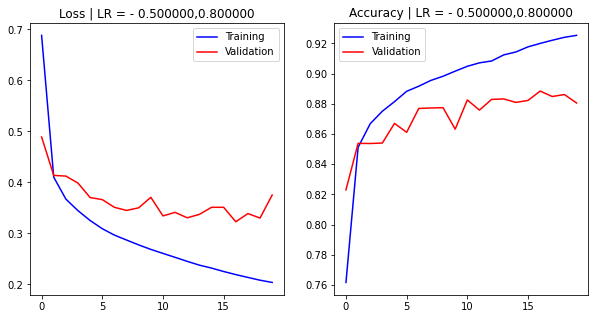

Epoch 0: 0.684685, 0.757040, 0.489421, 0.822300
Epoch 1: 0.405086, 0.852660, 0.422144, 0.846500
Epoch 2: 0.362466, 0.867800, 0.384310, 0.857600
Epoch 3: 0.337025, 0.877500, 0.372018, 0.867500
Epoch 4: 0.317728, 0.884380, 0.347185, 0.872100
Epoch 5: 0.302439, 0.889340, 0.389220, 0.853400
Epoch 6: 0.290655, 0.893500, 0.349135, 0.872600
Epoch 7: 0.279028, 0.897640, 0.360830, 0.872600
Epoch 8: 0.269407, 0.901660, 0.362161, 0.872800
Epoch 9: 0.260030, 0.904020, 0.353590, 0.875100
Epoch 10: 0.250767, 0.907500, 0.324983, 0.883900
Epoch 11: 0.242935, 0.910500, 0.347980, 0.878200
Epoch 12: 0.235962, 0.911760, 0.331669, 0.881400
Epoch 13: 0.227618, 0.915080, 0.333225, 0.882300
Epoch 14: 0.222126, 0.918120, 0.336038, 0.882900
Epoch 15: 0.213651, 0.921380, 0.319977, 0.891400
Epoch 16: 0.206737, 0.923860, 0.326856, 0.887500
Epoch 17: 0.201103, 0.924700, 0.340094, 0.883200
Epoch 18: 0.194839, 0.927640, 0.332667, 0.888900
Epoch 19: 0.188676, 0.929820, 0.335348, 0.885000


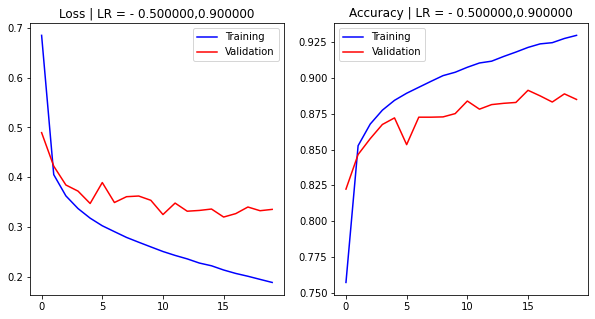

Epoch 0: 0.647859, 0.771300, 0.437069, 0.839600
Epoch 1: 0.396977, 0.854840, 0.379695, 0.862200
Epoch 2: 0.359650, 0.869980, 0.409662, 0.852500
Epoch 3: 0.335230, 0.880360, 0.435143, 0.849900
Epoch 4: 0.322707, 0.884140, 0.426291, 0.854800
Epoch 5: 0.313617, 0.887540, 0.365955, 0.874700
Epoch 6: 0.304650, 0.891000, 0.362571, 0.873200
Epoch 7: 0.301655, 0.892820, 0.360665, 0.876400
Epoch 8: 0.297150, 0.892140, 0.403677, 0.869000
Epoch 9: 0.292594, 0.894540, 0.399936, 0.865000
Epoch 10: 0.291273, 0.895840, 0.411352, 0.868100
Epoch 11: 0.288072, 0.897980, 0.385187, 0.870300
Epoch 12: 0.292910, 0.897740, 0.380973, 0.878400
Epoch 13: 0.288032, 0.898760, 0.400206, 0.874700
Epoch 14: 0.287516, 0.899640, 0.377399, 0.875600
Epoch 15: 0.287787, 0.899260, 0.404986, 0.870900
Epoch 16: 0.284390, 0.900820, 0.404910, 0.871100
Epoch 17: 0.288680, 0.900080, 0.410952, 0.875200
Epoch 18: 0.287603, 0.900720, 0.400836, 0.874300
Epoch 19: 0.285633, 0.902120, 0.436796, 0.872400


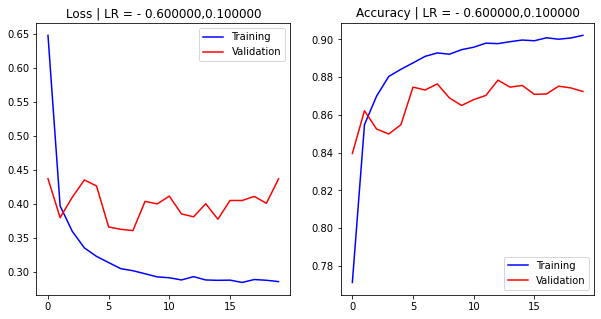

Epoch 0: 0.660114, 0.766460, 0.495102, 0.817900
Epoch 1: 0.409918, 0.850940, 0.398774, 0.859900
Epoch 2: 0.363951, 0.869540, 0.383711, 0.865200
Epoch 3: 0.339195, 0.877940, 0.379775, 0.868200
Epoch 4: 0.322846, 0.885540, 0.366861, 0.869900
Epoch 5: 0.309140, 0.888580, 0.357266, 0.875400
Epoch 6: 0.297636, 0.891800, 0.358506, 0.874700
Epoch 7: 0.289870, 0.894920, 0.365225, 0.876600
Epoch 8: 0.282524, 0.898120, 0.370332, 0.874400
Epoch 9: 0.278864, 0.901080, 0.366892, 0.881200
Epoch 10: 0.269795, 0.903260, 0.354719, 0.884100
Epoch 11: 0.264031, 0.906320, 0.350897, 0.882700
Epoch 12: 0.257912, 0.907700, 0.376115, 0.887200
Epoch 13: 0.254495, 0.909840, 0.361913, 0.883900
Epoch 14: 0.249858, 0.912320, 0.412885, 0.878800
Epoch 15: 0.247080, 0.912440, 0.386014, 0.880700
Epoch 16: 0.242867, 0.914780, 0.454566, 0.878600
Epoch 17: 0.240664, 0.916340, 0.407240, 0.885900
Epoch 18: 0.235211, 0.916900, 0.404358, 0.884500
Epoch 19: 0.232657, 0.917580, 0.389962, 0.888500


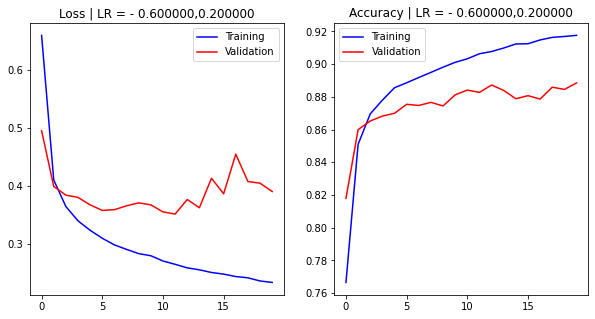

Epoch 0: 0.681586, 0.760300, 0.454407, 0.833300
Epoch 1: 0.410923, 0.850800, 0.425434, 0.847800
Epoch 2: 0.369051, 0.867840, 0.390173, 0.862100
Epoch 3: 0.344661, 0.875680, 0.393470, 0.858600
Epoch 4: 0.326592, 0.883640, 0.363257, 0.871600
Epoch 5: 0.314717, 0.887500, 0.369364, 0.867800
Epoch 6: 0.302181, 0.891240, 0.348420, 0.880200
Epoch 7: 0.292747, 0.895020, 0.348586, 0.877300
Epoch 8: 0.284450, 0.898440, 0.344102, 0.880200
Epoch 9: 0.277269, 0.900360, 0.359156, 0.877800
Epoch 10: 0.268743, 0.903700, 0.369108, 0.876700
Epoch 11: 0.264524, 0.904360, 0.407707, 0.867400
Epoch 12: 0.259664, 0.906920, 0.385890, 0.880700
Epoch 13: 0.254808, 0.910020, 0.365683, 0.879300
Epoch 14: 0.250846, 0.909920, 0.392240, 0.873700
Epoch 15: 0.244403, 0.912500, 0.367104, 0.879400
Epoch 16: 0.238567, 0.915360, 0.394328, 0.878900
Epoch 17: 0.236292, 0.915180, 0.414081, 0.877100
Epoch 18: 0.231165, 0.917940, 0.407477, 0.872800
Epoch 19: 0.229310, 0.918580, 0.402600, 0.884400


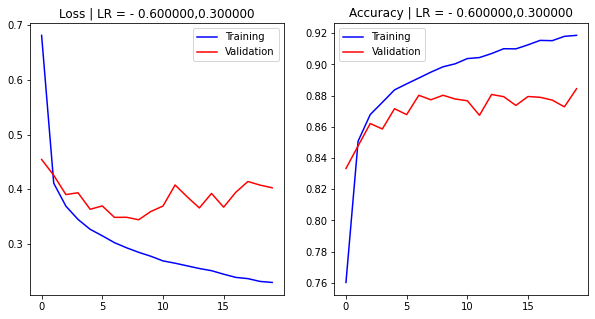

Epoch 0: 0.671522, 0.766760, 0.470385, 0.830600
Epoch 1: 0.407546, 0.853720, 0.416418, 0.851900
Epoch 2: 0.366136, 0.866960, 0.385052, 0.864900
Epoch 3: 0.339673, 0.878140, 0.391985, 0.858700
Epoch 4: 0.324558, 0.883540, 0.407287, 0.858400
Epoch 5: 0.310674, 0.889120, 0.364329, 0.869500
Epoch 6: 0.302161, 0.891780, 0.378004, 0.869400
Epoch 7: 0.291196, 0.894780, 0.370021, 0.872100
Epoch 8: 0.284168, 0.898140, 0.384021, 0.875100
Epoch 9: 0.276253, 0.901120, 0.365405, 0.876100
Epoch 10: 0.270417, 0.903700, 0.359375, 0.875900
Epoch 11: 0.263493, 0.906020, 0.370378, 0.871300
Epoch 12: 0.258568, 0.907580, 0.346464, 0.885200
Epoch 13: 0.253471, 0.908600, 0.344056, 0.887900
Epoch 14: 0.245600, 0.913340, 0.367157, 0.886300
Epoch 15: 0.242091, 0.914480, 0.394549, 0.879700
Epoch 16: 0.238385, 0.914740, 0.350703, 0.887900
Epoch 17: 0.232170, 0.918180, 0.362458, 0.886900
Epoch 18: 0.228850, 0.919320, 0.390735, 0.885000
Epoch 19: 0.224172, 0.920840, 0.383525, 0.888800


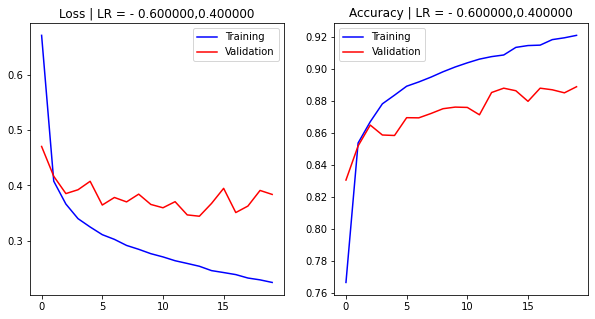

Epoch 0: 0.685211, 0.756520, 0.455531, 0.838400
Epoch 1: 0.407968, 0.852680, 0.432366, 0.845100
Epoch 2: 0.367972, 0.865960, 0.425202, 0.855200
Epoch 3: 0.345342, 0.875080, 0.370497, 0.869000
Epoch 4: 0.327718, 0.881160, 0.358091, 0.874600
Epoch 5: 0.315134, 0.886180, 0.373493, 0.866700
Epoch 6: 0.303967, 0.890480, 0.371168, 0.868900
Epoch 7: 0.296130, 0.891560, 0.365364, 0.867400
Epoch 8: 0.287010, 0.895800, 0.346105, 0.880000
Epoch 9: 0.280139, 0.899120, 0.346285, 0.880100
Epoch 10: 0.272056, 0.902540, 0.365062, 0.867100
Epoch 11: 0.267995, 0.903700, 0.374010, 0.873500
Epoch 12: 0.260294, 0.906300, 0.365796, 0.878300
Epoch 13: 0.255197, 0.908880, 0.333311, 0.885900
Epoch 14: 0.248636, 0.910160, 0.362360, 0.881400
Epoch 15: 0.246220, 0.911500, 0.335336, 0.888200
Epoch 16: 0.239940, 0.914520, 0.365319, 0.880700
Epoch 17: 0.234616, 0.916460, 0.370778, 0.874500
Epoch 18: 0.228294, 0.918520, 0.380982, 0.878400
Epoch 19: 0.223997, 0.919200, 0.365131, 0.885200


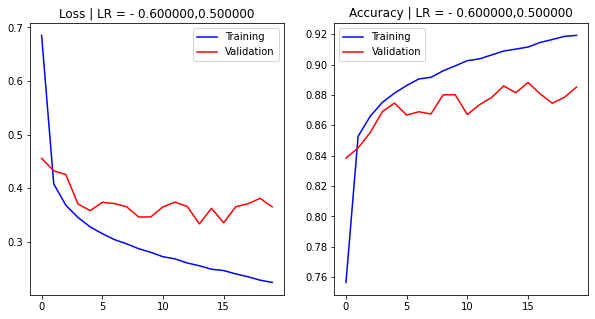

Epoch 0: 0.680072, 0.766500, 0.476980, 0.831200
Epoch 1: 0.411385, 0.851260, 0.412552, 0.847800
Epoch 2: 0.370571, 0.866240, 0.405554, 0.852200
Epoch 3: 0.345008, 0.874800, 0.370535, 0.864400
Epoch 4: 0.328165, 0.882200, 0.364865, 0.863800
Epoch 5: 0.313813, 0.885980, 0.349238, 0.875900
Epoch 6: 0.303380, 0.889480, 0.364174, 0.867100
Epoch 7: 0.291638, 0.895060, 0.355987, 0.875900
Epoch 8: 0.283296, 0.898080, 0.351532, 0.874700
Epoch 9: 0.275434, 0.901640, 0.353545, 0.875400
Epoch 10: 0.268194, 0.903320, 0.337756, 0.880000
Epoch 11: 0.258333, 0.905980, 0.344842, 0.880000
Epoch 12: 0.254748, 0.908180, 0.339971, 0.882500
Epoch 13: 0.246400, 0.911080, 0.341154, 0.883900
Epoch 14: 0.240805, 0.913400, 0.340069, 0.882900
Epoch 15: 0.234626, 0.915180, 0.385472, 0.872700
Epoch 16: 0.231035, 0.917000, 0.343284, 0.883900
Epoch 17: 0.225354, 0.917980, 0.326767, 0.888900
Epoch 18: 0.219922, 0.920460, 0.375347, 0.881500
Epoch 19: 0.215148, 0.922200, 0.359425, 0.885400


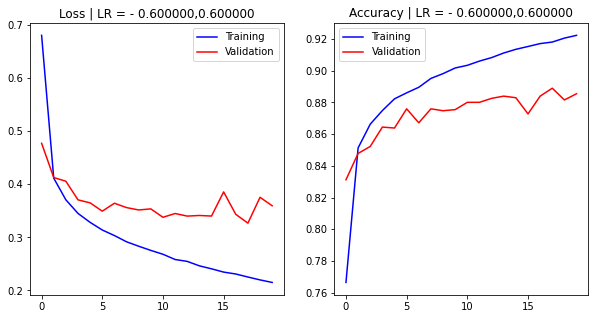

Epoch 0: 0.684469, 0.761660, 0.461250, 0.836300
Epoch 1: 0.413010, 0.850480, 0.422730, 0.845000
Epoch 2: 0.370819, 0.865020, 0.388550, 0.860500
Epoch 3: 0.343263, 0.876860, 0.395956, 0.857500
Epoch 4: 0.327233, 0.881460, 0.379334, 0.863500
Epoch 5: 0.312867, 0.886960, 0.377678, 0.864600
Epoch 6: 0.302040, 0.890620, 0.356320, 0.871800
Epoch 7: 0.290858, 0.893660, 0.332650, 0.882700
Epoch 8: 0.279472, 0.897000, 0.358200, 0.876100
Epoch 9: 0.272685, 0.900700, 0.332702, 0.884000
Epoch 10: 0.264876, 0.903020, 0.340106, 0.885200
Epoch 11: 0.257579, 0.905760, 0.358188, 0.876900
Epoch 12: 0.249626, 0.908040, 0.349750, 0.882300
Epoch 13: 0.243835, 0.910120, 0.328038, 0.886600
Epoch 14: 0.238290, 0.912900, 0.342445, 0.883200
Epoch 15: 0.233159, 0.915140, 0.329386, 0.887000
Epoch 16: 0.226015, 0.916700, 0.329066, 0.885700
Epoch 17: 0.220166, 0.920100, 0.372084, 0.877100
Epoch 18: 0.214431, 0.922380, 0.342375, 0.887700
Epoch 19: 0.210686, 0.922880, 0.335552, 0.887300


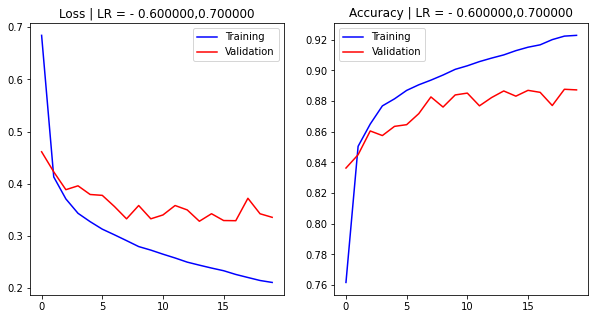

Epoch 0: 0.685263, 0.760420, 0.484835, 0.825500
Epoch 1: 0.407490, 0.850800, 0.411579, 0.850000
Epoch 2: 0.364345, 0.867240, 0.404716, 0.857900
Epoch 3: 0.338523, 0.877840, 0.396566, 0.856300
Epoch 4: 0.321916, 0.882380, 0.375510, 0.868600
Epoch 5: 0.307239, 0.887560, 0.365010, 0.871000
Epoch 6: 0.297054, 0.891320, 0.346353, 0.875200
Epoch 7: 0.284651, 0.895340, 0.346454, 0.877100
Epoch 8: 0.276504, 0.899300, 0.347817, 0.877800
Epoch 9: 0.269154, 0.900880, 0.337105, 0.878900
Epoch 10: 0.258972, 0.904880, 0.333305, 0.882500
Epoch 11: 0.253658, 0.907060, 0.366423, 0.871600
Epoch 12: 0.244830, 0.909420, 0.355066, 0.879300
Epoch 13: 0.236425, 0.912220, 0.346349, 0.884300
Epoch 14: 0.230950, 0.915000, 0.329657, 0.886000
Epoch 15: 0.224673, 0.917600, 0.346489, 0.881700
Epoch 16: 0.218409, 0.919800, 0.339394, 0.883000
Epoch 17: 0.213000, 0.920460, 0.342803, 0.886000
Epoch 18: 0.207582, 0.923620, 0.341056, 0.887700
Epoch 19: 0.202234, 0.925320, 0.350507, 0.885100


Epoch 0: 0.698161, 0.753560, 0.467165, 0.829100
Epoch 1: 0.412582, 0.851280, 0.426055, 0.846200
Epoch 2: 0.367123, 0.867180, 0.418885, 0.852300
Epoch 3: 0.340517, 0.875800, 0.366528, 0.866200
Epoch 4: 0.320623, 0.884080, 0.364080, 0.864000
Epoch 5: 0.306519, 0.888160, 0.345733, 0.873200
Epoch 6: 0.292190, 0.893960, 0.364076, 0.863200
Epoch 7: 0.281927, 0.897100, 0.363173, 0.866600
Epoch 8: 0.271714, 0.900420, 0.354140, 0.868000
Epoch 9: 0.261319, 0.903840, 0.334464, 0.879300
Epoch 10: 0.253658, 0.906720, 0.343266, 0.876100
Epoch 11: 0.243274, 0.909980, 0.344774, 0.879700
Epoch 12: 0.237138, 0.911860, 0.328926, 0.883600
Epoch 13: 0.229377, 0.914840, 0.314335, 0.890100
Epoch 14: 0.220791, 0.918980, 0.322975, 0.887400
Epoch 15: 0.215004, 0.920740, 0.331820, 0.881400
Epoch 16: 0.208503, 0.923500, 0.331145, 0.884100
Epoch 17: 0.200955, 0.925020, 0.334213, 0.887500
Epoch 18: 0.196201, 0.927000, 0.344789, 0.886600
Epoch 19: 0.188997, 0.929340, 0.361736, 0.876300


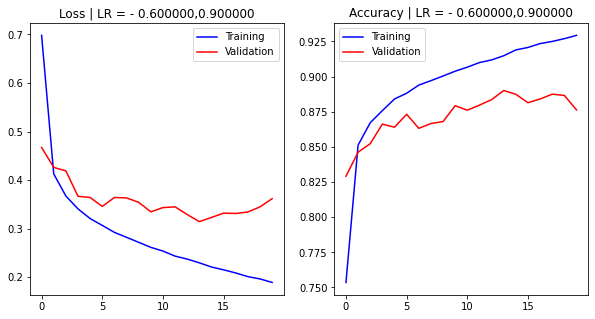

Epoch 0: 0.647916, 0.766500, 0.438744, 0.842600
Epoch 1: 0.398618, 0.854280, 0.393121, 0.856200
Epoch 2: 0.363377, 0.868420, 0.402801, 0.850100
Epoch 3: 0.346847, 0.872820, 0.374928, 0.866000
Epoch 4: 0.334356, 0.880580, 0.393527, 0.859600
Epoch 5: 0.330468, 0.881980, 0.387086, 0.864300
Epoch 6: 0.322712, 0.883000, 0.382383, 0.858900
Epoch 7: 0.319539, 0.884440, 0.362057, 0.869000
Epoch 8: 0.319625, 0.884160, 0.373115, 0.867800
Epoch 9: 0.307001, 0.887860, 0.379806, 0.864700
Epoch 10: 0.305533, 0.888840, 0.371349, 0.868200
Epoch 11: 0.300030, 0.890400, 0.380686, 0.870600
Epoch 12: 0.296036, 0.892320, 0.386446, 0.871300
Epoch 13: 0.292280, 0.894180, 0.393293, 0.864300
Epoch 14: 0.296478, 0.891140, 0.384145, 0.866100
Epoch 15: 0.298492, 0.893860, 0.405531, 0.859100
Epoch 16: 0.302057, 0.891020, 0.403862, 0.865500
Epoch 17: 0.295123, 0.894180, 0.392587, 0.865700
Epoch 18: 0.300625, 0.891420, 0.400515, 0.864800
Epoch 19: 0.294614, 0.893080, 0.392641, 0.869700


Epoch 0: 0.654002, 0.768140, 0.490319, 0.817400
Epoch 1: 0.401454, 0.854440, 0.417085, 0.847300
Epoch 2: 0.358881, 0.869340, 0.391130, 0.863300
Epoch 3: 0.333823, 0.879000, 0.385246, 0.865700
Epoch 4: 0.319606, 0.884000, 0.366091, 0.869800
Epoch 5: 0.304458, 0.889440, 0.352880, 0.872900
Epoch 6: 0.296304, 0.891820, 0.363380, 0.872000
Epoch 7: 0.294236, 0.894040, 0.371883, 0.869500
Epoch 8: 0.284866, 0.896100, 0.347215, 0.880400
Epoch 9: 0.277327, 0.900280, 0.335094, 0.885000
Epoch 10: 0.269781, 0.903100, 0.351142, 0.884200
Epoch 11: 0.271049, 0.903200, 0.367970, 0.877000
Epoch 12: 0.270097, 0.903340, 0.368143, 0.876500
Epoch 13: 0.264124, 0.904400, 0.375636, 0.876000
Epoch 14: 0.262918, 0.905440, 0.394002, 0.872300
Epoch 15: 0.257842, 0.906860, 0.383861, 0.872900
Epoch 16: 0.259960, 0.906900, 0.402734, 0.877600
Epoch 17: 0.255462, 0.909860, 0.384707, 0.880000
Epoch 18: 0.254701, 0.908840, 0.407156, 0.875100
Epoch 19: 0.257001, 0.910460, 0.389192, 0.881400


Epoch 0: 0.651783, 0.769300, 0.431435, 0.842900
Epoch 1: 0.401585, 0.855160, 0.424444, 0.842100
Epoch 2: 0.360315, 0.869220, 0.396721, 0.856100
Epoch 3: 0.334208, 0.878720, 0.375194, 0.864700
Epoch 4: 0.317080, 0.883260, 0.368566, 0.868200
Epoch 5: 0.303774, 0.889720, 0.359223, 0.874000
Epoch 6: 0.290576, 0.894420, 0.344145, 0.880300
Epoch 7: 0.278483, 0.898760, 0.353383, 0.882600
Epoch 8: 0.271065, 0.900960, 0.344506, 0.883400
Epoch 9: 0.263081, 0.903640, 0.361545, 0.877400
Epoch 10: 0.258032, 0.907260, 0.352135, 0.881600
Epoch 11: 0.249778, 0.908600, 0.375908, 0.877700
Epoch 12: 0.245359, 0.911180, 0.364978, 0.881000
Epoch 13: 0.236354, 0.914340, 0.357476, 0.883100
Epoch 14: 0.237538, 0.914400, 0.344906, 0.889300
Epoch 15: 0.232163, 0.916920, 0.379172, 0.882900
Epoch 16: 0.230062, 0.917280, 0.372644, 0.887000
Epoch 17: 0.224296, 0.919620, 0.364045, 0.889800
Epoch 18: 0.220098, 0.921620, 0.394343, 0.882500
Epoch 19: 0.217805, 0.921820, 0.386040, 0.887000


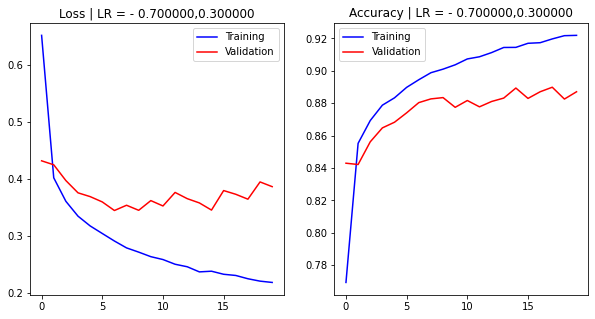

Epoch 0: 0.661688, 0.764680, 0.456158, 0.837200
Epoch 1: 0.401526, 0.853400, 0.394545, 0.857600
Epoch 2: 0.361792, 0.868180, 0.379560, 0.863200
Epoch 3: 0.334828, 0.878700, 0.370249, 0.866700
Epoch 4: 0.318445, 0.885420, 0.371472, 0.870200
Epoch 5: 0.303438, 0.889760, 0.368152, 0.865800
Epoch 6: 0.292797, 0.893700, 0.359043, 0.876500
Epoch 7: 0.282860, 0.897200, 0.366478, 0.875300
Epoch 8: 0.275896, 0.900800, 0.344136, 0.883000
Epoch 9: 0.266784, 0.903660, 0.357404, 0.878100
Epoch 10: 0.259792, 0.906480, 0.383809, 0.873800
Epoch 11: 0.252106, 0.908400, 0.356159, 0.882000
Epoch 12: 0.244059, 0.911160, 0.368687, 0.879400
Epoch 13: 0.240087, 0.912240, 0.348272, 0.887300
Epoch 14: 0.232104, 0.916280, 0.348481, 0.887800
Epoch 15: 0.228264, 0.916880, 0.349524, 0.887500
Epoch 16: 0.220375, 0.920400, 0.375233, 0.879100
Epoch 17: 0.216253, 0.921000, 0.378164, 0.885100
Epoch 18: 0.212947, 0.923220, 0.376405, 0.886900
Epoch 19: 0.206758, 0.925340, 0.369504, 0.889000


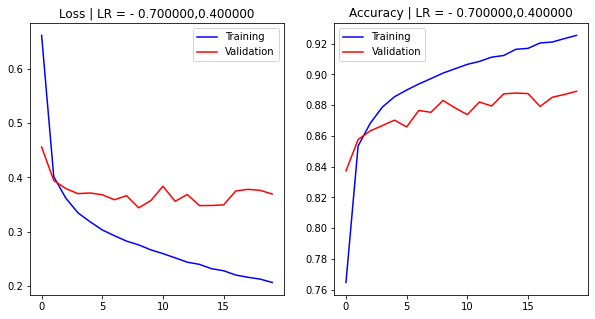

Epoch 0: 0.674309, 0.762140, 0.458913, 0.835800
Epoch 1: 0.406525, 0.852900, 0.428739, 0.847300
Epoch 2: 0.362295, 0.870220, 0.376560, 0.864200
Epoch 3: 0.338128, 0.878020, 0.374408, 0.865200
Epoch 4: 0.321914, 0.885500, 0.362350, 0.869700
Epoch 5: 0.306110, 0.888960, 0.364587, 0.870400
Epoch 6: 0.295419, 0.891640, 0.366982, 0.867500
Epoch 7: 0.284607, 0.896000, 0.369628, 0.872100
Epoch 8: 0.276499, 0.900200, 0.340419, 0.878200
Epoch 9: 0.268033, 0.902960, 0.337237, 0.883200
Epoch 10: 0.257979, 0.906800, 0.346657, 0.881300
Epoch 11: 0.251831, 0.908380, 0.349666, 0.879200
Epoch 12: 0.243886, 0.912000, 0.325989, 0.888700
Epoch 13: 0.237509, 0.913480, 0.335741, 0.887100
Epoch 14: 0.232579, 0.914900, 0.339987, 0.889800
Epoch 15: 0.226496, 0.917940, 0.381287, 0.878000
Epoch 16: 0.223036, 0.918940, 0.342910, 0.889000
Epoch 17: 0.215749, 0.922120, 0.350029, 0.889500
Epoch 18: 0.211878, 0.923140, 0.338279, 0.889800
Epoch 19: 0.206551, 0.924340, 0.371088, 0.885600


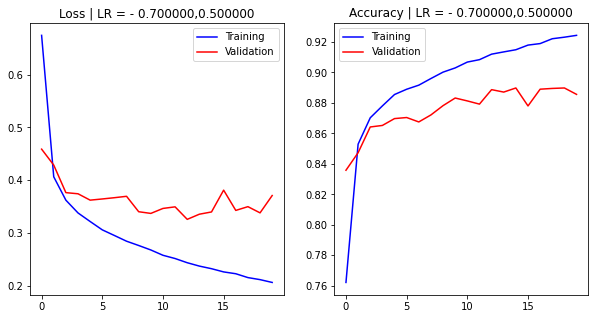

Epoch 0: 0.673269, 0.761300, 0.451799, 0.840800
Epoch 1: 0.403784, 0.854640, 0.399523, 0.855900
Epoch 2: 0.361534, 0.868960, 0.384894, 0.862900
Epoch 3: 0.337908, 0.878880, 0.371029, 0.864600
Epoch 4: 0.320961, 0.884220, 0.357492, 0.869200
Epoch 5: 0.305736, 0.889320, 0.346269, 0.875300
Epoch 6: 0.294132, 0.893440, 0.339962, 0.877000
Epoch 7: 0.285250, 0.896020, 0.338179, 0.879300
Epoch 8: 0.277266, 0.898760, 0.336832, 0.878700
Epoch 9: 0.268556, 0.902240, 0.340085, 0.878100
Epoch 10: 0.261082, 0.904260, 0.345644, 0.878300
Epoch 11: 0.254606, 0.908120, 0.379199, 0.872000
Epoch 12: 0.244936, 0.909680, 0.340569, 0.880600
Epoch 13: 0.241281, 0.911520, 0.353858, 0.881800
Epoch 14: 0.234177, 0.914640, 0.356049, 0.881000
Epoch 15: 0.227150, 0.917380, 0.358800, 0.879500
Epoch 16: 0.224195, 0.919220, 0.329781, 0.887300
Epoch 17: 0.217789, 0.921260, 0.401157, 0.866500
Epoch 18: 0.211907, 0.922800, 0.372382, 0.882700
Epoch 19: 0.207277, 0.923260, 0.362740, 0.888900


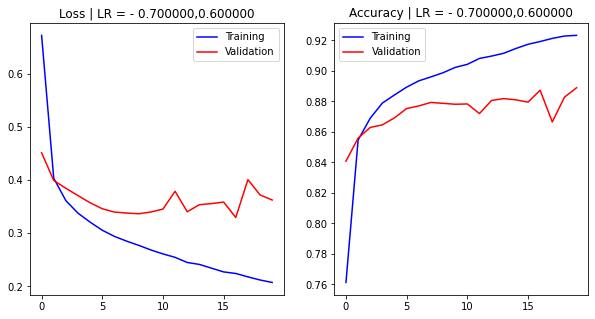

Epoch 0: 0.678542, 0.765960, 0.477591, 0.831400
Epoch 1: 0.408369, 0.852420, 0.409021, 0.852200
Epoch 2: 0.364086, 0.868020, 0.369764, 0.866000
Epoch 3: 0.338615, 0.877020, 0.378890, 0.864300
Epoch 4: 0.318950, 0.884680, 0.389498, 0.858300
Epoch 5: 0.306856, 0.889000, 0.387614, 0.861800
Epoch 6: 0.295202, 0.892920, 0.346740, 0.873800
Epoch 7: 0.285183, 0.894700, 0.342245, 0.872100
Epoch 8: 0.274366, 0.899980, 0.354491, 0.871200
Epoch 9: 0.265716, 0.903360, 0.344146, 0.880600
Epoch 10: 0.258496, 0.905020, 0.327391, 0.884000
Epoch 11: 0.248698, 0.907680, 0.343118, 0.881900
Epoch 12: 0.244398, 0.910180, 0.334274, 0.881200
Epoch 13: 0.235796, 0.912260, 0.325004, 0.883800
Epoch 14: 0.230541, 0.914660, 0.319219, 0.888200
Epoch 15: 0.223032, 0.917680, 0.341001, 0.883000
Epoch 16: 0.218005, 0.919300, 0.336550, 0.884500
Epoch 17: 0.211068, 0.921800, 0.333528, 0.887900
Epoch 18: 0.206200, 0.923300, 0.336012, 0.886900
Epoch 19: 0.204270, 0.925740, 0.345895, 0.885100


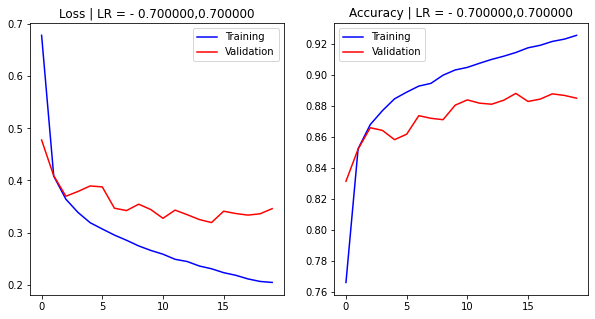

Epoch 0: 0.687880, 0.758200, 0.475229, 0.831000
Epoch 1: 0.410079, 0.851920, 0.442959, 0.842100
Epoch 2: 0.365259, 0.867060, 0.393311, 0.858400
Epoch 3: 0.339751, 0.877620, 0.379988, 0.864700
Epoch 4: 0.322056, 0.881980, 0.351061, 0.873900
Epoch 5: 0.306172, 0.888360, 0.345310, 0.877300
Epoch 6: 0.293989, 0.890880, 0.370890, 0.872200
Epoch 7: 0.282319, 0.897780, 0.367356, 0.867800
Epoch 8: 0.273074, 0.900580, 0.339411, 0.874900
Epoch 9: 0.263766, 0.903380, 0.367262, 0.874400
Epoch 10: 0.254933, 0.905740, 0.353104, 0.876000
Epoch 11: 0.247210, 0.908180, 0.340913, 0.876800
Epoch 12: 0.240548, 0.911160, 0.345402, 0.879600
Epoch 13: 0.233204, 0.914560, 0.327289, 0.886300
Epoch 14: 0.225949, 0.917140, 0.345759, 0.884300
Epoch 15: 0.220945, 0.917680, 0.346511, 0.881200
Epoch 16: 0.213346, 0.921720, 0.326753, 0.888700
Epoch 17: 0.208677, 0.923440, 0.346370, 0.884600
Epoch 18: 0.204314, 0.924540, 0.338911, 0.887200
Epoch 19: 0.196853, 0.927540, 0.359727, 0.880600


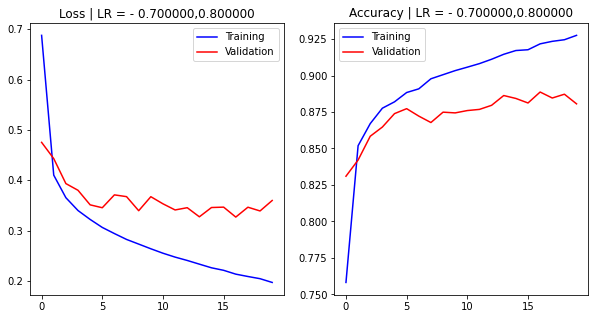

Epoch 0: 0.686627, 0.762520, 0.466517, 0.829400
Epoch 1: 0.405108, 0.852780, 0.418442, 0.849800
Epoch 2: 0.363933, 0.868920, 0.384970, 0.860700
Epoch 3: 0.337307, 0.877320, 0.360513, 0.867200
Epoch 4: 0.318035, 0.885260, 0.348378, 0.872300
Epoch 5: 0.303879, 0.889420, 0.397480, 0.856500
Epoch 6: 0.289667, 0.894060, 0.363009, 0.870300
Epoch 7: 0.279580, 0.897100, 0.342805, 0.878900
Epoch 8: 0.269569, 0.899660, 0.338639, 0.875200
Epoch 9: 0.259035, 0.904340, 0.353727, 0.870700
Epoch 10: 0.249491, 0.908640, 0.340447, 0.871500
Epoch 11: 0.243646, 0.909540, 0.347080, 0.872900
Epoch 12: 0.234611, 0.913120, 0.338114, 0.881400
Epoch 13: 0.227082, 0.916200, 0.340579, 0.880100
Epoch 14: 0.221657, 0.917480, 0.342422, 0.880900
Epoch 15: 0.214193, 0.920840, 0.341332, 0.883200
Epoch 16: 0.207459, 0.923440, 0.318276, 0.887900
Epoch 17: 0.202161, 0.924760, 0.345688, 0.881000
Epoch 18: 0.194855, 0.928580, 0.330773, 0.889000
Epoch 19: 0.189892, 0.929780, 0.327181, 0.890000


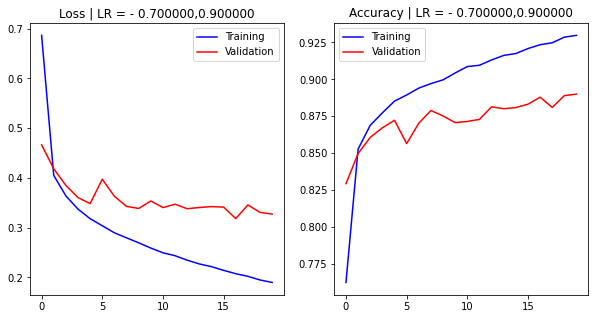

Epoch 0: 0.648689, 0.763820, 0.428925, 0.841700
Epoch 1: 0.421529, 0.848660, 0.392408, 0.861000
Epoch 2: 0.387516, 0.860740, 0.405285, 0.855300
Epoch 3: 0.484580, 0.838540, 0.482713, 0.846700
Epoch 4: 0.415173, 0.857000, 0.432669, 0.847500
Epoch 5: 0.394635, 0.859900, 0.410359, 0.853600
Epoch 6: 0.376275, 0.865700, 0.417425, 0.849800
Epoch 7: 0.377362, 0.865480, 0.433996, 0.843600
Epoch 8: 0.388289, 0.860320, 0.454851, 0.837200
Epoch 9: 0.375705, 0.865860, 0.423488, 0.847800
Epoch 10: 0.377235, 0.865500, 0.441206, 0.844300
Epoch 11: 0.390362, 0.860620, 0.447303, 0.843300
Epoch 12: 0.388986, 0.860800, 0.462526, 0.840500
Epoch 13: 0.383423, 0.861940, 0.456802, 0.840200
Epoch 14: 0.384066, 0.862940, 0.436316, 0.845900
Epoch 15: 0.417744, 0.858220, 0.459402, 0.836500
Epoch 16: 0.417589, 0.854080, 0.469209, 0.834200
Epoch 17: 0.410970, 0.855720, 0.454773, 0.836800
Epoch 18: 0.419071, 0.852160, 0.481956, 0.837200
Epoch 19: 0.429806, 0.849700, 0.474374, 0.839700


Epoch 0: 0.646520, 0.767640, 0.435233, 0.842700
Epoch 1: 0.398114, 0.856140, 0.393790, 0.851700
Epoch 2: 0.360622, 0.870360, 0.373156, 0.867500
Epoch 3: 0.337966, 0.877200, 0.366525, 0.867900
Epoch 4: 0.328204, 0.881080, 0.370252, 0.868200
Epoch 5: 0.319877, 0.884120, 0.371661, 0.865200
Epoch 6: 0.312950, 0.887320, 0.364971, 0.869600
Epoch 7: 0.311903, 0.888880, 0.365452, 0.867900
Epoch 8: 0.305918, 0.888920, 0.374721, 0.872300
Epoch 9: 0.303276, 0.889900, 0.360806, 0.870600
Epoch 10: 0.293205, 0.893240, 0.353462, 0.872500
Epoch 11: 0.309139, 0.889320, 0.360432, 0.871700
Epoch 12: 0.290597, 0.894060, 0.373765, 0.871800
Epoch 13: 0.288923, 0.894000, 0.411763, 0.858300
Epoch 14: 0.285222, 0.896820, 0.384928, 0.870800
Epoch 15: 0.282206, 0.897980, 0.396087, 0.862200
Epoch 16: 0.293153, 0.895740, 0.380999, 0.869400
Epoch 17: 0.286891, 0.896360, 0.386922, 0.867200
Epoch 18: 0.293791, 0.893180, 0.384338, 0.869500
Epoch 19: 0.292798, 0.897120, 0.377683, 0.869800


Epoch 0: 0.668706, 0.756820, 0.456339, 0.833400
Epoch 1: 0.399264, 0.854200, 0.400383, 0.858200
Epoch 2: 0.356409, 0.869440, 0.371368, 0.866000
Epoch 3: 0.332488, 0.879340, 0.389038, 0.864400
Epoch 4: 0.313622, 0.886140, 0.380317, 0.861700
Epoch 5: 0.301881, 0.889140, 0.346825, 0.878500
Epoch 6: 0.290956, 0.894580, 0.373255, 0.868800
Epoch 7: 0.283923, 0.896200, 0.347010, 0.876600
Epoch 8: 0.278909, 0.897940, 0.371470, 0.871100
Epoch 9: 0.268815, 0.901420, 0.333607, 0.880500
Epoch 10: 0.263947, 0.902760, 0.363962, 0.874900
Epoch 11: 0.259319, 0.904580, 0.350933, 0.880100
Epoch 12: 0.257799, 0.904880, 0.348937, 0.881800
Epoch 13: 0.258495, 0.905660, 0.374103, 0.874900
Epoch 14: 0.254929, 0.906120, 0.377795, 0.871500
Epoch 15: 0.249954, 0.908620, 0.365404, 0.876400
Epoch 16: 0.244190, 0.909720, 0.355931, 0.881700
Epoch 17: 0.241184, 0.909900, 0.347576, 0.883900
Epoch 18: 0.233192, 0.914120, 0.389622, 0.877900
Epoch 19: 0.231771, 0.914980, 0.370130, 0.877300


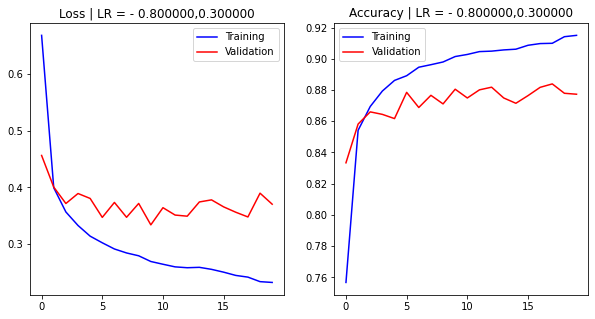

Epoch 0: 0.669214, 0.758220, 0.454792, 0.837300
Epoch 1: 0.402505, 0.853920, 0.396045, 0.858900
Epoch 2: 0.356178, 0.870140, 0.371231, 0.867900
Epoch 3: 0.328236, 0.880640, 0.387807, 0.858400
Epoch 4: 0.308335, 0.886980, 0.350945, 0.870200
Epoch 5: 0.294975, 0.891920, 0.350991, 0.873000
Epoch 6: 0.281247, 0.895820, 0.339647, 0.877200
Epoch 7: 0.269317, 0.899400, 0.332535, 0.883000
Epoch 8: 0.265037, 0.901820, 0.342111, 0.880400
Epoch 9: 0.255658, 0.905180, 0.334249, 0.883600
Epoch 10: 0.247306, 0.908880, 0.361643, 0.874100
Epoch 11: 0.242750, 0.909100, 0.345550, 0.884200
Epoch 12: 0.235066, 0.913400, 0.346631, 0.883000
Epoch 13: 0.226403, 0.916780, 0.338724, 0.886900
Epoch 14: 0.224292, 0.917840, 0.356183, 0.883100
Epoch 15: 0.216045, 0.919900, 0.396187, 0.872200
Epoch 16: 0.214207, 0.921180, 0.372075, 0.881500
Epoch 17: 0.207377, 0.923580, 0.390661, 0.871400
Epoch 18: 0.207831, 0.923500, 0.360968, 0.889800
Epoch 19: 0.206136, 0.923540, 0.357966, 0.884400


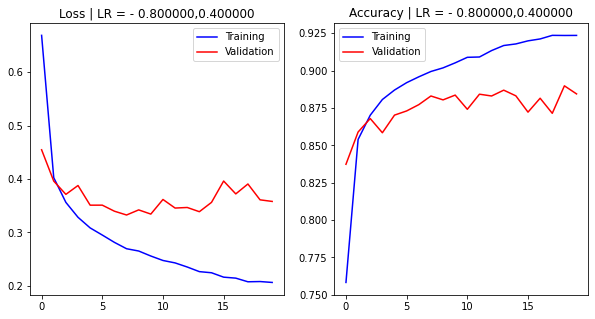

Epoch 0: 0.665992, 0.766360, 0.441105, 0.844200
Epoch 1: 0.405011, 0.854440, 0.406903, 0.853200
Epoch 2: 0.359363, 0.869640, 0.383518, 0.862900
Epoch 3: 0.333914, 0.879460, 0.404468, 0.860200
Epoch 4: 0.314923, 0.886620, 0.367535, 0.872300
Epoch 5: 0.303592, 0.889660, 0.352065, 0.871600
Epoch 6: 0.288671, 0.894020, 0.340741, 0.879200
Epoch 7: 0.277553, 0.897740, 0.334981, 0.882000
Epoch 8: 0.267392, 0.902860, 0.347538, 0.878600
Epoch 9: 0.256806, 0.904300, 0.353667, 0.878000
Epoch 10: 0.248319, 0.908960, 0.344326, 0.884300
Epoch 11: 0.239950, 0.912140, 0.327582, 0.885100
Epoch 12: 0.232881, 0.915480, 0.350983, 0.881000
Epoch 13: 0.226310, 0.916220, 0.347192, 0.885000
Epoch 14: 0.220280, 0.918380, 0.327418, 0.891700
Epoch 15: 0.213989, 0.921140, 0.370747, 0.883400
Epoch 16: 0.208965, 0.923600, 0.380861, 0.880100
Epoch 17: 0.202870, 0.925500, 0.359322, 0.890700
Epoch 18: 0.197346, 0.926460, 0.375777, 0.887000
Epoch 19: 0.192781, 0.928740, 0.361139, 0.886700


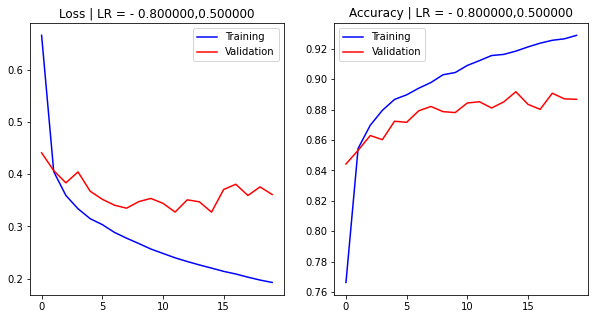

Epoch 0: 0.688622, 0.758080, 0.473713, 0.831200
Epoch 1: 0.405436, 0.853400, 0.396249, 0.852000
Epoch 2: 0.360504, 0.870060, 0.376861, 0.862600
Epoch 3: 0.336570, 0.877900, 0.366715, 0.868100
Epoch 4: 0.314780, 0.886160, 0.354581, 0.869600
Epoch 5: 0.302864, 0.890220, 0.343469, 0.874600
Epoch 6: 0.289288, 0.895300, 0.338502, 0.878900
Epoch 7: 0.279377, 0.898260, 0.332335, 0.880000
Epoch 8: 0.269496, 0.901080, 0.338403, 0.878900
Epoch 9: 0.260681, 0.903720, 0.323437, 0.885700
Epoch 10: 0.251187, 0.907940, 0.334298, 0.886200
Epoch 11: 0.243137, 0.910520, 0.321297, 0.889600
Epoch 12: 0.233673, 0.915360, 0.328625, 0.887000
Epoch 13: 0.227284, 0.916160, 0.319210, 0.894600
Epoch 14: 0.221259, 0.919440, 0.324727, 0.891800
Epoch 15: 0.214801, 0.920940, 0.352993, 0.880900
Epoch 16: 0.210414, 0.923320, 0.330084, 0.889700
Epoch 17: 0.203993, 0.924580, 0.367506, 0.881900
Epoch 18: 0.198089, 0.927180, 0.324892, 0.892100
Epoch 19: 0.191730, 0.929100, 0.362776, 0.886500


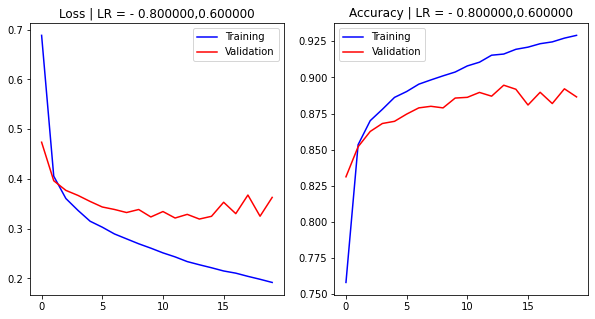

Epoch 0: 0.683053, 0.759780, 0.446780, 0.841900
Epoch 1: 0.402978, 0.853600, 0.408848, 0.852300
Epoch 2: 0.360170, 0.869280, 0.388142, 0.858000
Epoch 3: 0.336558, 0.878320, 0.378036, 0.862100
Epoch 4: 0.317159, 0.884280, 0.376827, 0.864100
Epoch 5: 0.302271, 0.890300, 0.354111, 0.872900
Epoch 6: 0.290268, 0.893780, 0.365448, 0.870000
Epoch 7: 0.279020, 0.898020, 0.328404, 0.883200
Epoch 8: 0.269072, 0.900120, 0.348320, 0.879100
Epoch 9: 0.258925, 0.905640, 0.326701, 0.885200
Epoch 10: 0.251632, 0.907940, 0.327388, 0.886100
Epoch 11: 0.243839, 0.909860, 0.342499, 0.881000
Epoch 12: 0.237794, 0.913220, 0.336996, 0.879800
Epoch 13: 0.229156, 0.915680, 0.332506, 0.887400
Epoch 14: 0.222882, 0.919260, 0.353225, 0.883200
Epoch 15: 0.216677, 0.920720, 0.348251, 0.884600
Epoch 16: 0.210695, 0.922600, 0.336549, 0.887300
Epoch 17: 0.202907, 0.925540, 0.347068, 0.886700
Epoch 18: 0.199122, 0.925500, 0.338039, 0.891700
Epoch 19: 0.191785, 0.929240, 0.335479, 0.895000


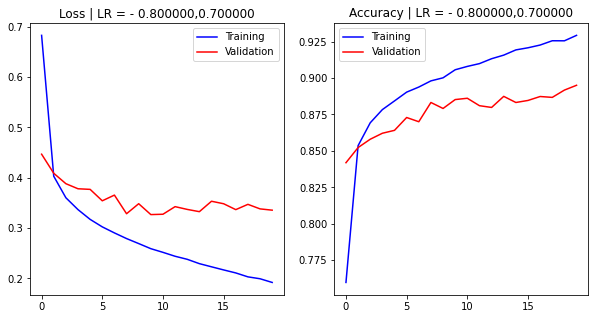

Epoch 0: 0.686367, 0.755240, 0.459077, 0.832800
Epoch 1: 0.401684, 0.855080, 0.403995, 0.851900
Epoch 2: 0.363004, 0.868240, 0.384105, 0.861000
Epoch 3: 0.338634, 0.876980, 0.367260, 0.865700
Epoch 4: 0.318570, 0.883320, 0.351947, 0.870100
Epoch 5: 0.304281, 0.889340, 0.376427, 0.866300
Epoch 6: 0.291936, 0.892980, 0.347085, 0.878700
Epoch 7: 0.280544, 0.897720, 0.337834, 0.878000
Epoch 8: 0.269893, 0.901940, 0.346471, 0.877100
Epoch 9: 0.260737, 0.904740, 0.347337, 0.874800
Epoch 10: 0.251318, 0.908100, 0.329020, 0.886400
Epoch 11: 0.244526, 0.909200, 0.336677, 0.885100
Epoch 12: 0.236051, 0.913820, 0.321301, 0.886300
Epoch 13: 0.228484, 0.915740, 0.338087, 0.880900
Epoch 14: 0.222030, 0.916600, 0.336521, 0.883500
Epoch 15: 0.216395, 0.920300, 0.330029, 0.887200
Epoch 16: 0.210659, 0.922420, 0.317622, 0.893300
Epoch 17: 0.203654, 0.923940, 0.338743, 0.884300
Epoch 18: 0.196952, 0.927560, 0.339746, 0.887200
Epoch 19: 0.191772, 0.928600, 0.344055, 0.883100


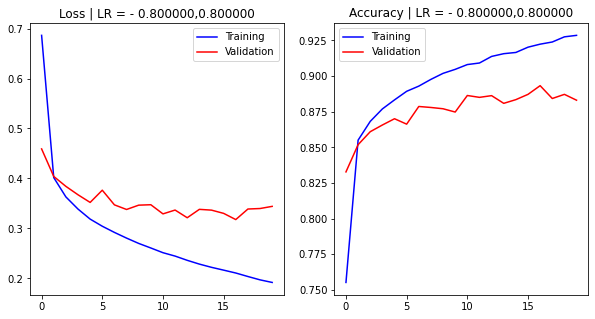

Epoch 0: 0.686707, 0.757780, 0.456192, 0.837800
Epoch 1: 0.402270, 0.853780, 0.404297, 0.857400
Epoch 2: 0.360198, 0.869460, 0.371312, 0.866100
Epoch 3: 0.334115, 0.878300, 0.363493, 0.868900
Epoch 4: 0.316798, 0.884320, 0.345901, 0.871800
Epoch 5: 0.299930, 0.890020, 0.351891, 0.871600
Epoch 6: 0.289222, 0.894640, 0.340835, 0.877500
Epoch 7: 0.275294, 0.899400, 0.333695, 0.879500
Epoch 8: 0.264979, 0.903100, 0.334540, 0.876800
Epoch 9: 0.254540, 0.905540, 0.343671, 0.879600
Epoch 10: 0.246041, 0.908080, 0.331491, 0.881700
Epoch 11: 0.238617, 0.911900, 0.335276, 0.880400
Epoch 12: 0.229927, 0.914140, 0.327451, 0.886200
Epoch 13: 0.220171, 0.918200, 0.334904, 0.882800
Epoch 14: 0.214717, 0.920280, 0.323980, 0.889100
Epoch 15: 0.208191, 0.923500, 0.310816, 0.892000
Epoch 16: 0.202144, 0.923860, 0.351588, 0.882100
Epoch 17: 0.195363, 0.927440, 0.331443, 0.888700
Epoch 18: 0.188452, 0.929560, 0.331843, 0.888800
Epoch 19: 0.183166, 0.932240, 0.331940, 0.888200


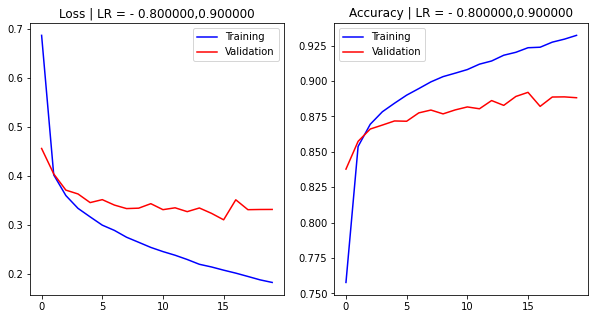

Epoch 0: 101.352528, 0.390860, 291.890660, 0.194300
Epoch 1: 274.412602, 0.187500, 273.879414, 0.096800
Epoch 2: 262.587535, 0.131620, 267.758725, 0.192700
Epoch 3: 255.229241, 0.133420, 260.234640, 0.200100
Epoch 4: 247.710300, 0.145900, 252.500355, 0.097700
Epoch 5: 240.066231, 0.137440, 243.895761, 0.190300
Epoch 6: 232.444347, 0.143080, 236.471915, 0.194300
Epoch 7: 225.121397, 0.139220, 230.256755, 0.192700
Epoch 8: 217.952030, 0.135200, 222.048922, 0.102400
Epoch 9: 210.598010, 0.141780, 215.730352, 0.198700
Epoch 10: 209.014922, 0.151240, 216.100783, 0.198700
Epoch 11: 208.646040, 0.148560, 216.470667, 0.102400
Epoch 12: 208.151006, 0.149560, 215.598430, 0.198700
Epoch 13: 208.030857, 0.156600, 214.710968, 0.097700
Epoch 14: 207.782118, 0.150820, 215.700951, 0.102400
Epoch 15: 207.540975, 0.145740, 214.830243, 0.097700
Epoch 16: 207.179632, 0.138760, 214.595569, 0.095300
Epoch 17: 207.068796, 0.133460, 213.732464, 0.097700
Epoch 18: 207.221053, 0.125660, 215.969152, 0.097700
Epo

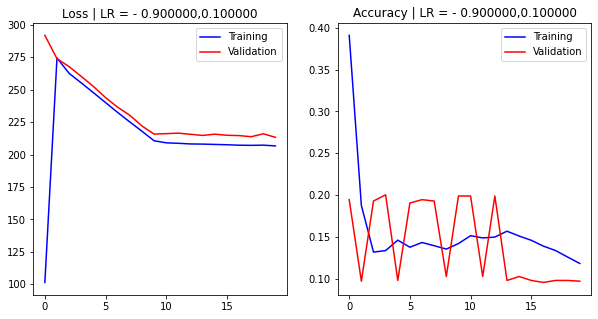

Epoch 0: 0.698005, 0.743920, 0.514467, 0.822200
Epoch 1: 0.726097, 0.816880, 0.624988, 0.808800
Epoch 2: 0.780708, 0.817640, 0.551766, 0.813000
Epoch 3: 1.246263, 0.801300, 9.244927, 0.723100
Epoch 4: 2.835991, 0.776520, 0.569586, 0.804300
Epoch 5: 0.514057, 0.825980, 0.528115, 0.823000
Epoch 6: 0.515605, 0.824660, 0.525064, 0.819700
Epoch 7: 0.495607, 0.829520, 0.499478, 0.823900
Epoch 8: 0.507050, 0.827800, 0.555471, 0.812800
Epoch 9: 0.520886, 0.825780, 0.557584, 0.810400
Epoch 10: 0.533005, 0.822300, 0.558297, 0.810900
Epoch 11: 0.551848, 0.817580, 0.597493, 0.811000
Epoch 12: 0.973569, 0.737340, 0.739076, 0.779000
Epoch 13: 0.638878, 0.797220, 0.689405, 0.776500
Epoch 14: 0.635441, 0.795960, 0.653034, 0.783900
Epoch 15: 0.619716, 0.802820, 0.633783, 0.801100
Epoch 16: 0.624642, 0.800560, 0.667769, 0.787500
Epoch 17: 0.716128, 0.772560, 0.792714, 0.743900
Epoch 18: 0.859207, 0.713620, 0.813293, 0.731400
Epoch 19: 1.040612, 0.680900, 0.887648, 0.730800


Epoch 0: 0.673942, 0.754080, 0.475187, 0.826700
Epoch 1: 0.587781, 0.802680, 0.927468, 0.783800
Epoch 2: 1.097453, 0.731320, 0.606521, 0.805200
Epoch 3: 0.540472, 0.824620, 0.539942, 0.820400
Epoch 4: 0.492593, 0.834060, 0.477235, 0.836000
Epoch 5: 0.451570, 0.845660, 0.488084, 0.831300
Epoch 6: 0.439344, 0.846480, 0.451471, 0.844900
Epoch 7: 0.416217, 0.853060, 0.448678, 0.837300
Epoch 8: 0.427937, 0.852040, 0.459067, 0.845100
Epoch 9: 0.418139, 0.853280, 0.474958, 0.832600
Epoch 10: 0.412895, 0.854240, 0.465887, 0.839300
Epoch 11: 0.400285, 0.858360, 0.469126, 0.836500
Epoch 12: 0.397481, 0.859720, 0.446218, 0.842200
Epoch 13: 0.397535, 0.859460, 0.437143, 0.846600
Epoch 14: 0.397194, 0.859520, 0.440966, 0.847700
Epoch 15: 0.395531, 0.860980, 0.452008, 0.842600
Epoch 16: 0.392624, 0.862020, 0.479806, 0.836800
Epoch 17: 0.395129, 0.861820, 0.449356, 0.845500
Epoch 18: 0.383334, 0.865300, 0.425090, 0.848400
Epoch 19: 0.380935, 0.865440, 0.434391, 0.851200


Epoch 0: 0.675025, 0.755940, 0.466119, 0.830000
Epoch 1: 0.406739, 0.852460, 0.389010, 0.862000
Epoch 2: 0.361312, 0.869220, 0.447762, 0.837000
Epoch 3: 0.341484, 0.876040, 0.372314, 0.870400
Epoch 4: 0.326601, 0.880420, 0.373908, 0.868300
Epoch 5: 0.314605, 0.884980, 0.349265, 0.871300
Epoch 6: 0.307893, 0.888280, 0.362837, 0.871900
Epoch 7: 0.302337, 0.890060, 0.360511, 0.871900
Epoch 8: 0.298283, 0.891560, 0.360215, 0.869900
Epoch 9: 0.288125, 0.895720, 0.366825, 0.866100
Epoch 10: 0.280325, 0.897360, 0.364069, 0.869400
Epoch 11: 0.277853, 0.897760, 0.346383, 0.877900
Epoch 12: 0.265333, 0.903120, 0.376805, 0.867500
Epoch 13: 0.264897, 0.902620, 0.339985, 0.881900
Epoch 14: 0.265271, 0.903940, 0.335379, 0.885200
Epoch 15: 0.256601, 0.905880, 0.359898, 0.874200
Epoch 16: 0.251005, 0.907880, 0.365314, 0.873500
Epoch 17: 0.247923, 0.909120, 0.354211, 0.875700
Epoch 18: 0.250622, 0.908320, 0.346105, 0.880000
Epoch 19: 0.263242, 0.906200, 0.459834, 0.839800


Epoch 0: 0.680740, 0.753820, 0.451704, 0.836400
Epoch 1: 0.395255, 0.855880, 0.395196, 0.855500
Epoch 2: 0.355137, 0.871120, 0.363281, 0.869800
Epoch 3: 0.326710, 0.880780, 0.367297, 0.865800
Epoch 4: 0.312022, 0.885280, 0.353795, 0.872300
Epoch 5: 0.296814, 0.891100, 0.356332, 0.867500
Epoch 6: 0.284719, 0.894820, 0.351809, 0.873400
Epoch 7: 0.279240, 0.896500, 0.354588, 0.873900
Epoch 8: 0.269053, 0.901680, 0.343111, 0.879600
Epoch 9: 0.261471, 0.903120, 0.334389, 0.882100
Epoch 10: 0.254006, 0.906500, 0.341726, 0.879700
Epoch 11: 0.253018, 0.905240, 0.366895, 0.873500
Epoch 12: 0.244509, 0.909380, 0.349096, 0.883100
Epoch 13: 0.241400, 0.910700, 0.337138, 0.883300
Epoch 14: 0.241801, 0.911380, 0.333870, 0.885500
Epoch 15: 0.234480, 0.912100, 0.366897, 0.873200
Epoch 16: 0.231138, 0.914400, 0.372107, 0.878700
Epoch 17: 0.227014, 0.916040, 0.348305, 0.883800
Epoch 18: 0.220102, 0.917200, 0.346358, 0.884400
Epoch 19: 0.214393, 0.920340, 0.342728, 0.886000


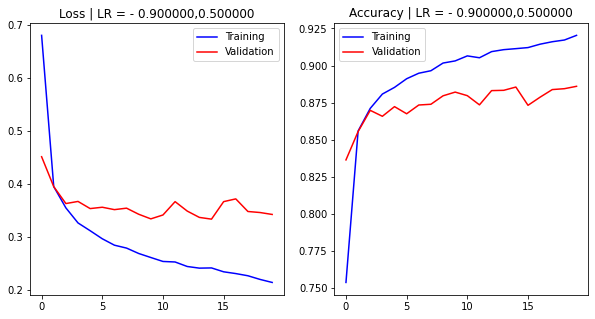

Epoch 0: 0.678791, 0.760760, 0.450883, 0.835000
Epoch 1: 0.398931, 0.853260, 0.391481, 0.860100
Epoch 2: 0.357606, 0.869980, 0.376579, 0.864200
Epoch 3: 0.325758, 0.880720, 0.362334, 0.864700
Epoch 4: 0.303638, 0.887880, 0.338800, 0.875500
Epoch 5: 0.290077, 0.893880, 0.351609, 0.875400
Epoch 6: 0.277732, 0.896420, 0.340387, 0.879200
Epoch 7: 0.268139, 0.900180, 0.355642, 0.873100
Epoch 8: 0.257356, 0.903920, 0.358361, 0.871700
Epoch 9: 0.248820, 0.907380, 0.335131, 0.885100
Epoch 10: 0.239600, 0.911180, 0.371441, 0.872800
Epoch 11: 0.232014, 0.912660, 0.335800, 0.884300
Epoch 12: 0.224999, 0.916840, 0.340340, 0.882900
Epoch 13: 0.219004, 0.917840, 0.332587, 0.888300
Epoch 14: 0.212119, 0.920280, 0.335931, 0.887100
Epoch 15: 0.210626, 0.921660, 0.342108, 0.883200
Epoch 16: 0.207977, 0.920980, 0.327813, 0.891700
Epoch 17: 0.201502, 0.925500, 0.352846, 0.883700
Epoch 18: 0.197460, 0.926960, 0.335968, 0.887500
Epoch 19: 0.191753, 0.927680, 0.352230, 0.884700


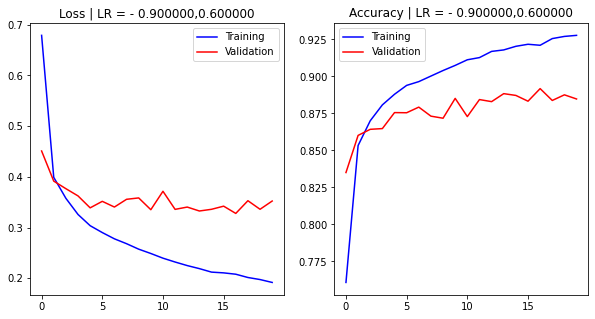

Epoch 0: 0.691583, 0.750860, 0.461621, 0.834100
Epoch 1: 0.400010, 0.853980, 0.397461, 0.858200
Epoch 2: 0.358613, 0.871140, 0.399513, 0.855100
Epoch 3: 0.330234, 0.880280, 0.362768, 0.868500
Epoch 4: 0.311273, 0.885580, 0.342836, 0.877300
Epoch 5: 0.296528, 0.890580, 0.341315, 0.878000
Epoch 6: 0.280746, 0.895820, 0.342435, 0.875900
Epoch 7: 0.271263, 0.899480, 0.351985, 0.870400
Epoch 8: 0.258360, 0.904420, 0.321882, 0.886400
Epoch 9: 0.250059, 0.906280, 0.337652, 0.878600
Epoch 10: 0.239539, 0.910480, 0.334543, 0.887200
Epoch 11: 0.232462, 0.914280, 0.325663, 0.883300
Epoch 12: 0.222997, 0.917160, 0.334385, 0.887000
Epoch 13: 0.216917, 0.918880, 0.317407, 0.892100
Epoch 14: 0.206792, 0.922620, 0.359190, 0.881600
Epoch 15: 0.200602, 0.926180, 0.346950, 0.889000
Epoch 16: 0.195277, 0.927460, 0.350726, 0.882400
Epoch 17: 0.189454, 0.928900, 0.351316, 0.886600
Epoch 18: 0.185177, 0.932060, 0.355023, 0.888700
Epoch 19: 0.179260, 0.933220, 0.345812, 0.890500


Epoch 0: 0.691063, 0.756080, 0.470120, 0.829200
Epoch 1: 0.403449, 0.853060, 0.392702, 0.857100
Epoch 2: 0.357252, 0.870940, 0.378977, 0.863300
Epoch 3: 0.330702, 0.879580, 0.362921, 0.870600
Epoch 4: 0.311464, 0.886360, 0.359305, 0.869700
Epoch 5: 0.299662, 0.890880, 0.343517, 0.876900
Epoch 6: 0.281407, 0.896240, 0.336685, 0.878300
Epoch 7: 0.273703, 0.898600, 0.333733, 0.880400
Epoch 8: 0.262896, 0.902120, 0.333156, 0.879000
Epoch 9: 0.251881, 0.906840, 0.318575, 0.883200
Epoch 10: 0.244941, 0.909800, 0.321428, 0.885500
Epoch 11: 0.236779, 0.913460, 0.313854, 0.889000
Epoch 12: 0.226362, 0.916860, 0.312132, 0.890900
Epoch 13: 0.221597, 0.917800, 0.324953, 0.886800
Epoch 14: 0.213859, 0.920240, 0.326735, 0.885000
Epoch 15: 0.205363, 0.922740, 0.341217, 0.885500
Epoch 16: 0.198602, 0.926320, 0.337345, 0.885900
Epoch 17: 0.190964, 0.928320, 0.336163, 0.887500
Epoch 18: 0.186938, 0.930620, 0.327037, 0.889000
Epoch 19: 0.180908, 0.932500, 0.333100, 0.891000


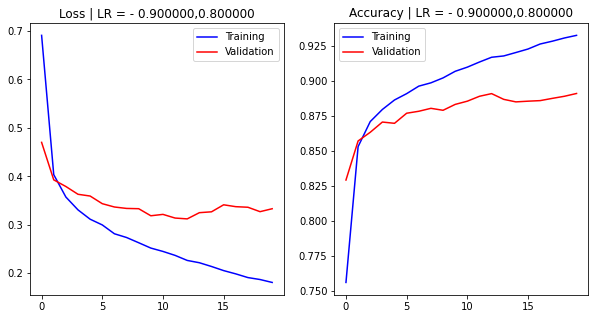

Epoch 0: 0.695906, 0.754900, 0.457020, 0.831300
Epoch 1: 0.400786, 0.854340, 0.412346, 0.847500
Epoch 2: 0.357655, 0.869660, 0.371928, 0.864700
Epoch 3: 0.332113, 0.880060, 0.365740, 0.870100
Epoch 4: 0.310496, 0.887460, 0.355809, 0.869300
Epoch 5: 0.294258, 0.892220, 0.349744, 0.872200
Epoch 6: 0.282453, 0.896640, 0.345395, 0.876500
Epoch 7: 0.270341, 0.900480, 0.340229, 0.872200
Epoch 8: 0.262875, 0.902720, 0.352612, 0.873100
Epoch 9: 0.250699, 0.906400, 0.333040, 0.875800
Epoch 10: 0.240614, 0.910760, 0.310385, 0.888300
Epoch 11: 0.232038, 0.913740, 0.335845, 0.878600
Epoch 12: 0.225667, 0.915020, 0.329443, 0.883400
Epoch 13: 0.218500, 0.918180, 0.323258, 0.888300
Epoch 14: 0.209899, 0.920200, 0.327430, 0.885200
Epoch 15: 0.204452, 0.923520, 0.305927, 0.893700
Epoch 16: 0.198571, 0.925560, 0.334756, 0.878300
Epoch 17: 0.190794, 0.929080, 0.320024, 0.892400
Epoch 18: 0.182949, 0.930560, 0.336746, 0.889400
Epoch 19: 0.178846, 0.933180, 0.323637, 0.891800


In [53]:
nbatch = 64
nepochs =20

training_loader = DataLoader(training_data, batch_size=nbatch, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=nbatch, shuffle=True)

for a in np.arange(0.1,1,0.1):
    for b in np.arange(0.1,1,0.1):
        model = mlp()
        #model.to(cuda0)
        optimizer = torch.optim.Adam(model.parameters(),lr=0.0014, betas= (a, b),eps=1e-8,weight_decay=0, amsgrad=False)
        cost_hist, cost_hist_test, acc_hist, acc_hist_test = train_eval(model, optimizer, nepochs, training_loader, validation_loader)

        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.plot(torch.arange(nepochs), cost_hist,"b-", label="Training")
        plt.plot(torch.arange(nepochs), cost_hist_test,"r-",label="Validation")
        plt.legend()
        plt.title("Loss | LR = - %f,%f"%(a,b))

        plt.subplot(1,2,2)
        plt.plot(torch.arange(nepochs), acc_hist,"b-", label="Training")
        plt.plot(torch.arange(nepochs), acc_hist_test,"r-", label="Validation")
        plt.legend()
        plt.title("Accuracy | LR = - %f,%f"%(a,b))
        plt.show()

<font style="color:red"> $\epsilon$ </font>

Epoch 0: 0.781259, 0.738600, 0.474595, 0.829800
Epoch 1: 0.418499, 0.850580, 0.420924, 0.848200
Epoch 2: 0.367593, 0.866820, 0.382046, 0.862300
Epoch 3: 0.341417, 0.876720, 0.381101, 0.859400
Epoch 4: 0.321763, 0.883440, 0.364561, 0.864200
Epoch 5: 0.305008, 0.887600, 0.350387, 0.871100
Epoch 6: 0.292169, 0.892200, 0.339189, 0.878100
Epoch 7: 0.280657, 0.897400, 0.334419, 0.876500
Epoch 8: 0.269529, 0.901940, 0.326550, 0.881500
Epoch 9: 0.259655, 0.903980, 0.325999, 0.880200
Epoch 10: 0.249719, 0.907780, 0.352279, 0.873200
Epoch 11: 0.243140, 0.909680, 0.330522, 0.881000
Epoch 12: 0.234167, 0.912720, 0.313052, 0.888200
Epoch 13: 0.224385, 0.917900, 0.311732, 0.888700
Epoch 14: 0.218116, 0.919340, 0.344425, 0.879900
Epoch 15: 0.210568, 0.922400, 0.311755, 0.889600
Epoch 16: 0.201729, 0.926080, 0.313806, 0.889700
Epoch 17: 0.196339, 0.927140, 0.317177, 0.890300
Epoch 18: 0.191977, 0.928860, 0.308802, 0.892800
Epoch 19: 0.182470, 0.932700, 0.324445, 0.885700


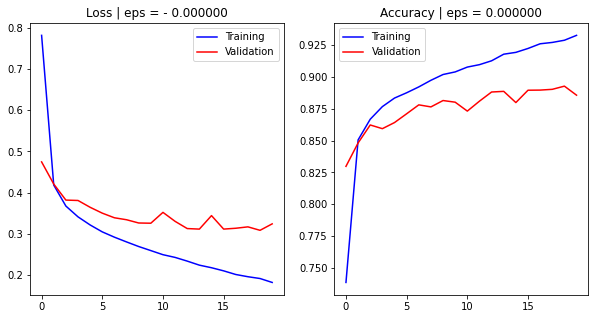

Epoch 0: 0.769063, 0.740900, 0.484147, 0.821500
Epoch 1: 0.420412, 0.849360, 0.414479, 0.851100
Epoch 2: 0.371739, 0.865940, 0.381744, 0.860500
Epoch 3: 0.341061, 0.876920, 0.380156, 0.857000
Epoch 4: 0.321367, 0.883880, 0.362011, 0.867000
Epoch 5: 0.307757, 0.887640, 0.347179, 0.871300
Epoch 6: 0.294189, 0.892460, 0.353749, 0.871200
Epoch 7: 0.282675, 0.896420, 0.344461, 0.874900
Epoch 8: 0.270277, 0.900760, 0.326332, 0.881200
Epoch 9: 0.261215, 0.903620, 0.325346, 0.882200
Epoch 10: 0.253410, 0.907440, 0.332498, 0.882900
Epoch 11: 0.245054, 0.910240, 0.324339, 0.881000
Epoch 12: 0.236800, 0.912820, 0.320517, 0.884200
Epoch 13: 0.226656, 0.915980, 0.313124, 0.885500
Epoch 14: 0.220452, 0.918120, 0.311660, 0.888400
Epoch 15: 0.215703, 0.921720, 0.312162, 0.890200
Epoch 16: 0.209252, 0.922740, 0.311830, 0.889200
Epoch 17: 0.201059, 0.926500, 0.311954, 0.890800
Epoch 18: 0.193828, 0.928240, 0.326444, 0.885000
Epoch 19: 0.188576, 0.930320, 0.349562, 0.880100


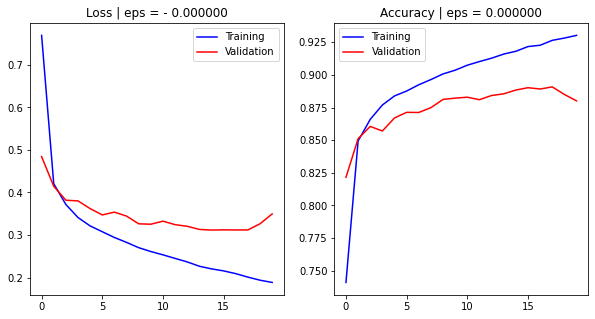

Epoch 0: 0.789274, 0.732760, 0.485158, 0.828400
Epoch 1: 0.418524, 0.850100, 0.405190, 0.852800
Epoch 2: 0.368175, 0.866680, 0.388147, 0.856800
Epoch 3: 0.338443, 0.877460, 0.373081, 0.869100
Epoch 4: 0.318655, 0.884320, 0.348819, 0.872700
Epoch 5: 0.302944, 0.890360, 0.341068, 0.877700
Epoch 6: 0.289320, 0.894340, 0.334342, 0.878300
Epoch 7: 0.278315, 0.897220, 0.329015, 0.884800
Epoch 8: 0.268648, 0.900860, 0.330404, 0.880400
Epoch 9: 0.259380, 0.904700, 0.327369, 0.881700
Epoch 10: 0.251359, 0.907400, 0.326795, 0.883000
Epoch 11: 0.240936, 0.910740, 0.332414, 0.878900
Epoch 12: 0.233257, 0.913920, 0.342072, 0.879200
Epoch 13: 0.226631, 0.916440, 0.318322, 0.887900
Epoch 14: 0.218419, 0.918920, 0.316885, 0.889800
Epoch 15: 0.212311, 0.920420, 0.324407, 0.882500
Epoch 16: 0.203418, 0.925060, 0.311296, 0.892700
Epoch 17: 0.197827, 0.926540, 0.313377, 0.891100
Epoch 18: 0.190305, 0.929420, 0.312952, 0.890100
Epoch 19: 0.184571, 0.932420, 0.317229, 0.889000


Epoch 0: 0.790881, 0.739660, 0.486099, 0.828300
Epoch 1: 0.422627, 0.849600, 0.418893, 0.849000
Epoch 2: 0.370148, 0.867040, 0.395906, 0.853400
Epoch 3: 0.340888, 0.876700, 0.365078, 0.867900
Epoch 4: 0.321206, 0.882920, 0.358902, 0.869100
Epoch 5: 0.305606, 0.889640, 0.350271, 0.870400
Epoch 6: 0.289834, 0.894820, 0.338629, 0.877900
Epoch 7: 0.279674, 0.896920, 0.338589, 0.875200
Epoch 8: 0.268001, 0.901820, 0.340388, 0.873100
Epoch 9: 0.258756, 0.904360, 0.341459, 0.877500
Epoch 10: 0.250568, 0.906640, 0.323801, 0.882300
Epoch 11: 0.242127, 0.911180, 0.333435, 0.878500
Epoch 12: 0.232379, 0.914460, 0.319546, 0.885200
Epoch 13: 0.226483, 0.915040, 0.312365, 0.887000
Epoch 14: 0.218301, 0.919200, 0.309934, 0.891100
Epoch 15: 0.211987, 0.920820, 0.308107, 0.888500
Epoch 16: 0.205415, 0.923920, 0.308117, 0.890100
Epoch 17: 0.198388, 0.927540, 0.311952, 0.888200
Epoch 18: 0.190164, 0.929660, 0.306363, 0.894200
Epoch 19: 0.184895, 0.932600, 0.310450, 0.889700


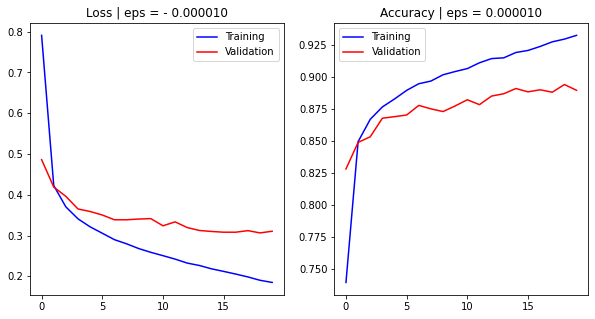

Epoch 0: 0.779518, 0.737560, 0.484996, 0.830400
Epoch 1: 0.418671, 0.849960, 0.414514, 0.850400
Epoch 2: 0.370969, 0.864720, 0.388498, 0.856000
Epoch 3: 0.343884, 0.876420, 0.360096, 0.868500
Epoch 4: 0.321499, 0.883660, 0.368033, 0.865500
Epoch 5: 0.306318, 0.888260, 0.357977, 0.868300
Epoch 6: 0.293474, 0.893320, 0.349473, 0.874300
Epoch 7: 0.281546, 0.898460, 0.354324, 0.866300
Epoch 8: 0.272181, 0.900180, 0.326923, 0.880800
Epoch 9: 0.260556, 0.903680, 0.331786, 0.877900
Epoch 10: 0.252140, 0.908020, 0.332062, 0.879300
Epoch 11: 0.243136, 0.909640, 0.319590, 0.884500
Epoch 12: 0.235712, 0.912740, 0.319415, 0.887600
Epoch 13: 0.228436, 0.915040, 0.335942, 0.876600
Epoch 14: 0.218833, 0.919980, 0.323412, 0.884200
Epoch 15: 0.211495, 0.923140, 0.313006, 0.887800
Epoch 16: 0.206627, 0.923600, 0.317636, 0.886300
Epoch 17: 0.198082, 0.926580, 0.318456, 0.889000
Epoch 18: 0.191518, 0.929880, 0.319415, 0.887800
Epoch 19: 0.185788, 0.931120, 0.327389, 0.884700


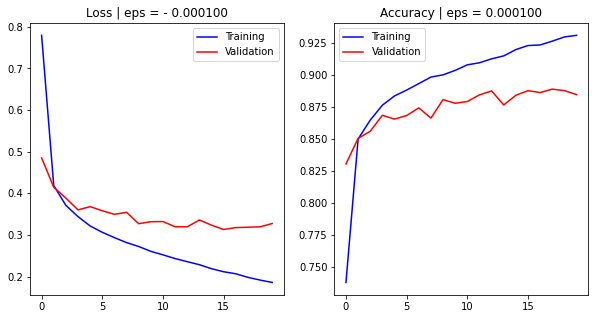

Epoch 0: 0.770249, 0.741600, 0.473972, 0.830300
Epoch 1: 0.417301, 0.851720, 0.407324, 0.852600
Epoch 2: 0.372358, 0.865840, 0.404930, 0.857300
Epoch 3: 0.342138, 0.875900, 0.383994, 0.857900
Epoch 4: 0.323138, 0.883300, 0.374899, 0.862700
Epoch 5: 0.310892, 0.886540, 0.346227, 0.870700
Epoch 6: 0.297037, 0.892440, 0.342224, 0.876600
Epoch 7: 0.283517, 0.896320, 0.334706, 0.877300
Epoch 8: 0.274585, 0.899140, 0.332449, 0.880100
Epoch 9: 0.262967, 0.902920, 0.324458, 0.879900
Epoch 10: 0.253856, 0.905500, 0.332047, 0.880300
Epoch 11: 0.246371, 0.908860, 0.318899, 0.884100
Epoch 12: 0.239206, 0.911420, 0.317064, 0.885100
Epoch 13: 0.229106, 0.915320, 0.331543, 0.880800
Epoch 14: 0.222566, 0.918880, 0.316140, 0.888000
Epoch 15: 0.214618, 0.921300, 0.320620, 0.887700
Epoch 16: 0.209202, 0.924240, 0.319679, 0.887300
Epoch 17: 0.202933, 0.924840, 0.323923, 0.883900
Epoch 18: 0.196107, 0.927100, 0.316321, 0.892600
Epoch 19: 0.188982, 0.930300, 0.327957, 0.888900


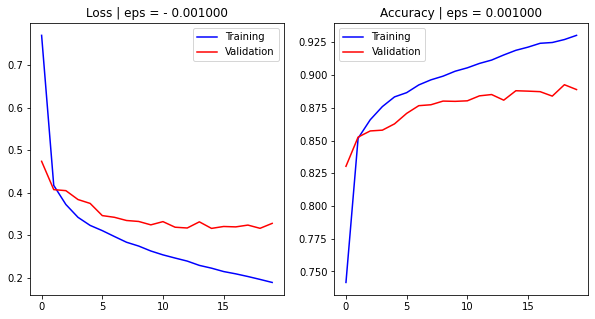

Epoch 0: 0.770449, 0.739700, 0.481789, 0.829300
Epoch 1: 0.422858, 0.847940, 0.425740, 0.848200
Epoch 2: 0.373137, 0.866400, 0.397008, 0.857200
Epoch 3: 0.345137, 0.875880, 0.379666, 0.860100
Epoch 4: 0.323901, 0.882000, 0.358754, 0.869500
Epoch 5: 0.308368, 0.888920, 0.346569, 0.878200
Epoch 6: 0.295171, 0.893700, 0.343776, 0.876200
Epoch 7: 0.284363, 0.896100, 0.342767, 0.872600
Epoch 8: 0.272276, 0.900580, 0.336757, 0.877500
Epoch 9: 0.262496, 0.903780, 0.333255, 0.877000
Epoch 10: 0.254835, 0.906260, 0.325708, 0.882500
Epoch 11: 0.245773, 0.909580, 0.340768, 0.875300
Epoch 12: 0.236960, 0.914300, 0.325266, 0.885000
Epoch 13: 0.230114, 0.914880, 0.324104, 0.881900
Epoch 14: 0.221527, 0.917880, 0.313958, 0.887900
Epoch 15: 0.213692, 0.921280, 0.318127, 0.889400
Epoch 16: 0.206513, 0.924540, 0.308824, 0.890700
Epoch 17: 0.200507, 0.926860, 0.329335, 0.886000
Epoch 18: 0.193445, 0.928380, 0.318120, 0.890400
Epoch 19: 0.189783, 0.930920, 0.313886, 0.892400


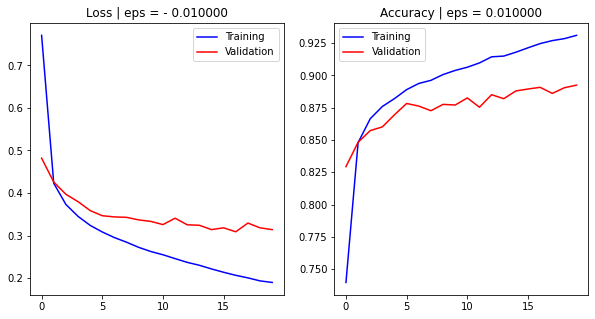

Epoch 0: 0.787888, 0.735160, 0.476970, 0.836300
Epoch 1: 0.422892, 0.848180, 0.423017, 0.848600
Epoch 2: 0.369816, 0.866940, 0.396379, 0.857900
Epoch 3: 0.344578, 0.875160, 0.378714, 0.864100
Epoch 4: 0.322076, 0.882540, 0.357182, 0.870800
Epoch 5: 0.307200, 0.887940, 0.352341, 0.871000
Epoch 6: 0.292275, 0.893520, 0.356993, 0.871200
Epoch 7: 0.282991, 0.896620, 0.349408, 0.871400
Epoch 8: 0.271273, 0.900160, 0.365570, 0.867100
Epoch 9: 0.261295, 0.904820, 0.332313, 0.880900
Epoch 10: 0.254508, 0.906500, 0.322418, 0.881500
Epoch 11: 0.244060, 0.910380, 0.348102, 0.876300
Epoch 12: 0.234218, 0.913120, 0.322795, 0.885800
Epoch 13: 0.227217, 0.915600, 0.324496, 0.881400
Epoch 14: 0.220461, 0.918660, 0.333412, 0.881400
Epoch 15: 0.214474, 0.920660, 0.342707, 0.879700
Epoch 16: 0.206648, 0.923240, 0.319247, 0.886400
Epoch 17: 0.202632, 0.924440, 0.326600, 0.885400
Epoch 18: 0.194467, 0.927840, 0.321182, 0.885200
Epoch 19: 0.188348, 0.930960, 0.319270, 0.888000


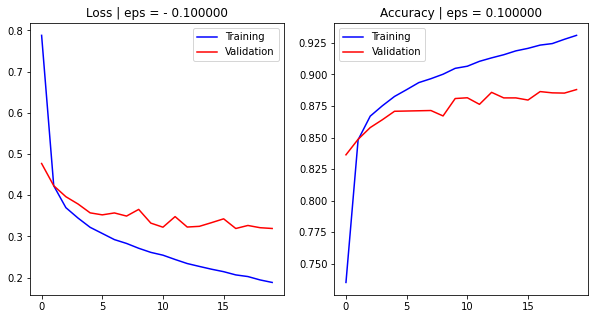

Epoch 0: 0.787103, 0.738700, 0.475552, 0.827900
Epoch 1: 0.418752, 0.850100, 0.403926, 0.854900
Epoch 2: 0.369106, 0.866060, 0.391071, 0.858200
Epoch 3: 0.342688, 0.877160, 0.375029, 0.865700
Epoch 4: 0.323440, 0.882900, 0.373595, 0.862900
Epoch 5: 0.306739, 0.889320, 0.349287, 0.869900
Epoch 6: 0.292781, 0.893040, 0.336868, 0.876400
Epoch 7: 0.281850, 0.896380, 0.341695, 0.874700
Epoch 8: 0.270720, 0.901760, 0.335049, 0.876500
Epoch 9: 0.260191, 0.904400, 0.328065, 0.880300
Epoch 10: 0.252604, 0.906520, 0.326550, 0.880000
Epoch 11: 0.243630, 0.910560, 0.333691, 0.882000
Epoch 12: 0.234714, 0.914120, 0.324885, 0.883000
Epoch 13: 0.228058, 0.915420, 0.324221, 0.882900
Epoch 14: 0.219946, 0.919200, 0.317193, 0.886100
Epoch 15: 0.211931, 0.922240, 0.325474, 0.885500
Epoch 16: 0.204863, 0.924500, 0.319708, 0.889000
Epoch 17: 0.198390, 0.926480, 0.311391, 0.889200
Epoch 18: 0.191811, 0.928500, 0.320269, 0.888100
Epoch 19: 0.187526, 0.930300, 0.321179, 0.887600


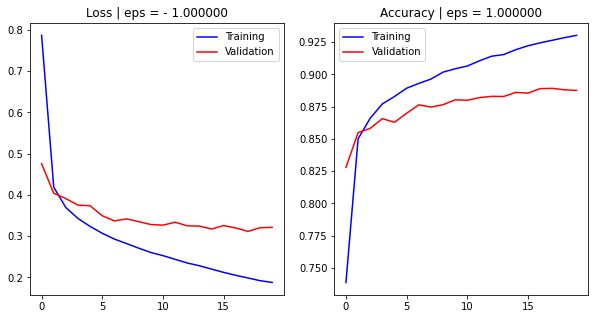

Epoch 0: 0.784108, 0.730220, 0.477006, 0.829300
Epoch 1: 0.417265, 0.851220, 0.409751, 0.854000
Epoch 2: 0.367185, 0.868460, 0.378510, 0.863600
Epoch 3: 0.340145, 0.878780, 0.367728, 0.865800
Epoch 4: 0.320125, 0.884460, 0.365254, 0.868000
Epoch 5: 0.306156, 0.888340, 0.344273, 0.874100
Epoch 6: 0.292848, 0.891160, 0.339044, 0.876100
Epoch 7: 0.279309, 0.897160, 0.340120, 0.874500
Epoch 8: 0.269485, 0.901180, 0.333134, 0.875800
Epoch 9: 0.259611, 0.903680, 0.334252, 0.879100
Epoch 10: 0.249245, 0.908320, 0.331808, 0.880400
Epoch 11: 0.244329, 0.909920, 0.329321, 0.876900
Epoch 12: 0.234929, 0.912880, 0.318680, 0.886000
Epoch 13: 0.227280, 0.916480, 0.316921, 0.888600
Epoch 14: 0.219833, 0.918460, 0.334583, 0.880800
Epoch 15: 0.212523, 0.922100, 0.313056, 0.886200
Epoch 16: 0.206107, 0.923880, 0.323653, 0.883400
Epoch 17: 0.199692, 0.925380, 0.343264, 0.879800
Epoch 18: 0.194425, 0.928460, 0.323413, 0.884500
Epoch 19: 0.187595, 0.930580, 0.313640, 0.891300


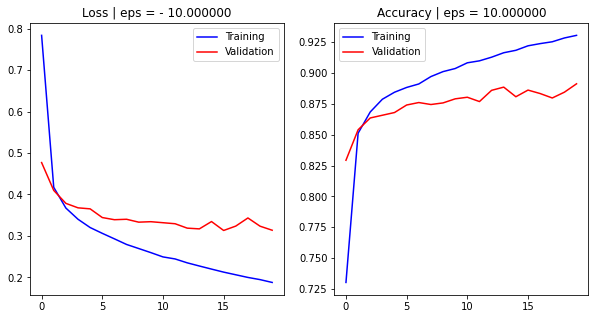

Epoch 0: 0.787593, 0.729000, 0.476515, 0.829800
Epoch 1: 0.418309, 0.850800, 0.411957, 0.850700
Epoch 2: 0.370112, 0.866880, 0.389657, 0.855100
Epoch 3: 0.341903, 0.877960, 0.378221, 0.862300
Epoch 4: 0.321363, 0.883220, 0.376718, 0.864600
Epoch 5: 0.305499, 0.888280, 0.346121, 0.873900
Epoch 6: 0.290524, 0.893980, 0.348100, 0.870600
Epoch 7: 0.280927, 0.897100, 0.327352, 0.880600
Epoch 8: 0.270778, 0.900360, 0.328876, 0.879300
Epoch 9: 0.261789, 0.903360, 0.333453, 0.878100
Epoch 10: 0.252211, 0.907240, 0.326211, 0.881900
Epoch 11: 0.245068, 0.909940, 0.313562, 0.887000
Epoch 12: 0.237188, 0.912900, 0.315498, 0.886700
Epoch 13: 0.228046, 0.915320, 0.316162, 0.885500
Epoch 14: 0.220883, 0.918120, 0.327804, 0.882400
Epoch 15: 0.214155, 0.919980, 0.321013, 0.883800
Epoch 16: 0.208542, 0.922580, 0.309036, 0.887500
Epoch 17: 0.201075, 0.924680, 0.305803, 0.892400
Epoch 18: 0.193545, 0.928400, 0.333567, 0.882100
Epoch 19: 0.188436, 0.930440, 0.317807, 0.890300


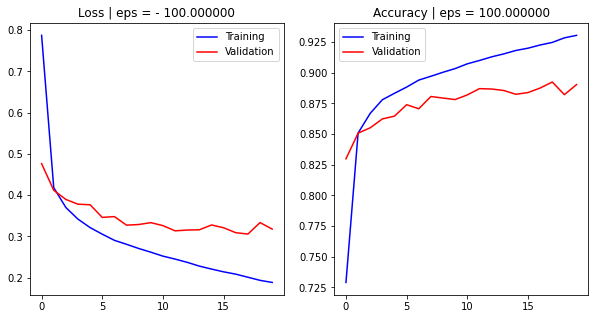

In [60]:
nbatch = 64
nepochs =20

training_loader = DataLoader(training_data, batch_size=nbatch, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=nbatch, shuffle=True)
epsilon = [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e-0,1e1,1e2]
for eps in enumerate(epsilon):
    model = mlp()
    #model.to(cuda0)
    optimizer = torch.optim.Adam(model.parameters(),eps=1e-8,weight_decay=0, amsgrad=False)
    cost_hist, cost_hist_test, acc_hist, acc_hist_test = train_eval(model, optimizer, nepochs, training_loader, validation_loader)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(torch.arange(nepochs), cost_hist,"b-", label="Training")
    plt.plot(torch.arange(nepochs), cost_hist_test,"r-",label="Validation")
    plt.legend()
    plt.title("Loss | eps = %f"%(eps[1]))

    plt.subplot(1,2,2)
    plt.plot(torch.arange(nepochs), acc_hist,"b-", label="Training")
    plt.plot(torch.arange(nepochs), acc_hist_test,"r-", label="Validation")
    plt.legend()
    plt.title("Accuracy | eps = %f"%(eps[1]))
    plt.show()

<font style="color:red">weight decay </font>

Epoch 0: 0.775186, 0.740240, 0.485499, 0.831000
Epoch 1: 0.422857, 0.849360, 0.408262, 0.852400
Epoch 2: 0.373200, 0.865220, 0.392269, 0.861700
Epoch 3: 0.346277, 0.873780, 0.368707, 0.863900
Epoch 4: 0.325395, 0.881960, 0.361512, 0.869600
Epoch 5: 0.309252, 0.887820, 0.351497, 0.872100
Epoch 6: 0.296450, 0.891480, 0.343404, 0.875200
Epoch 7: 0.283092, 0.896720, 0.338196, 0.877200
Epoch 8: 0.272974, 0.899720, 0.337425, 0.877000
Epoch 9: 0.263157, 0.902560, 0.342769, 0.875500
Epoch 10: 0.253651, 0.907260, 0.339162, 0.878300
Epoch 11: 0.244737, 0.909080, 0.325141, 0.882500
Epoch 12: 0.237215, 0.912320, 0.338188, 0.879300
Epoch 13: 0.228790, 0.914880, 0.335728, 0.879700
Epoch 14: 0.220188, 0.918740, 0.319081, 0.888300
Epoch 15: 0.213962, 0.920820, 0.312986, 0.891900
Epoch 16: 0.206502, 0.922540, 0.327920, 0.885700
Epoch 17: 0.203182, 0.925400, 0.309720, 0.891000
Epoch 18: 0.194243, 0.927520, 0.308269, 0.890500
Epoch 19: 0.188541, 0.929440, 0.344921, 0.880100


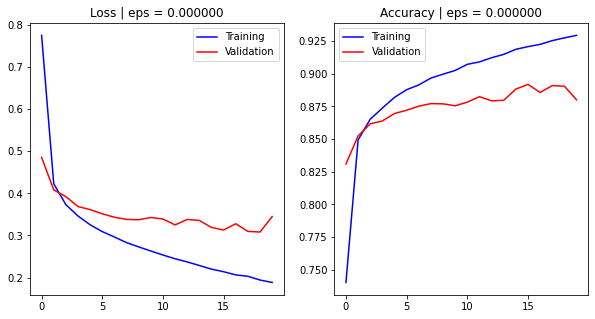

Epoch 0: 2.306076, 0.099860, 2.303493, 0.103200
Epoch 1: 2.305934, 0.101320, 2.303206, 0.103800
Epoch 2: 2.306337, 0.099660, 2.305288, 0.095700
Epoch 3: 2.306272, 0.100100, 2.303452, 0.097100
Epoch 4: 2.306331, 0.098720, 2.303928, 0.102200
Epoch 5: 2.306183, 0.099080, 2.306342, 0.098200
Epoch 6: 2.306659, 0.098580, 2.305328, 0.098200
Epoch 7: 2.306143, 0.099340, 2.303698, 0.100400
Epoch 8: 2.306077, 0.101320, 2.307686, 0.095700
Epoch 9: 2.306378, 0.099700, 2.307761, 0.100400
Epoch 10: 2.306203, 0.100320, 2.304107, 0.102200
Epoch 11: 2.306282, 0.099080, 2.305441, 0.100400
Epoch 12: 2.305845, 0.101660, 2.307656, 0.099300
Epoch 13: 2.306177, 0.099280, 2.309236, 0.097100
Epoch 14: 2.305754, 0.100760, 2.306558, 0.095700
Epoch 15: 2.306055, 0.100120, 2.307586, 0.098200
Epoch 16: 2.306218, 0.102640, 2.303650, 0.098200
Epoch 17: 2.305873, 0.099740, 2.305030, 0.098200
Epoch 18: 2.305892, 0.097760, 2.310098, 0.097100
Epoch 19: 2.306165, 0.102140, 2.308136, 0.095700


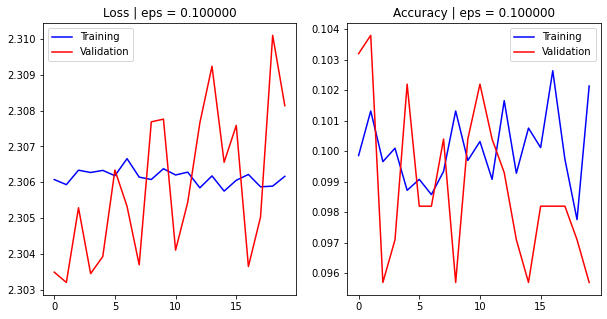

Epoch 0: 2.305103, 0.101240, 2.306324, 0.097100
Epoch 1: 2.305133, 0.099920, 2.305639, 0.098200
Epoch 2: 2.305214, 0.098900, 2.305403, 0.101900
Epoch 3: 2.305069, 0.099080, 2.303761, 0.099300
Epoch 4: 2.305266, 0.100000, 2.304526, 0.100400
Epoch 5: 2.305052, 0.099700, 2.306207, 0.100400
Epoch 6: 2.305337, 0.097920, 2.302916, 0.099300
Epoch 7: 2.305668, 0.098780, 2.305164, 0.102200
Epoch 8: 2.305037, 0.098840, 2.304634, 0.103200
Epoch 9: 2.305319, 0.098040, 2.303788, 0.099300
Epoch 10: 2.305266, 0.099720, 2.305052, 0.103200
Epoch 11: 2.304981, 0.098180, 2.305808, 0.099300
Epoch 12: 2.305264, 0.100820, 2.304838, 0.097100
Epoch 13: 2.304447, 0.104100, 2.304773, 0.102200
Epoch 14: 2.305315, 0.099940, 2.307252, 0.097100
Epoch 15: 2.305135, 0.102780, 2.308325, 0.095700
Epoch 16: 2.305111, 0.098820, 2.305549, 0.102200
Epoch 17: 2.305389, 0.098760, 2.304066, 0.100400
Epoch 18: 2.304979, 0.101660, 2.303467, 0.103200
Epoch 19: 2.305239, 0.098560, 2.303887, 0.098200


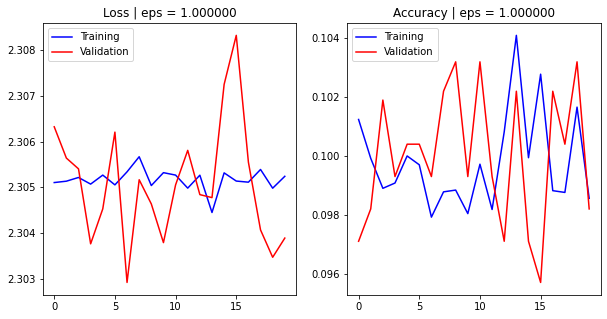

Epoch 0: 2.306041, 0.099200, 2.302459, 0.101900
Epoch 1: 2.302778, 0.100880, 2.303028, 0.098200
Epoch 2: 2.302579, 0.099700, 2.302959, 0.095700
Epoch 3: 2.302963, 0.099160, 2.303137, 0.095700
Epoch 4: 2.303146, 0.100540, 2.303114, 0.097100
Epoch 5: 2.303042, 0.100580, 2.302745, 0.101900
Epoch 6: 2.303181, 0.100020, 2.303259, 0.097100
Epoch 7: 2.303205, 0.097820, 2.303421, 0.097100
Epoch 8: 2.303204, 0.099540, 2.302684, 0.103800
Epoch 9: 2.303539, 0.098420, 2.302856, 0.098200
Epoch 10: 2.303283, 0.099040, 2.303147, 0.097100
Epoch 11: 2.302994, 0.103920, 2.303612, 0.097100
Epoch 12: 2.303259, 0.100020, 2.302734, 0.100400
Epoch 13: 2.303167, 0.101300, 2.304139, 0.097100
Epoch 14: 2.303290, 0.099540, 2.303065, 0.095700
Epoch 15: 2.303421, 0.097760, 2.303582, 0.095700
Epoch 16: 2.303047, 0.100360, 2.302868, 0.103800
Epoch 17: 2.303115, 0.102420, 2.303186, 0.095700
Epoch 18: 2.303357, 0.098680, 2.303562, 0.097100
Epoch 19: 2.303211, 0.100340, 2.303041, 0.101900


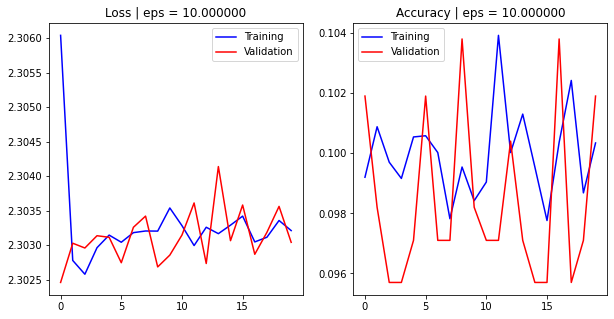

In [66]:
nbatch = 64
nepochs =20

training_loader = DataLoader(training_data, batch_size=nbatch, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=nbatch, shuffle=True)
wd = [1e-8,0.1,1,10]
for w in enumerate(wd):
    model = mlp()
    #model.to(cuda0)
    optimizer = torch.optim.Adam(model.parameters(),weight_decay=w[1], amsgrad=False)
    cost_hist, cost_hist_test, acc_hist, acc_hist_test = train_eval(model, optimizer, nepochs, training_loader, validation_loader)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(torch.arange(nepochs), cost_hist,"b-", label="Training")
    plt.plot(torch.arange(nepochs), cost_hist_test,"r-",label="Validation")
    plt.legend()
    plt.title("Loss | eps = %f"%(w[1]))

    plt.subplot(1,2,2)
    plt.plot(torch.arange(nepochs), acc_hist,"b-", label="Training")
    plt.plot(torch.arange(nepochs), acc_hist_test,"r-", label="Validation")
    plt.legend()
    plt.title("Accuracy | eps = %f"%(w[1]))
    plt.show()

<font style="color:red">amsgrad = True </font>

Epoch 0: 0.778245, 0.735820, 0.481474, 0.826500
Epoch 1: 0.421914, 0.848260, 0.417626, 0.846600
Epoch 2: 0.369663, 0.866100, 0.391125, 0.856000
Epoch 3: 0.343288, 0.875840, 0.379543, 0.863400
Epoch 4: 0.323788, 0.881960, 0.352286, 0.870200
Epoch 5: 0.308121, 0.887640, 0.367192, 0.865000
Epoch 6: 0.295934, 0.892100, 0.340950, 0.875000
Epoch 7: 0.282860, 0.897220, 0.336263, 0.878300
Epoch 8: 0.273253, 0.900660, 0.337829, 0.876100
Epoch 9: 0.264706, 0.903520, 0.330909, 0.879900
Epoch 10: 0.256934, 0.905740, 0.323648, 0.881700
Epoch 11: 0.249544, 0.908240, 0.315460, 0.884900
Epoch 12: 0.242277, 0.911440, 0.314049, 0.884700
Epoch 13: 0.234363, 0.914160, 0.334899, 0.876100
Epoch 14: 0.224900, 0.917200, 0.317528, 0.886300
Epoch 15: 0.220718, 0.918060, 0.337410, 0.878700
Epoch 16: 0.210988, 0.921700, 0.327609, 0.885800
Epoch 17: 0.207804, 0.923240, 0.320113, 0.886200
Epoch 18: 0.202272, 0.925300, 0.314454, 0.885500
Epoch 19: 0.192937, 0.929820, 0.317997, 0.890500


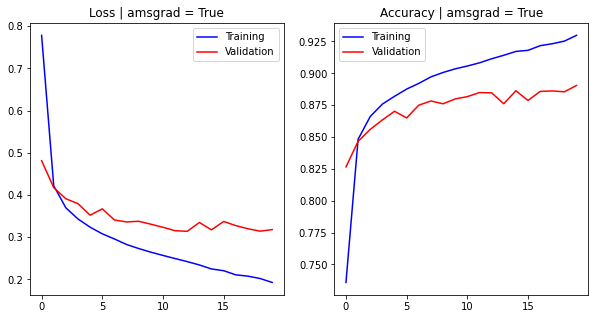

In [68]:
nbatch = 64
nepochs =20

training_loader = DataLoader(training_data, batch_size=nbatch, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=nbatch, shuffle=True)

model = mlp()
#model.to(cuda0)
optimizer = torch.optim.Adam(model.parameters(),amsgrad=True)
cost_hist, cost_hist_test, acc_hist, acc_hist_test = train_eval(model, optimizer, nepochs, training_loader, validation_loader)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(torch.arange(nepochs), cost_hist,"b-", label="Training")
plt.plot(torch.arange(nepochs), cost_hist_test,"r-",label="Validation")
plt.legend()
plt.title("Loss | amsgrad = True")

plt.subplot(1,2,2)
plt.plot(torch.arange(nepochs), acc_hist,"b-", label="Training")
plt.plot(torch.arange(nepochs), acc_hist_test,"r-", label="Validation")
plt.legend()
plt.title("Accuracy | amsgrad = True")
plt.show()

<font style="color:red">as we discussed in the previous task "optimiser 2d" the LR does not have much effect in adam, and the $\beta$, $\epsilon$ and amsgrad as well but weight decay has to be close to 0 --> so we can stay with the default values! </font>

5. Learning rate schedule: Implement a learning rate schedule for SGD (without momentum) - by using e.g. StepLR. What are your preferred settings for the given task? Note the way how the scheduler is incorporated into the `train_eval`-method above.


<font stylye="color:red"> I used the same 

Epoch 0: 2.314720, 0.100680, 2.302665, 0.103400
Epoch 1: 2.301540, 0.112160, 2.300741, 0.155700
Epoch 2: 2.300093, 0.148100, 2.299615, 0.196300
Epoch 3: 2.298921, 0.181320, 2.298408, 0.240600
Epoch 4: 2.297771, 0.192360, 2.297237, 0.161200
Epoch 5: 2.297022, 0.176860, 2.297136, 0.180300
Epoch 6: 2.296898, 0.192880, 2.297014, 0.207700
Epoch 7: 2.296780, 0.229560, 2.296902, 0.241200
Epoch 8: 2.296655, 0.266540, 2.296750, 0.275700
Epoch 9: 2.296534, 0.271180, 2.296640, 0.297800
Epoch 10: 2.296452, 0.313920, 2.296616, 0.300000
Epoch 11: 2.296440, 0.315140, 2.296605, 0.301700
Epoch 12: 2.296428, 0.316200, 2.296613, 0.303600
Epoch 13: 2.296419, 0.317460, 2.296597, 0.305000
Epoch 14: 2.296408, 0.319400, 2.296584, 0.306800
Epoch 15: 2.296400, 0.320460, 2.296584, 0.307000
Epoch 16: 2.296398, 0.320520, 2.296581, 0.307300
Epoch 17: 2.296394, 0.320500, 2.296578, 0.307800
Epoch 18: 2.296397, 0.320720, 2.296593, 0.308100
Epoch 19: 2.296394, 0.320660, 2.296589, 0.308400


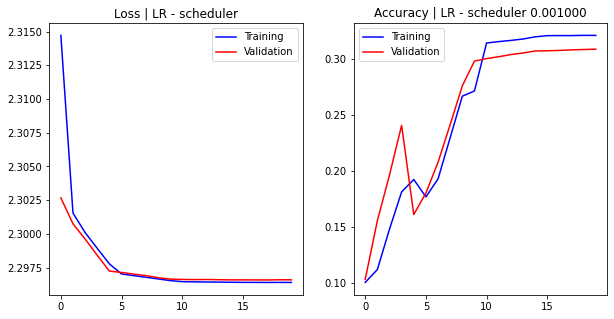

Epoch 0: 2.298617, 0.123360, 2.291293, 0.121200
Epoch 1: 2.282230, 0.214720, 2.270256, 0.143800
Epoch 2: 2.245916, 0.319400, 2.208584, 0.470200
Epoch 3: 2.121580, 0.398000, 1.995230, 0.375600
Epoch 4: 1.839541, 0.435680, 1.699736, 0.514300
Epoch 5: 1.689100, 0.493580, 1.676205, 0.473500
Epoch 6: 1.666565, 0.477600, 1.653961, 0.477900
Epoch 7: 1.645050, 0.484760, 1.633691, 0.486500
Epoch 8: 1.624421, 0.488200, 1.612930, 0.498100
Epoch 9: 1.604309, 0.498480, 1.592323, 0.501200
Epoch 10: 1.593150, 0.500960, 1.591245, 0.501400
Epoch 11: 1.591053, 0.502100, 1.588900, 0.502300
Epoch 12: 1.589158, 0.502260, 1.586448, 0.503300
Epoch 13: 1.587191, 0.503280, 1.585250, 0.503900
Epoch 14: 1.585271, 0.503040, 1.583039, 0.505100
Epoch 15: 1.584089, 0.503340, 1.583029, 0.505100
Epoch 16: 1.583812, 0.503460, 1.583394, 0.505100
Epoch 17: 1.583704, 0.503320, 1.581967, 0.505100
Epoch 18: 1.583614, 0.503620, 1.582072, 0.505100
Epoch 19: 1.583438, 0.503540, 1.581651, 0.505200


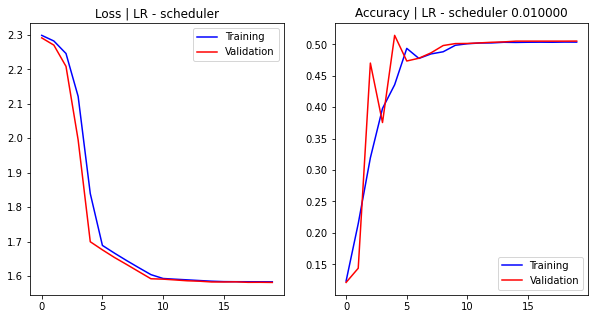

Epoch 0: 1.726855, 0.383980, 1.080902, 0.575300
Epoch 1: 0.916734, 0.654660, 0.783691, 0.699700
Epoch 2: 0.702154, 0.736220, 0.644711, 0.760600
Epoch 3: 0.604356, 0.773220, 0.587568, 0.789000
Epoch 4: 0.553028, 0.799760, 0.566877, 0.798900
Epoch 5: 0.523138, 0.813680, 0.537021, 0.812300
Epoch 6: 0.519263, 0.816280, 0.534270, 0.811200
Epoch 7: 0.515463, 0.817280, 0.529765, 0.813000
Epoch 8: 0.511837, 0.818380, 0.525927, 0.814500
Epoch 9: 0.509107, 0.820020, 0.522697, 0.817300
Epoch 10: 0.506418, 0.821180, 0.523607, 0.816600
Epoch 11: 0.505869, 0.821420, 0.522986, 0.817000
Epoch 12: 0.505558, 0.821280, 0.521979, 0.816200
Epoch 13: 0.505353, 0.821540, 0.522555, 0.816200
Epoch 14: 0.505084, 0.821820, 0.524751, 0.815900
Epoch 15: 0.504807, 0.821380, 0.521868, 0.816600
Epoch 16: 0.504904, 0.821420, 0.522740, 0.816800
Epoch 17: 0.504584, 0.821540, 0.520359, 0.817100
Epoch 18: 0.504663, 0.821600, 0.521974, 0.817000
Epoch 19: 0.505307, 0.821760, 0.522673, 0.817000


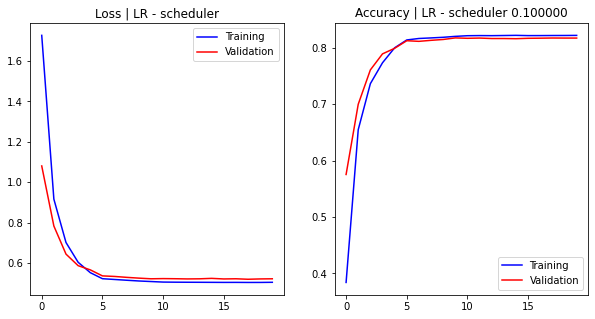

Epoch 0: 0.905749, 0.646520, 1.783909, 0.468100
Epoch 1: 0.512453, 0.811120, 0.549098, 0.795700
Epoch 2: 0.443257, 0.838580, 0.526678, 0.809200
Epoch 3: 0.404407, 0.852140, 0.638051, 0.799500
Epoch 4: 0.378061, 0.861180, 0.637146, 0.765500
Epoch 5: 0.332120, 0.879140, 0.373412, 0.861500
Epoch 6: 0.326563, 0.881440, 0.370763, 0.862400
Epoch 7: 0.323646, 0.882160, 0.369032, 0.861300
Epoch 8: 0.321088, 0.883020, 0.370521, 0.864300
Epoch 9: 0.318999, 0.884040, 0.365179, 0.863700
Epoch 10: 0.314620, 0.885140, 0.361647, 0.866100
Epoch 11: 0.314051, 0.885540, 0.362903, 0.866200
Epoch 12: 0.313966, 0.885600, 0.363132, 0.865600
Epoch 13: 0.313898, 0.886100, 0.364736, 0.865900
Epoch 14: 0.313515, 0.886260, 0.361941, 0.866200
Epoch 15: 0.313469, 0.886120, 0.363614, 0.865900
Epoch 16: 0.312941, 0.886100, 0.361978, 0.865700
Epoch 17: 0.312946, 0.886160, 0.363744, 0.866000
Epoch 18: 0.312929, 0.886020, 0.360963, 0.866100
Epoch 19: 0.312815, 0.886080, 0.363176, 0.866200


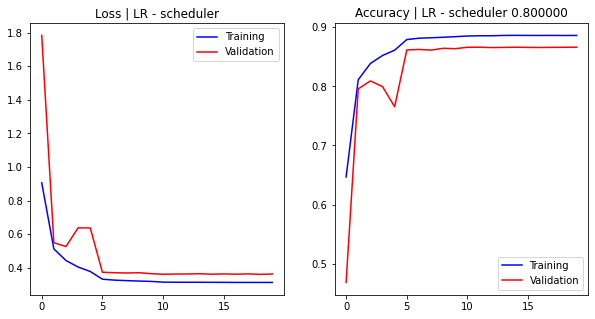

Epoch 0: 0.909654, 0.642500, 0.672306, 0.734400
Epoch 1: 0.510816, 0.813440, 0.510844, 0.818800
Epoch 2: 0.438212, 0.840160, 0.824422, 0.729900
Epoch 3: 0.400503, 0.853060, 0.532458, 0.805300
Epoch 4: 0.373359, 0.862120, 0.417383, 0.848000
Epoch 5: 0.323099, 0.883300, 0.367433, 0.866300
Epoch 6: 0.317147, 0.884980, 0.365397, 0.865900
Epoch 7: 0.314629, 0.885160, 0.363905, 0.865200
Epoch 8: 0.311893, 0.886320, 0.365833, 0.865300
Epoch 9: 0.309738, 0.887440, 0.365089, 0.867800
Epoch 10: 0.304855, 0.889820, 0.358649, 0.868300
Epoch 11: 0.304291, 0.889820, 0.360090, 0.868200
Epoch 12: 0.304049, 0.889740, 0.357446, 0.868200
Epoch 13: 0.303907, 0.889740, 0.360202, 0.868300
Epoch 14: 0.303460, 0.889640, 0.358411, 0.867500
Epoch 15: 0.303431, 0.890220, 0.358244, 0.867700
Epoch 16: 0.302852, 0.889980, 0.357348, 0.867900
Epoch 17: 0.303063, 0.889960, 0.356796, 0.867500
Epoch 18: 0.302968, 0.890100, 0.357250, 0.867700
Epoch 19: 0.302745, 0.889980, 0.357987, 0.867800


In [72]:
nbatch = 64
nepochs =20
training_loader = DataLoader(training_data, batch_size=nbatch, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=nbatch, shuffle=True) 
learningrate = [0.001,0.01,0.1,0.8,1]
for lr in enumerate(learningrate):
    model = mlp()
    #model.to(cuda0)
    optimizer = torch.optim.SGD(model.parameters(),lr=lr[1])
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer,step_size=5)
    cost_hist, cost_hist_test, acc_hist, acc_hist_test = train_eval(model, optimizer, nepochs, training_loader, validation_loader,scheduler=scheduler)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(torch.arange(nepochs), cost_hist,"b-", label="Training")
    plt.plot(torch.arange(nepochs), cost_hist_test,"r-",label="Validation")
    plt.legend()
    plt.title("Loss | LR - scheduler")

    plt.subplot(1,2,2)
    plt.plot(torch.arange(nepochs), acc_hist,"b-", label="Training")
    plt.plot(torch.arange(nepochs), acc_hist_test,"r-", label="Validation")
    plt.legend()
    plt.title("Accuracy | LR - scheduler %f"%(lr[1]))
    plt.show()

<font style="color:red"> if you start with a too low value you have to increase the epochs otherwise you don't reach the plateau </br> but if you choose a too high(e.g: 10) value you will overshood the local minimum </font>

Epoch 0: 1.163781, 0.548540, 1.303132, 0.625500
Epoch 1: 0.556486, 0.791640, 0.589461, 0.777100
Epoch 2: 0.460695, 0.828820, 0.724524, 0.780100
Epoch 3: 0.433098, 0.838500, 0.494735, 0.822700
Epoch 4: 0.410075, 0.846300, 0.453162, 0.842400
Epoch 5: 0.318290, 0.880600, 0.363793, 0.866500
Epoch 6: 0.302654, 0.887080, 0.362253, 0.864700
Epoch 7: 0.296646, 0.887980, 0.359445, 0.870400
Epoch 8: 0.290640, 0.890560, 0.349575, 0.869700
Epoch 9: 0.286200, 0.892700, 0.347193, 0.871500
Epoch 10: 0.277224, 0.896040, 0.345154, 0.872900
Epoch 11: 0.275729, 0.896760, 0.348426, 0.873600
Epoch 12: 0.275379, 0.896200, 0.344377, 0.873000
Epoch 13: 0.274595, 0.897360, 0.345155, 0.873200
Epoch 14: 0.274003, 0.897400, 0.345558, 0.874300
Epoch 15: 0.273153, 0.897480, 0.346044, 0.874500
Epoch 16: 0.272898, 0.897380, 0.344273, 0.874100
Epoch 17: 0.272985, 0.897700, 0.345233, 0.874400
Epoch 18: 0.272810, 0.897860, 0.344081, 0.874600
Epoch 19: 0.272832, 0.897720, 0.345919, 0.874600


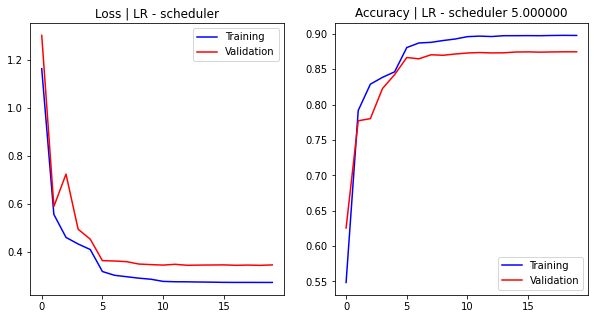

In [74]:
nbatch = 64
nepochs =20
training_loader = DataLoader(training_data, batch_size=nbatch, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=nbatch, shuffle=True) 
learningrate = [5]
for lr in enumerate(learningrate):
    model = mlp()
    #model.to(cuda0)
    optimizer = torch.optim.SGD(model.parameters(),lr=lr[1])
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer,step_size=5)
    cost_hist, cost_hist_test, acc_hist, acc_hist_test = train_eval(model, optimizer, nepochs, training_loader, validation_loader,scheduler=scheduler)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(torch.arange(nepochs), cost_hist,"b-", label="Training")
    plt.plot(torch.arange(nepochs), cost_hist_test,"r-",label="Validation")
    plt.legend()
    plt.title("Loss | LR - scheduler")

    plt.subplot(1,2,2)
    plt.plot(torch.arange(nepochs), acc_hist,"b-", label="Training")
    plt.plot(torch.arange(nepochs), acc_hist_test,"r-", label="Validation")
    plt.legend()
    plt.title("Accuracy | LR - scheduler %f"%(lr[1]))
    plt.show()

Epoch 0: 2.450777, 0.099340, 2.667465, 0.102200
Epoch 1: 2.670994, 0.099080, 3.538774, 0.103200
Epoch 2: 2.826764, 0.100660, 2.927581, 0.103200
Epoch 3: 2.618754, 0.099680, 2.941488, 0.103200
Epoch 4: 2.643428, 0.100460, 2.983050, 0.098200
Epoch 5: 2.317734, 0.099180, 2.312768, 0.101900
Epoch 6: 2.308982, 0.099360, 2.306221, 0.103200
Epoch 7: 2.309097, 0.096780, 2.312079, 0.098200
Epoch 8: 2.309127, 0.099040, 2.308590, 0.103200
Epoch 9: 2.308470, 0.100940, 2.309908, 0.097100
Epoch 10: 2.303340, 0.100720, 2.303666, 0.098200
Epoch 11: 2.303236, 0.099540, 2.303512, 0.095700
Epoch 12: 2.303148, 0.100320, 2.303272, 0.095700
Epoch 13: 2.303253, 0.098720, 2.302996, 0.103200
Epoch 14: 2.303240, 0.098720, 2.303330, 0.095700
Epoch 15: 2.302809, 0.099960, 2.302825, 0.095700
Epoch 16: 2.302676, 0.099500, 2.302768, 0.095700
Epoch 17: 2.302654, 0.100000, 2.302723, 0.095700
Epoch 18: 2.302657, 0.101020, 2.302735, 0.095700
Epoch 19: 2.302655, 0.098320, 2.302805, 0.095700


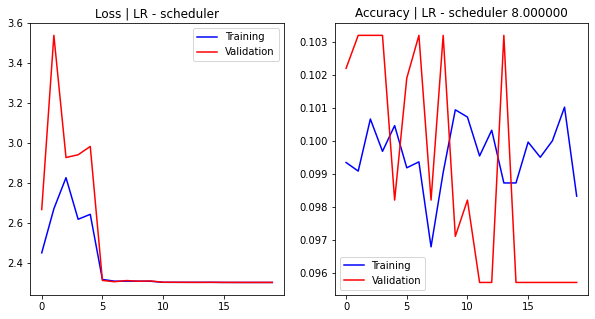

In [75]:
nbatch = 64
nepochs =20
training_loader = DataLoader(training_data, batch_size=nbatch, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=nbatch, shuffle=True) 
learningrate = [8]
for lr in enumerate(learningrate):
    model = mlp()
    #model.to(cuda0)
    optimizer = torch.optim.SGD(model.parameters(),lr=lr[1])
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer,step_size=5)
    cost_hist, cost_hist_test, acc_hist, acc_hist_test = train_eval(model, optimizer, nepochs, training_loader, validation_loader,scheduler=scheduler)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(torch.arange(nepochs), cost_hist,"b-", label="Training")
    plt.plot(torch.arange(nepochs), cost_hist_test,"r-",label="Validation")
    plt.legend()
    plt.title("Loss | LR - scheduler")

    plt.subplot(1,2,2)
    plt.plot(torch.arange(nepochs), acc_hist,"b-", label="Training")
    plt.plot(torch.arange(nepochs), acc_hist_test,"r-", label="Validation")
    plt.legend()
    plt.title("Accuracy | LR - scheduler %f"%(lr[1]))
    plt.show()

<font style="color:red"> Tensorboard </font>
